In [15]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:



def savePlot(name, group, trainBool):

    ans = labels_0[labels_0['bookingID'] == name]
    print(ans['label'])
    if trainBool == True:
        
        if ans['label'].values == 0:
            plotpath = "C:/Users/tanji/Desktop/safety/SpeedImages_2/Train/Safe" 
        else:
            plotpath = "C:/Users/tanji/Desktop/safety/SpeedImages_2/Train/Unsafe"
    else:
        if ans['label'].values == 0:
            plotpath = "C:/Users/tanji/Desktop/safety/SpeedImages_2/Test/Safe" 
        else:
            plotpath = "C:/Users/tanji/Desktop/safety/SpeedImages_2/Test/Unsafe"
        
    test_1 = main_df[main_df['bookingID'] == name]
    #test_1['mainAcceleration'] = test_1['acceleration_y']
    #test_1['diffTime'] = test_1['second'].diff(1).fillna(0)
    #test_1['diffAccelerationY'] = test_1['acceleration_y'].diff(1).fillna(0)
    #test_1['diffAccelerationX'] = test_1['acceleration_x'].diff(1).fillna(0)
    #test_1['diffAccelerationZ'] = test_1['acceleration_z'].diff(1).fillna(0)
    #test_1['diffAccelerationXPerTime'] = test_1['diffAccelerationX'] / test_1['diffTime']
    #test_1['diffBearing'] = test_1['Bearing'].diff(1).fillna(test_1['Bearing'])
    #Create a column to fill speed
    #test_1['tbcSpeed'] = test_1['Speed']

    
    #markers = []
    #for index, row in test_1.iterrows():
    #   try:
    #       row['tbcSpeed'] = 
    #   except:
    #       row['tbcSpeed'] = row['acceleration_y'] * row['diffTime']
            
            
    #print(markers)
    
    plt.plot(test_1['second'],test_1['Speed'], label='Speed')
    plt.plot(test_1['second'],test_1['acceleration_x'], label='acceleration_x')
    plt.plot(test_1['second'],test_1['acceleration_y'], label='acceleration_y')
    plt.plot(test_1['second'],test_1['acceleration_z'], label='acceleration_z')
    plt.plot(test_1['second'],test_1['gyro_x'], label='gyro_x')
    plt.plot(test_1['second'],test_1['gyro_y'], label='gyro_y')
    plt.plot(test_1['second'],test_1['gyro_z'], label='gyro_z')
    
   # plt.plot(test_1['second'],test_1['gyro_y'])
    plotpath = plotpath + "/" + str(name)
    #plt.xticks(np.arange(test_1['second'].min(), test_1['second'].max() + 1, 200))
    #plt.xlim(0,800)
    plt.ylim(-10,35)
    #print(plotpath)
    plt.savefig(plotpath)
    plt.clf()
    
    #if group['bookingID']
    #return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

Reading in of raw data

In [3]:
file_0 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_1 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_2 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_3 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_4 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_5 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_6 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_7 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_8 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
file_9 = pd.read_csv("C:/Users/tanji/Desktop/safety/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv")
labels_0 = pd.read_csv("C:/Users/tanji/Desktop/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

Reading of labels

In [4]:
#labels_0 = pd.read_csv("C:/Users/tanji/Desktop/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

Lables preprocessing

1. Removal of duplicated rows (e.g. 13 is both 0 and 1 at the same time)

In [5]:
#Test for duplicated rows
#test1 = labels_0[labels_0.duplicated(['bookingID'])]
#test1 = test1.sort_values(by=['label', 'bookingID'])
#test1.size
#test1
labels_0 = labels_0.groupby('bookingID', group_keys=False).apply(lambda x: x.loc[x.label.idxmax()])

In [6]:
frames = [file_0, file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8, file_9]
main_df = pd.concat(frames)

In [7]:
main_df.head(10)

bookingID  Accuracy     Bearing  acceleration_x  acceleration_y  \
0  1202590843006     3.000  353.000000        1.228867        8.900100   
1   274877907034     9.293   17.000000        0.032775        8.659933   
2   884763263056     3.000  189.000000        1.139675        9.545974   
3  1073741824054     3.900  126.000000        3.871543       10.386364   
4  1056561954943     3.900   50.000000       -0.112882       10.550960   
5  1185410973787     3.900  178.000000        0.805649        9.206902   
6   163208757379    10.000  262.184418        0.599490       -9.180023   
7   884763262976     3.000   48.000000        0.109022       10.043245   
8   841813590178    16.000   44.041702        1.306946       -7.427310   
9   300647710810     6.000  165.000000        0.897853        7.903501   

   acceleration_z    gyro_x    gyro_y    gyro_z  second      Speed  
0        3.986968  0.008221  0.002269 -0.009966  1362.0   0.000000  
1        4.737300  0.024629  0.004028 -0.010858   257.0   0.190000  
2        1.951334 -0.006899 -0.015080  0.001122   973.0   0.667059  
3       -0.136474  0.001344 -0.339601 -0.017956   902.0   7.913285  
4       -1.560110  0.130568 -0.061697  0.161530   820.0  20.419409  
5        2.954445 -0.057104 -0.043555  0.002334   533.0  19.250000  
6       -2.520432  0.026767 -0.030687 -0.006071   556.0   2.110000  
7       -0.196497 -0.000698 -0.001902  0.015586   200.0   0.000000  
8       -5.655457  0.013766 -0.017083  0.003231   115.0  13.914648  
9        4.932206  0.021364  0.001613  0.009384   824.0  26.602882

In [8]:
main_df.size

177491171

In [9]:
main_df = main_df.sort_values(by=['bookingID', 'second'])

In [17]:
main_df['bookingID'].value_counts()

438086664371     7561
1374389534819    4499
34359738469      4302
1108101562533    3925
747324309632     3674
1486058684448    3611
893353197656     3486
1211180777592    3206
1365799600208    3195
120259084461     3172
412316860458     3061
1116691497104    3055
1262720385148    3026
515396075652     2996
1194000908355    2981
953482739722     2929
695784702068     2917
1116691497088    2909
283467841668     2893
77309411460      2868
841813590038     2837
1709396983933    2835
841813590125     2828
841813590042     2815
1700807049324    2790
1065151889429    2788
1125281431586    2774
1159641169935    2755
670014898333     2712
1211180777501    2706
                 ... 
1589137899664     120
575525617679      120
1288490188981     120
515396075679      120
60129542207       120
1348619730958     120
764504178845      120
309237645388      120
25769803813       120
343597383756      120
1228360646706     120
103079215187      120
149               120
558345748556      120
8504035247

In [27]:
os.mkdir("C:/Users/tanji/Desktop/safety/SpeedImages_2/")
os.mkdir("C:/Users/tanji/Desktop/safety/SpeedImages_2/Train")
os.mkdir("C:/Users/tanji/Desktop/safety/SpeedImages_2/Test")

os.mkdir("C:/Users/tanji/Desktop/safety/SpeedImages_2/Train/Safe")
os.mkdir("C:/Users/tanji/Desktop/safety/SpeedImages_2/Train/Unsafe")
os.mkdir("C:/Users/tanji/Desktop/safety/SpeedImages_2/Test/Safe")
os.mkdir("C:/Users/tanji/Desktop/safety/SpeedImages_2/Test/Unsafe")
#labels_0 = pd.read_csv("C:/Users/tanji/Desktop/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")
#main_df.groupby('bookingID').apply(savePlot)

train_df, test_df = train_test_split(main_df, test_size=0.3)


for name, group in train_df.groupby("bookingID"):
    print(name)
    savePlot(name,group,trainBool=True)
    
for name, group in test_df.groupby("bookingID"):
    print(name)
    savePlot(name,group,trainBool=False)
    

0
bookingID
0    0
Name: label, dtype: int64
1
bookingID
1    1
Name: label, dtype: int64
2
bookingID
2    1
Name: label, dtype: int64
4
bookingID
4    1
Name: label, dtype: int64
6
bookingID
6    0
Name: label, dtype: int64
7
bookingID
7    0
Name: label, dtype: int64
8
bookingID
8    0
Name: label, dtype: int64
10
bookingID
10    0
Name: label, dtype: int64
11
bookingID
11    0
Name: label, dtype: int64
13
bookingID
13    1
Name: label, dtype: int64
14
bookingID
14    0
Name: label, dtype: int64
16
bookingID
16    0
Name: label, dtype: int64
17
bookingID
17    0
Name: label, dtype: int64
18
bookingID
18    1
Name: label, dtype: int64
21
bookingID
21    0
Name: label, dtype: int64
25
bookingID
25    0
Name: label, dtype: int64
26
bookingID
26    0
Name: label, dtype: int64
27
bookingID
27    0
Name: label, dtype: int64
28
bookingID
28    0
Name: label, dtype: int64
29
bookingID
29    0
Name: label, dtype: int64
30
bookingID
30    0
Name: label, dtype: int64
32
bookingID
32    0
Name: 

8589934658
bookingID
8589934658    0
Name: label, dtype: int64
8589934661
bookingID
8589934661    0
Name: label, dtype: int64
8589934662
bookingID
8589934662    1
Name: label, dtype: int64
8589934664
bookingID
8589934664    1
Name: label, dtype: int64
8589934666
bookingID
8589934666    0
Name: label, dtype: int64
8589934667
bookingID
8589934667    0
Name: label, dtype: int64
8589934669
bookingID
8589934669    0
Name: label, dtype: int64
8589934670
bookingID
8589934670    0
Name: label, dtype: int64
8589934671
bookingID
8589934671    0
Name: label, dtype: int64
8589934672
bookingID
8589934672    1
Name: label, dtype: int64
8589934673
bookingID
8589934673    0
Name: label, dtype: int64
8589934674
bookingID
8589934674    0
Name: label, dtype: int64
8589934676
bookingID
8589934676    0
Name: label, dtype: int64
8589934678
bookingID
8589934678    1
Name: label, dtype: int64
8589934679
bookingID
8589934679    0
Name: label, dtype: int64
8589934680
bookingID
8589934680    0
Name: label, dtype

25769803822
bookingID
25769803822    0
Name: label, dtype: int64
25769803823
bookingID
25769803823    1
Name: label, dtype: int64
25769803824
bookingID
25769803824    0
Name: label, dtype: int64
25769803825
bookingID
25769803825    0
Name: label, dtype: int64
25769803826
bookingID
25769803826    0
Name: label, dtype: int64
25769803827
bookingID
25769803827    0
Name: label, dtype: int64
25769803828
bookingID
25769803828    0
Name: label, dtype: int64
25769803829
bookingID
25769803829    1
Name: label, dtype: int64
25769803830
bookingID
25769803830    0
Name: label, dtype: int64
25769803831
bookingID
25769803831    1
Name: label, dtype: int64
25769803833
bookingID
25769803833    0
Name: label, dtype: int64
25769803834
bookingID
25769803834    0
Name: label, dtype: int64
25769803835
bookingID
25769803835    0
Name: label, dtype: int64
25769803839
bookingID
25769803839    0
Name: label, dtype: int64
25769803842
bookingID
25769803842    0
Name: label, dtype: int64
25769803844
bookingID
257

34359738431
bookingID
34359738431    0
Name: label, dtype: int64
34359738432
bookingID
34359738432    0
Name: label, dtype: int64
34359738433
bookingID
34359738433    0
Name: label, dtype: int64
34359738434
bookingID
34359738434    0
Name: label, dtype: int64
34359738436
bookingID
34359738436    0
Name: label, dtype: int64
34359738437
bookingID
34359738437    0
Name: label, dtype: int64
34359738439
bookingID
34359738439    0
Name: label, dtype: int64
34359738440
bookingID
34359738440    0
Name: label, dtype: int64
34359738442
bookingID
34359738442    0
Name: label, dtype: int64
34359738443
bookingID
34359738443    1
Name: label, dtype: int64
34359738444
bookingID
34359738444    0
Name: label, dtype: int64
34359738445
bookingID
34359738445    0
Name: label, dtype: int64
34359738446
bookingID
34359738446    0
Name: label, dtype: int64
34359738447
bookingID
34359738447    1
Name: label, dtype: int64
34359738448
bookingID
34359738448    0
Name: label, dtype: int64
34359738449
bookingID
343

42949673026
bookingID
42949673026    0
Name: label, dtype: int64
42949673027
bookingID
42949673027    0
Name: label, dtype: int64
42949673028
bookingID
42949673028    0
Name: label, dtype: int64
42949673030
bookingID
42949673030    0
Name: label, dtype: int64
42949673031
bookingID
42949673031    1
Name: label, dtype: int64
42949673032
bookingID
42949673032    0
Name: label, dtype: int64
42949673034
bookingID
42949673034    0
Name: label, dtype: int64
42949673035
bookingID
42949673035    0
Name: label, dtype: int64
42949673036
bookingID
42949673036    0
Name: label, dtype: int64
42949673037
bookingID
42949673037    0
Name: label, dtype: int64
42949673038
bookingID
42949673038    0
Name: label, dtype: int64
42949673040
bookingID
42949673040    0
Name: label, dtype: int64
42949673041
bookingID
42949673041    0
Name: label, dtype: int64
42949673043
bookingID
42949673043    0
Name: label, dtype: int64
42949673044
bookingID
42949673044    0
Name: label, dtype: int64
42949673045
bookingID
429

51539607601
bookingID
51539607601    0
Name: label, dtype: int64
51539607602
bookingID
51539607602    0
Name: label, dtype: int64
51539607603
bookingID
51539607603    0
Name: label, dtype: int64
51539607604
bookingID
51539607604    0
Name: label, dtype: int64
51539607605
bookingID
51539607605    1
Name: label, dtype: int64
51539607606
bookingID
51539607606    0
Name: label, dtype: int64
51539607609
bookingID
51539607609    0
Name: label, dtype: int64
51539607611
bookingID
51539607611    0
Name: label, dtype: int64
51539607612
bookingID
51539607612    0
Name: label, dtype: int64
51539607613
bookingID
51539607613    0
Name: label, dtype: int64
51539607614
bookingID
51539607614    0
Name: label, dtype: int64
51539607615
bookingID
51539607615    0
Name: label, dtype: int64
51539607616
bookingID
51539607616    0
Name: label, dtype: int64
51539607617
bookingID
51539607617    0
Name: label, dtype: int64
51539607620
bookingID
51539607620    0
Name: label, dtype: int64
51539607621
bookingID
515

60129542210
bookingID
60129542210    1
Name: label, dtype: int64
60129542211
bookingID
60129542211    0
Name: label, dtype: int64
60129542213
bookingID
60129542213    0
Name: label, dtype: int64
60129542214
bookingID
60129542214    0
Name: label, dtype: int64
60129542215
bookingID
60129542215    0
Name: label, dtype: int64
60129542216
bookingID
60129542216    0
Name: label, dtype: int64
60129542218
bookingID
60129542218    1
Name: label, dtype: int64
60129542221
bookingID
60129542221    0
Name: label, dtype: int64
60129542223
bookingID
60129542223    0
Name: label, dtype: int64
60129542225
bookingID
60129542225    0
Name: label, dtype: int64
60129542228
bookingID
60129542228    0
Name: label, dtype: int64
60129542229
bookingID
60129542229    0
Name: label, dtype: int64
60129542231
bookingID
60129542231    1
Name: label, dtype: int64
60129542232
bookingID
60129542232    0
Name: label, dtype: int64
60129542234
bookingID
60129542234    1
Name: label, dtype: int64
60129542235
bookingID
601

68719476818
bookingID
68719476818    1
Name: label, dtype: int64
68719476819
bookingID
68719476819    0
Name: label, dtype: int64
68719476820
bookingID
68719476820    0
Name: label, dtype: int64
68719476821
bookingID
68719476821    1
Name: label, dtype: int64
68719476822
bookingID
68719476822    0
Name: label, dtype: int64
68719476823
bookingID
68719476823    0
Name: label, dtype: int64
68719476824
bookingID
68719476824    0
Name: label, dtype: int64
68719476826
bookingID
68719476826    1
Name: label, dtype: int64
68719476827
bookingID
68719476827    1
Name: label, dtype: int64
68719476829
bookingID
68719476829    0
Name: label, dtype: int64
68719476830
bookingID
68719476830    1
Name: label, dtype: int64
68719476832
bookingID
68719476832    0
Name: label, dtype: int64
68719476835
bookingID
68719476835    0
Name: label, dtype: int64
68719476836
bookingID
68719476836    1
Name: label, dtype: int64
68719476837
bookingID
68719476837    1
Name: label, dtype: int64
68719476838
bookingID
687

77309411443
bookingID
77309411443    1
Name: label, dtype: int64
77309411444
bookingID
77309411444    0
Name: label, dtype: int64
77309411445
bookingID
77309411445    0
Name: label, dtype: int64
77309411446
bookingID
77309411446    0
Name: label, dtype: int64
77309411447
bookingID
77309411447    0
Name: label, dtype: int64
77309411449
bookingID
77309411449    1
Name: label, dtype: int64
77309411450
bookingID
77309411450    1
Name: label, dtype: int64
77309411451
bookingID
77309411451    0
Name: label, dtype: int64
77309411452
bookingID
77309411452    0
Name: label, dtype: int64
77309411453
bookingID
77309411453    0
Name: label, dtype: int64
77309411454
bookingID
77309411454    1
Name: label, dtype: int64
77309411455
bookingID
77309411455    0
Name: label, dtype: int64
77309411456
bookingID
77309411456    0
Name: label, dtype: int64
77309411457
bookingID
77309411457    1
Name: label, dtype: int64
77309411458
bookingID
77309411458    1
Name: label, dtype: int64
77309411459
bookingID
773

85899346055
bookingID
85899346055    0
Name: label, dtype: int64
85899346058
bookingID
85899346058    0
Name: label, dtype: int64
85899346059
bookingID
85899346059    0
Name: label, dtype: int64
85899346060
bookingID
85899346060    0
Name: label, dtype: int64
85899346061
bookingID
85899346061    1
Name: label, dtype: int64
85899346063
bookingID
85899346063    0
Name: label, dtype: int64
85899346064
bookingID
85899346064    0
Name: label, dtype: int64
85899346065
bookingID
85899346065    0
Name: label, dtype: int64
85899346066
bookingID
85899346066    0
Name: label, dtype: int64
85899346069
bookingID
85899346069    0
Name: label, dtype: int64
85899346070
bookingID
85899346070    0
Name: label, dtype: int64
85899346073
bookingID
85899346073    0
Name: label, dtype: int64
85899346074
bookingID
85899346074    0
Name: label, dtype: int64
85899346077
bookingID
85899346077    0
Name: label, dtype: int64
85899346079
bookingID
85899346079    1
Name: label, dtype: int64
85899346080
bookingID
858

103079215114
bookingID
103079215114    0
Name: label, dtype: int64
103079215115
bookingID
103079215115    0
Name: label, dtype: int64
103079215116
bookingID
103079215116    0
Name: label, dtype: int64
103079215117
bookingID
103079215117    0
Name: label, dtype: int64
103079215118
bookingID
103079215118    0
Name: label, dtype: int64
103079215121
bookingID
103079215121    0
Name: label, dtype: int64
103079215123
bookingID
103079215123    1
Name: label, dtype: int64
103079215125
bookingID
103079215125    0
Name: label, dtype: int64
103079215126
bookingID
103079215126    0
Name: label, dtype: int64
103079215127
bookingID
103079215127    0
Name: label, dtype: int64
103079215128
bookingID
103079215128    0
Name: label, dtype: int64
103079215129
bookingID
103079215129    0
Name: label, dtype: int64
103079215130
bookingID
103079215130    1
Name: label, dtype: int64
103079215131
bookingID
103079215131    0
Name: label, dtype: int64
103079215132
bookingID
103079215132    0
Name: label, dtype: i

111669149716
bookingID
111669149716    0
Name: label, dtype: int64
111669149717
bookingID
111669149717    1
Name: label, dtype: int64
111669149718
bookingID
111669149718    0
Name: label, dtype: int64
111669149720
bookingID
111669149720    1
Name: label, dtype: int64
111669149721
bookingID
111669149721    0
Name: label, dtype: int64
111669149725
bookingID
111669149725    0
Name: label, dtype: int64
111669149727
bookingID
111669149727    0
Name: label, dtype: int64
111669149728
bookingID
111669149728    0
Name: label, dtype: int64
111669149730
bookingID
111669149730    0
Name: label, dtype: int64
111669149731
bookingID
111669149731    0
Name: label, dtype: int64
111669149732
bookingID
111669149732    0
Name: label, dtype: int64
111669149733
bookingID
111669149733    0
Name: label, dtype: int64
111669149736
bookingID
111669149736    1
Name: label, dtype: int64
111669149737
bookingID
111669149737    1
Name: label, dtype: int64
111669149739
bookingID
111669149739    0
Name: label, dtype: i

120259084296
bookingID
120259084296    0
Name: label, dtype: int64
120259084297
bookingID
120259084297    0
Name: label, dtype: int64
120259084298
bookingID
120259084298    0
Name: label, dtype: int64
120259084299
bookingID
120259084299    0
Name: label, dtype: int64
120259084300
bookingID
120259084300    1
Name: label, dtype: int64
120259084302
bookingID
120259084302    1
Name: label, dtype: int64
120259084303
bookingID
120259084303    0
Name: label, dtype: int64
120259084305
bookingID
120259084305    0
Name: label, dtype: int64
120259084306
bookingID
120259084306    0
Name: label, dtype: int64
120259084309
bookingID
120259084309    0
Name: label, dtype: int64
120259084310
bookingID
120259084310    0
Name: label, dtype: int64
120259084312
bookingID
120259084312    0
Name: label, dtype: int64
120259084313
bookingID
120259084313    0
Name: label, dtype: int64
120259084314
bookingID
120259084314    0
Name: label, dtype: int64
120259084315
bookingID
120259084315    0
Name: label, dtype: i

128849018884
bookingID
128849018884    0
Name: label, dtype: int64
128849018888
bookingID
128849018888    0
Name: label, dtype: int64
128849018890
bookingID
128849018890    0
Name: label, dtype: int64
128849018892
bookingID
128849018892    0
Name: label, dtype: int64
128849018893
bookingID
128849018893    0
Name: label, dtype: int64
128849018894
bookingID
128849018894    0
Name: label, dtype: int64
128849018895
bookingID
128849018895    0
Name: label, dtype: int64
128849018897
bookingID
128849018897    0
Name: label, dtype: int64
128849018899
bookingID
128849018899    0
Name: label, dtype: int64
128849018900
bookingID
128849018900    0
Name: label, dtype: int64
128849018904
bookingID
128849018904    0
Name: label, dtype: int64
128849018907
bookingID
128849018907    0
Name: label, dtype: int64
128849018909
bookingID
128849018909    0
Name: label, dtype: int64
128849018910
bookingID
128849018910    0
Name: label, dtype: int64
128849018912
bookingID
128849018912    0
Name: label, dtype: i

137438953531
bookingID
137438953531    0
Name: label, dtype: int64
137438953533
bookingID
137438953533    0
Name: label, dtype: int64
137438953534
bookingID
137438953534    0
Name: label, dtype: int64
137438953538
bookingID
137438953538    0
Name: label, dtype: int64
137438953539
bookingID
137438953539    0
Name: label, dtype: int64
137438953540
bookingID
137438953540    0
Name: label, dtype: int64
137438953541
bookingID
137438953541    0
Name: label, dtype: int64
137438953542
bookingID
137438953542    0
Name: label, dtype: int64
137438953544
bookingID
137438953544    0
Name: label, dtype: int64
137438953545
bookingID
137438953545    0
Name: label, dtype: int64
137438953548
bookingID
137438953548    0
Name: label, dtype: int64
137438953549
bookingID
137438953549    0
Name: label, dtype: int64
137438953550
bookingID
137438953550    0
Name: label, dtype: int64
137438953552
bookingID
137438953552    0
Name: label, dtype: int64
137438953555
bookingID
137438953555    0
Name: label, dtype: i

146028888161
bookingID
146028888161    0
Name: label, dtype: int64
146028888162
bookingID
146028888162    0
Name: label, dtype: int64
146028888163
bookingID
146028888163    0
Name: label, dtype: int64
146028888164
bookingID
146028888164    0
Name: label, dtype: int64
146028888165
bookingID
146028888165    0
Name: label, dtype: int64
146028888166
bookingID
146028888166    0
Name: label, dtype: int64
146028888167
bookingID
146028888167    0
Name: label, dtype: int64
146028888170
bookingID
146028888170    0
Name: label, dtype: int64
146028888171
bookingID
146028888171    0
Name: label, dtype: int64
146028888172
bookingID
146028888172    0
Name: label, dtype: int64
146028888173
bookingID
146028888173    0
Name: label, dtype: int64
146028888175
bookingID
146028888175    0
Name: label, dtype: int64
146028888178
bookingID
146028888178    1
Name: label, dtype: int64
146028888180
bookingID
146028888180    1
Name: label, dtype: int64
146028888181
bookingID
146028888181    0
Name: label, dtype: i

154618822718
bookingID
154618822718    0
Name: label, dtype: int64
154618822720
bookingID
154618822720    0
Name: label, dtype: int64
154618822721
bookingID
154618822721    0
Name: label, dtype: int64
154618822722
bookingID
154618822722    1
Name: label, dtype: int64
154618822728
bookingID
154618822728    0
Name: label, dtype: int64
154618822729
bookingID
154618822729    0
Name: label, dtype: int64
154618822732
bookingID
154618822732    1
Name: label, dtype: int64
154618822736
bookingID
154618822736    0
Name: label, dtype: int64
154618822737
bookingID
154618822737    0
Name: label, dtype: int64
154618822739
bookingID
154618822739    0
Name: label, dtype: int64
154618822740
bookingID
154618822740    1
Name: label, dtype: int64
154618822741
bookingID
154618822741    0
Name: label, dtype: int64
154618822742
bookingID
154618822742    0
Name: label, dtype: int64
154618822743
bookingID
154618822743    0
Name: label, dtype: int64
154618822745
bookingID
154618822745    0
Name: label, dtype: i

163208757329
bookingID
163208757329    0
Name: label, dtype: int64
163208757331
bookingID
163208757331    1
Name: label, dtype: int64
163208757332
bookingID
163208757332    0
Name: label, dtype: int64
163208757333
bookingID
163208757333    0
Name: label, dtype: int64
163208757334
bookingID
163208757334    0
Name: label, dtype: int64
163208757335
bookingID
163208757335    0
Name: label, dtype: int64
163208757337
bookingID
163208757337    1
Name: label, dtype: int64
163208757338
bookingID
163208757338    0
Name: label, dtype: int64
163208757339
bookingID
163208757339    1
Name: label, dtype: int64
163208757340
bookingID
163208757340    0
Name: label, dtype: int64
163208757341
bookingID
163208757341    1
Name: label, dtype: int64
163208757344
bookingID
163208757344    1
Name: label, dtype: int64
163208757345
bookingID
163208757345    1
Name: label, dtype: int64
163208757346
bookingID
163208757346    0
Name: label, dtype: int64
163208757347
bookingID
163208757347    1
Name: label, dtype: i

171798691927
bookingID
171798691927    0
Name: label, dtype: int64
171798691929
bookingID
171798691929    1
Name: label, dtype: int64
171798691930
bookingID
171798691930    1
Name: label, dtype: int64
171798691932
bookingID
171798691932    0
Name: label, dtype: int64
171798691934
bookingID
171798691934    1
Name: label, dtype: int64
171798691935
bookingID
171798691935    1
Name: label, dtype: int64
171798691937
bookingID
171798691937    0
Name: label, dtype: int64
171798691938
bookingID
171798691938    0
Name: label, dtype: int64
171798691939
bookingID
171798691939    0
Name: label, dtype: int64
171798691940
bookingID
171798691940    1
Name: label, dtype: int64
171798691941
bookingID
171798691941    0
Name: label, dtype: int64
171798691944
bookingID
171798691944    0
Name: label, dtype: int64
171798691947
bookingID
171798691947    1
Name: label, dtype: int64
171798691948
bookingID
171798691948    1
Name: label, dtype: int64
171798691950
bookingID
171798691950    0
Name: label, dtype: i

180388626542
bookingID
180388626542    0
Name: label, dtype: int64
180388626544
bookingID
180388626544    0
Name: label, dtype: int64
180388626545
bookingID
180388626545    0
Name: label, dtype: int64
180388626546
bookingID
180388626546    0
Name: label, dtype: int64
180388626547
bookingID
180388626547    0
Name: label, dtype: int64
180388626548
bookingID
180388626548    0
Name: label, dtype: int64
180388626549
bookingID
180388626549    1
Name: label, dtype: int64
180388626550
bookingID
180388626550    0
Name: label, dtype: int64
180388626552
bookingID
180388626552    1
Name: label, dtype: int64
180388626554
bookingID
180388626554    0
Name: label, dtype: int64
180388626555
bookingID
180388626555    0
Name: label, dtype: int64
180388626556
bookingID
180388626556    1
Name: label, dtype: int64
180388626557
bookingID
180388626557    0
Name: label, dtype: int64
180388626558
bookingID
180388626558    1
Name: label, dtype: int64
180388626559
bookingID
180388626559    0
Name: label, dtype: i

188978561109
bookingID
188978561109    0
Name: label, dtype: int64
188978561111
bookingID
188978561111    0
Name: label, dtype: int64
188978561112
bookingID
188978561112    0
Name: label, dtype: int64
188978561113
bookingID
188978561113    0
Name: label, dtype: int64
188978561114
bookingID
188978561114    1
Name: label, dtype: int64
188978561117
bookingID
188978561117    1
Name: label, dtype: int64
188978561118
bookingID
188978561118    1
Name: label, dtype: int64
188978561120
bookingID
188978561120    0
Name: label, dtype: int64
188978561121
bookingID
188978561121    0
Name: label, dtype: int64
188978561122
bookingID
188978561122    1
Name: label, dtype: int64
188978561125
bookingID
188978561125    1
Name: label, dtype: int64
188978561126
bookingID
188978561126    0
Name: label, dtype: int64
188978561127
bookingID
188978561127    1
Name: label, dtype: int64
188978561129
bookingID
188978561129    0
Name: label, dtype: int64
188978561131
bookingID
188978561131    0
Name: label, dtype: i

197568495697
bookingID
197568495697    0
Name: label, dtype: int64
197568495699
bookingID
197568495699    0
Name: label, dtype: int64
197568495700
bookingID
197568495700    0
Name: label, dtype: int64
197568495703
bookingID
197568495703    0
Name: label, dtype: int64
197568495704
bookingID
197568495704    0
Name: label, dtype: int64
197568495705
bookingID
197568495705    0
Name: label, dtype: int64
197568495706
bookingID
197568495706    0
Name: label, dtype: int64
197568495707
bookingID
197568495707    0
Name: label, dtype: int64
197568495710
bookingID
197568495710    1
Name: label, dtype: int64
197568495711
bookingID
197568495711    0
Name: label, dtype: int64
197568495714
bookingID
197568495714    0
Name: label, dtype: int64
197568495715
bookingID
197568495715    1
Name: label, dtype: int64
197568495716
bookingID
197568495716    0
Name: label, dtype: int64
197568495717
bookingID
197568495717    0
Name: label, dtype: int64
197568495718
bookingID
197568495718    0
Name: label, dtype: i

206158430279
bookingID
206158430279    0
Name: label, dtype: int64
206158430280
bookingID
206158430280    1
Name: label, dtype: int64
206158430281
bookingID
206158430281    0
Name: label, dtype: int64
206158430282
bookingID
206158430282    0
Name: label, dtype: int64
206158430283
bookingID
206158430283    0
Name: label, dtype: int64
206158430285
bookingID
206158430285    0
Name: label, dtype: int64
206158430287
bookingID
206158430287    0
Name: label, dtype: int64
206158430288
bookingID
206158430288    0
Name: label, dtype: int64
206158430289
bookingID
206158430289    1
Name: label, dtype: int64
206158430290
bookingID
206158430290    0
Name: label, dtype: int64
206158430291
bookingID
206158430291    0
Name: label, dtype: int64
206158430292
bookingID
206158430292    0
Name: label, dtype: int64
206158430293
bookingID
206158430293    1
Name: label, dtype: int64
206158430294
bookingID
206158430294    0
Name: label, dtype: int64
206158430297
bookingID
206158430297    0
Name: label, dtype: i

214748364885
bookingID
214748364885    0
Name: label, dtype: int64
214748364887
bookingID
214748364887    0
Name: label, dtype: int64
214748364890
bookingID
214748364890    0
Name: label, dtype: int64
214748364891
bookingID
214748364891    0
Name: label, dtype: int64
214748364894
bookingID
214748364894    0
Name: label, dtype: int64
214748364895
bookingID
214748364895    0
Name: label, dtype: int64
214748364896
bookingID
214748364896    0
Name: label, dtype: int64
214748364897
bookingID
214748364897    0
Name: label, dtype: int64
214748364898
bookingID
214748364898    1
Name: label, dtype: int64
214748364899
bookingID
214748364899    0
Name: label, dtype: int64
214748364900
bookingID
214748364900    1
Name: label, dtype: int64
214748364901
bookingID
214748364901    0
Name: label, dtype: int64
214748364904
bookingID
214748364904    0
Name: label, dtype: int64
214748364905
bookingID
214748364905    0
Name: label, dtype: int64
214748364906
bookingID
214748364906    0
Name: label, dtype: i

223338299473
bookingID
223338299473    0
Name: label, dtype: int64
223338299475
bookingID
223338299475    0
Name: label, dtype: int64
223338299476
bookingID
223338299476    1
Name: label, dtype: int64
223338299481
bookingID
223338299481    1
Name: label, dtype: int64
223338299483
bookingID
223338299483    0
Name: label, dtype: int64
223338299484
bookingID
223338299484    0
Name: label, dtype: int64
223338299487
bookingID
223338299487    1
Name: label, dtype: int64
223338299489
bookingID
223338299489    1
Name: label, dtype: int64
223338299490
bookingID
223338299490    0
Name: label, dtype: int64
223338299491
bookingID
223338299491    0
Name: label, dtype: int64
223338299493
bookingID
223338299493    0
Name: label, dtype: int64
223338299494
bookingID
223338299494    0
Name: label, dtype: int64
223338299496
bookingID
223338299496    0
Name: label, dtype: int64
223338299497
bookingID
223338299497    1
Name: label, dtype: int64
223338299498
bookingID
223338299498    1
Name: label, dtype: i

231928234062
bookingID
231928234062    0
Name: label, dtype: int64
231928234064
bookingID
231928234064    0
Name: label, dtype: int64
231928234065
bookingID
231928234065    0
Name: label, dtype: int64
231928234067
bookingID
231928234067    1
Name: label, dtype: int64
231928234068
bookingID
231928234068    0
Name: label, dtype: int64
231928234069
bookingID
231928234069    0
Name: label, dtype: int64
231928234070
bookingID
231928234070    0
Name: label, dtype: int64
231928234071
bookingID
231928234071    0
Name: label, dtype: int64
231928234073
bookingID
231928234073    0
Name: label, dtype: int64
231928234076
bookingID
231928234076    0
Name: label, dtype: int64
231928234078
bookingID
231928234078    0
Name: label, dtype: int64
231928234080
bookingID
231928234080    0
Name: label, dtype: int64
231928234083
bookingID
231928234083    0
Name: label, dtype: int64
231928234084
bookingID
231928234084    1
Name: label, dtype: int64
231928234085
bookingID
231928234085    0
Name: label, dtype: i

240518168659
bookingID
240518168659    0
Name: label, dtype: int64
240518168662
bookingID
240518168662    0
Name: label, dtype: int64
240518168663
bookingID
240518168663    0
Name: label, dtype: int64
240518168664
bookingID
240518168664    0
Name: label, dtype: int64
240518168665
bookingID
240518168665    0
Name: label, dtype: int64
240518168666
bookingID
240518168666    0
Name: label, dtype: int64
240518168671
bookingID
240518168671    0
Name: label, dtype: int64
240518168672
bookingID
240518168672    0
Name: label, dtype: int64
240518168674
bookingID
240518168674    1
Name: label, dtype: int64
240518168675
bookingID
240518168675    1
Name: label, dtype: int64
240518168676
bookingID
240518168676    0
Name: label, dtype: int64
240518168677
bookingID
240518168677    1
Name: label, dtype: int64
240518168678
bookingID
240518168678    0
Name: label, dtype: int64
240518168680
bookingID
240518168680    1
Name: label, dtype: int64
240518168681
bookingID
240518168681    0
Name: label, dtype: i

249108103271
bookingID
249108103271    0
Name: label, dtype: int64
249108103272
bookingID
249108103272    1
Name: label, dtype: int64
249108103273
bookingID
249108103273    1
Name: label, dtype: int64
249108103277
bookingID
249108103277    0
Name: label, dtype: int64
249108103278
bookingID
249108103278    0
Name: label, dtype: int64
249108103279
bookingID
249108103279    0
Name: label, dtype: int64
249108103280
bookingID
249108103280    1
Name: label, dtype: int64
249108103281
bookingID
249108103281    0
Name: label, dtype: int64
249108103283
bookingID
249108103283    0
Name: label, dtype: int64
249108103284
bookingID
249108103284    1
Name: label, dtype: int64
249108103286
bookingID
249108103286    0
Name: label, dtype: int64
249108103287
bookingID
249108103287    1
Name: label, dtype: int64
249108103292
bookingID
249108103292    0
Name: label, dtype: int64
249108103293
bookingID
249108103293    0
Name: label, dtype: int64
249108103294
bookingID
249108103294    0
Name: label, dtype: i

257698037866
bookingID
257698037866    1
Name: label, dtype: int64
257698037867
bookingID
257698037867    0
Name: label, dtype: int64
257698037868
bookingID
257698037868    1
Name: label, dtype: int64
257698037869
bookingID
257698037869    0
Name: label, dtype: int64
257698037870
bookingID
257698037870    0
Name: label, dtype: int64
257698037872
bookingID
257698037872    1
Name: label, dtype: int64
257698037873
bookingID
257698037873    0
Name: label, dtype: int64
257698037874
bookingID
257698037874    0
Name: label, dtype: int64
257698037875
bookingID
257698037875    0
Name: label, dtype: int64
257698037876
bookingID
257698037876    0
Name: label, dtype: int64
257698037878
bookingID
257698037878    0
Name: label, dtype: int64
257698037879
bookingID
257698037879    1
Name: label, dtype: int64
257698037882
bookingID
257698037882    0
Name: label, dtype: int64
257698037883
bookingID
257698037883    0
Name: label, dtype: int64
257698037884
bookingID
257698037884    1
Name: label, dtype: i

283467841607
bookingID
283467841607    0
Name: label, dtype: int64
283467841608
bookingID
283467841608    1
Name: label, dtype: int64
283467841610
bookingID
283467841610    1
Name: label, dtype: int64
283467841613
bookingID
283467841613    0
Name: label, dtype: int64
283467841614
bookingID
283467841614    0
Name: label, dtype: int64
283467841615
bookingID
283467841615    0
Name: label, dtype: int64
283467841616
bookingID
283467841616    0
Name: label, dtype: int64
283467841617
bookingID
283467841617    0
Name: label, dtype: int64
283467841619
bookingID
283467841619    0
Name: label, dtype: int64
283467841620
bookingID
283467841620    1
Name: label, dtype: int64
283467841621
bookingID
283467841621    0
Name: label, dtype: int64
283467841622
bookingID
283467841622    0
Name: label, dtype: int64
283467841623
bookingID
283467841623    0
Name: label, dtype: int64
283467841624
bookingID
283467841624    0
Name: label, dtype: int64
283467841625
bookingID
283467841625    0
Name: label, dtype: i

292057776212
bookingID
292057776212    0
Name: label, dtype: int64
292057776213
bookingID
292057776213    0
Name: label, dtype: int64
292057776214
bookingID
292057776214    0
Name: label, dtype: int64
292057776215
bookingID
292057776215    0
Name: label, dtype: int64
292057776216
bookingID
292057776216    0
Name: label, dtype: int64
292057776217
bookingID
292057776217    0
Name: label, dtype: int64
292057776218
bookingID
292057776218    0
Name: label, dtype: int64
292057776219
bookingID
292057776219    0
Name: label, dtype: int64
292057776220
bookingID
292057776220    0
Name: label, dtype: int64
292057776221
bookingID
292057776221    0
Name: label, dtype: int64
292057776222
bookingID
292057776222    0
Name: label, dtype: int64
292057776223
bookingID
292057776223    0
Name: label, dtype: int64
292057776225
bookingID
292057776225    0
Name: label, dtype: int64
292057776226
bookingID
292057776226    0
Name: label, dtype: int64
292057776227
bookingID
292057776227    1
Name: label, dtype: i

300647710826
bookingID
300647710826    0
Name: label, dtype: int64
300647710829
bookingID
300647710829    0
Name: label, dtype: int64
300647710830
bookingID
300647710830    0
Name: label, dtype: int64
300647710831
bookingID
300647710831    0
Name: label, dtype: int64
300647710832
bookingID
300647710832    0
Name: label, dtype: int64
300647710833
bookingID
300647710833    0
Name: label, dtype: int64
300647710835
bookingID
300647710835    0
Name: label, dtype: int64
300647710836
bookingID
300647710836    1
Name: label, dtype: int64
300647710838
bookingID
300647710838    1
Name: label, dtype: int64
300647710839
bookingID
300647710839    1
Name: label, dtype: int64
300647710840
bookingID
300647710840    0
Name: label, dtype: int64
300647710841
bookingID
300647710841    0
Name: label, dtype: int64
300647710846
bookingID
300647710846    1
Name: label, dtype: int64
300647710847
bookingID
300647710847    0
Name: label, dtype: int64
300647710848
bookingID
300647710848    0
Name: label, dtype: i

309237645468
bookingID
309237645468    0
Name: label, dtype: int64
309237645470
bookingID
309237645470    0
Name: label, dtype: int64
309237645471
bookingID
309237645471    0
Name: label, dtype: int64
309237645472
bookingID
309237645472    0
Name: label, dtype: int64
309237645480
bookingID
309237645480    0
Name: label, dtype: int64
309237645481
bookingID
309237645481    0
Name: label, dtype: int64
309237645482
bookingID
309237645482    0
Name: label, dtype: int64
309237645487
bookingID
309237645487    0
Name: label, dtype: int64
317827579905
bookingID
317827579905    0
Name: label, dtype: int64
317827579906
bookingID
317827579906    1
Name: label, dtype: int64
317827579908
bookingID
317827579908    0
Name: label, dtype: int64
317827579909
bookingID
317827579909    0
Name: label, dtype: int64
317827579910
bookingID
317827579910    0
Name: label, dtype: int64
317827579911
bookingID
317827579911    0
Name: label, dtype: int64
317827579914
bookingID
317827579914    0
Name: label, dtype: i

317827580080
bookingID
317827580080    0
Name: label, dtype: int64
317827580081
bookingID
317827580081    0
Name: label, dtype: int64
317827580084
bookingID
317827580084    0
Name: label, dtype: int64
317827580085
bookingID
317827580085    0
Name: label, dtype: int64
326417514496
bookingID
326417514496    1
Name: label, dtype: int64
326417514497
bookingID
326417514497    0
Name: label, dtype: int64
326417514499
bookingID
326417514499    0
Name: label, dtype: int64
326417514500
bookingID
326417514500    0
Name: label, dtype: int64
326417514501
bookingID
326417514501    0
Name: label, dtype: int64
326417514503
bookingID
326417514503    0
Name: label, dtype: int64
326417514505
bookingID
326417514505    0
Name: label, dtype: int64
326417514507
bookingID
326417514507    0
Name: label, dtype: int64
326417514510
bookingID
326417514510    0
Name: label, dtype: int64
326417514512
bookingID
326417514512    1
Name: label, dtype: int64
326417514513
bookingID
326417514513    0
Name: label, dtype: i

326417514675
bookingID
326417514675    0
Name: label, dtype: int64
326417514677
bookingID
326417514677    1
Name: label, dtype: int64
326417514679
bookingID
326417514679    0
Name: label, dtype: int64
326417514680
bookingID
326417514680    1
Name: label, dtype: int64
326417514681
bookingID
326417514681    0
Name: label, dtype: int64
335007449088
bookingID
335007449088    1
Name: label, dtype: int64
335007449089
bookingID
335007449089    1
Name: label, dtype: int64
335007449090
bookingID
335007449090    0
Name: label, dtype: int64
335007449091
bookingID
335007449091    0
Name: label, dtype: int64
335007449092
bookingID
335007449092    0
Name: label, dtype: int64
335007449093
bookingID
335007449093    0
Name: label, dtype: int64
335007449094
bookingID
335007449094    0
Name: label, dtype: int64
335007449097
bookingID
335007449097    0
Name: label, dtype: int64
335007449098
bookingID
335007449098    0
Name: label, dtype: int64
335007449101
bookingID
335007449101    1
Name: label, dtype: i

335007449269
bookingID
335007449269    0
Name: label, dtype: int64
335007449271
bookingID
335007449271    0
Name: label, dtype: int64
335007449273
bookingID
335007449273    0
Name: label, dtype: int64
343597383681
bookingID
343597383681    0
Name: label, dtype: int64
343597383682
bookingID
343597383682    0
Name: label, dtype: int64
343597383683
bookingID
343597383683    0
Name: label, dtype: int64
343597383685
bookingID
343597383685    0
Name: label, dtype: int64
343597383686
bookingID
343597383686    1
Name: label, dtype: int64
343597383688
bookingID
343597383688    0
Name: label, dtype: int64
343597383689
bookingID
343597383689    1
Name: label, dtype: int64
343597383691
bookingID
343597383691    0
Name: label, dtype: int64
343597383692
bookingID
343597383692    0
Name: label, dtype: int64
343597383697
bookingID
343597383697    0
Name: label, dtype: int64
343597383698
bookingID
343597383698    0
Name: label, dtype: int64
343597383699
bookingID
343597383699    0
Name: label, dtype: i

352187318302
bookingID
352187318302    0
Name: label, dtype: int64
352187318304
bookingID
352187318304    0
Name: label, dtype: int64
352187318305
bookingID
352187318305    0
Name: label, dtype: int64
352187318306
bookingID
352187318306    0
Name: label, dtype: int64
352187318308
bookingID
352187318308    0
Name: label, dtype: int64
352187318311
bookingID
352187318311    0
Name: label, dtype: int64
352187318313
bookingID
352187318313    0
Name: label, dtype: int64
352187318315
bookingID
352187318315    0
Name: label, dtype: int64
352187318316
bookingID
352187318316    0
Name: label, dtype: int64
352187318321
bookingID
352187318321    0
Name: label, dtype: int64
352187318322
bookingID
352187318322    0
Name: label, dtype: int64
352187318323
bookingID
352187318323    0
Name: label, dtype: int64
352187318324
bookingID
352187318324    0
Name: label, dtype: int64
352187318326
bookingID
352187318326    0
Name: label, dtype: int64
352187318327
bookingID
352187318327    0
Name: label, dtype: i

360777252927
bookingID
360777252927    0
Name: label, dtype: int64
360777252928
bookingID
360777252928    0
Name: label, dtype: int64
360777252929
bookingID
360777252929    0
Name: label, dtype: int64
360777252930
bookingID
360777252930    0
Name: label, dtype: int64
360777252931
bookingID
360777252931    0
Name: label, dtype: int64
360777252933
bookingID
360777252933    0
Name: label, dtype: int64
360777252934
bookingID
360777252934    1
Name: label, dtype: int64
360777252935
bookingID
360777252935    0
Name: label, dtype: int64
360777252936
bookingID
360777252936    0
Name: label, dtype: int64
360777252937
bookingID
360777252937    0
Name: label, dtype: int64
360777252939
bookingID
360777252939    0
Name: label, dtype: int64
360777252940
bookingID
360777252940    1
Name: label, dtype: int64
360777252941
bookingID
360777252941    1
Name: label, dtype: int64
360777252942
bookingID
360777252942    0
Name: label, dtype: int64
360777252943
bookingID
360777252943    0
Name: label, dtype: i

369367187522
bookingID
369367187522    0
Name: label, dtype: int64
369367187523
bookingID
369367187523    1
Name: label, dtype: int64
369367187525
bookingID
369367187525    0
Name: label, dtype: int64
369367187526
bookingID
369367187526    0
Name: label, dtype: int64
369367187527
bookingID
369367187527    0
Name: label, dtype: int64
369367187528
bookingID
369367187528    0
Name: label, dtype: int64
369367187531
bookingID
369367187531    0
Name: label, dtype: int64
369367187532
bookingID
369367187532    1
Name: label, dtype: int64
369367187534
bookingID
369367187534    0
Name: label, dtype: int64
369367187537
bookingID
369367187537    0
Name: label, dtype: int64
369367187538
bookingID
369367187538    0
Name: label, dtype: int64
369367187540
bookingID
369367187540    1
Name: label, dtype: int64
369367187541
bookingID
369367187541    0
Name: label, dtype: int64
369367187542
bookingID
369367187542    0
Name: label, dtype: int64
369367187544
bookingID
369367187544    0
Name: label, dtype: i

377957122089
bookingID
377957122089    0
Name: label, dtype: int64
377957122090
bookingID
377957122090    0
Name: label, dtype: int64
377957122091
bookingID
377957122091    1
Name: label, dtype: int64
377957122094
bookingID
377957122094    1
Name: label, dtype: int64
377957122096
bookingID
377957122096    1
Name: label, dtype: int64
377957122097
bookingID
377957122097    0
Name: label, dtype: int64
377957122098
bookingID
377957122098    1
Name: label, dtype: int64
377957122099
bookingID
377957122099    1
Name: label, dtype: int64
377957122100
bookingID
377957122100    0
Name: label, dtype: int64
377957122101
bookingID
377957122101    0
Name: label, dtype: int64
377957122103
bookingID
377957122103    0
Name: label, dtype: int64
377957122104
bookingID
377957122104    0
Name: label, dtype: int64
377957122107
bookingID
377957122107    0
Name: label, dtype: int64
377957122108
bookingID
377957122108    0
Name: label, dtype: int64
377957122109
bookingID
377957122109    0
Name: label, dtype: i

386547056694
bookingID
386547056694    0
Name: label, dtype: int64
386547056698
bookingID
386547056698    0
Name: label, dtype: int64
386547056700
bookingID
386547056700    0
Name: label, dtype: int64
386547056702
bookingID
386547056702    0
Name: label, dtype: int64
386547056705
bookingID
386547056705    0
Name: label, dtype: int64
386547056707
bookingID
386547056707    0
Name: label, dtype: int64
386547056709
bookingID
386547056709    0
Name: label, dtype: int64
386547056712
bookingID
386547056712    0
Name: label, dtype: int64
386547056713
bookingID
386547056713    0
Name: label, dtype: int64
386547056716
bookingID
386547056716    0
Name: label, dtype: int64
386547056717
bookingID
386547056717    0
Name: label, dtype: int64
386547056718
bookingID
386547056718    0
Name: label, dtype: int64
386547056721
bookingID
386547056721    0
Name: label, dtype: int64
386547056723
bookingID
386547056723    0
Name: label, dtype: int64
386547056725
bookingID
386547056725    0
Name: label, dtype: i

395136991343
bookingID
395136991343    0
Name: label, dtype: int64
395136991345
bookingID
395136991345    0
Name: label, dtype: int64
395136991349
bookingID
395136991349    0
Name: label, dtype: int64
395136991350
bookingID
395136991350    0
Name: label, dtype: int64
395136991351
bookingID
395136991351    0
Name: label, dtype: int64
395136991352
bookingID
395136991352    0
Name: label, dtype: int64
395136991354
bookingID
395136991354    0
Name: label, dtype: int64
395136991355
bookingID
395136991355    0
Name: label, dtype: int64
395136991357
bookingID
395136991357    0
Name: label, dtype: int64
395136991358
bookingID
395136991358    0
Name: label, dtype: int64
395136991359
bookingID
395136991359    0
Name: label, dtype: int64
395136991361
bookingID
395136991361    0
Name: label, dtype: int64
395136991364
bookingID
395136991364    0
Name: label, dtype: int64
395136991368
bookingID
395136991368    0
Name: label, dtype: int64
395136991370
bookingID
395136991370    0
Name: label, dtype: i

403726925962
bookingID
403726925962    1
Name: label, dtype: int64
403726925963
bookingID
403726925963    0
Name: label, dtype: int64
403726925964
bookingID
403726925964    0
Name: label, dtype: int64
403726925966
bookingID
403726925966    0
Name: label, dtype: int64
403726925967
bookingID
403726925967    0
Name: label, dtype: int64
403726925969
bookingID
403726925969    1
Name: label, dtype: int64
403726925971
bookingID
403726925971    1
Name: label, dtype: int64
403726925973
bookingID
403726925973    1
Name: label, dtype: int64
403726925974
bookingID
403726925974    0
Name: label, dtype: int64
403726925975
bookingID
403726925975    0
Name: label, dtype: int64
403726925976
bookingID
403726925976    0
Name: label, dtype: int64
403726925979
bookingID
403726925979    0
Name: label, dtype: int64
403726925981
bookingID
403726925981    0
Name: label, dtype: int64
403726925983
bookingID
403726925983    0
Name: label, dtype: int64
403726925985
bookingID
403726925985    1
Name: label, dtype: i

412316860563
bookingID
412316860563    0
Name: label, dtype: int64
412316860564
bookingID
412316860564    0
Name: label, dtype: int64
412316860565
bookingID
412316860565    0
Name: label, dtype: int64
412316860567
bookingID
412316860567    1
Name: label, dtype: int64
412316860569
bookingID
412316860569    1
Name: label, dtype: int64
412316860572
bookingID
412316860572    0
Name: label, dtype: int64
412316860573
bookingID
412316860573    0
Name: label, dtype: int64
412316860574
bookingID
412316860574    0
Name: label, dtype: int64
412316860576
bookingID
412316860576    1
Name: label, dtype: int64
412316860578
bookingID
412316860578    0
Name: label, dtype: int64
412316860579
bookingID
412316860579    1
Name: label, dtype: int64
412316860580
bookingID
412316860580    1
Name: label, dtype: int64
412316860581
bookingID
412316860581    1
Name: label, dtype: int64
412316860582
bookingID
412316860582    1
Name: label, dtype: int64
412316860583
bookingID
412316860583    1
Name: label, dtype: i

420906795154
bookingID
420906795154    0
Name: label, dtype: int64
420906795155
bookingID
420906795155    0
Name: label, dtype: int64
420906795156
bookingID
420906795156    0
Name: label, dtype: int64
420906795157
bookingID
420906795157    0
Name: label, dtype: int64
420906795158
bookingID
420906795158    0
Name: label, dtype: int64
420906795159
bookingID
420906795159    0
Name: label, dtype: int64
420906795160
bookingID
420906795160    0
Name: label, dtype: int64
420906795161
bookingID
420906795161    0
Name: label, dtype: int64
420906795162
bookingID
420906795162    1
Name: label, dtype: int64
420906795163
bookingID
420906795163    1
Name: label, dtype: int64
420906795165
bookingID
420906795165    0
Name: label, dtype: int64
420906795167
bookingID
420906795167    1
Name: label, dtype: int64
420906795168
bookingID
420906795168    0
Name: label, dtype: int64
420906795170
bookingID
420906795170    1
Name: label, dtype: int64
420906795172
bookingID
420906795172    1
Name: label, dtype: i

438086664200
bookingID
438086664200    0
Name: label, dtype: int64
438086664202
bookingID
438086664202    1
Name: label, dtype: int64
438086664203
bookingID
438086664203    0
Name: label, dtype: int64
438086664205
bookingID
438086664205    0
Name: label, dtype: int64
438086664206
bookingID
438086664206    1
Name: label, dtype: int64
438086664208
bookingID
438086664208    0
Name: label, dtype: int64
438086664211
bookingID
438086664211    0
Name: label, dtype: int64
438086664212
bookingID
438086664212    0
Name: label, dtype: int64
438086664213
bookingID
438086664213    0
Name: label, dtype: int64
438086664214
bookingID
438086664214    0
Name: label, dtype: int64
438086664216
bookingID
438086664216    1
Name: label, dtype: int64
438086664217
bookingID
438086664217    0
Name: label, dtype: int64
438086664218
bookingID
438086664218    0
Name: label, dtype: int64
438086664219
bookingID
438086664219    0
Name: label, dtype: int64
438086664220
bookingID
438086664220    0
Name: label, dtype: i

438086664380
bookingID
438086664380    0
Name: label, dtype: int64
438086664381
bookingID
438086664381    1
Name: label, dtype: int64
446676598784
bookingID
446676598784    0
Name: label, dtype: int64
446676598785
bookingID
446676598785    0
Name: label, dtype: int64
446676598786
bookingID
446676598786    0
Name: label, dtype: int64
446676598787
bookingID
446676598787    0
Name: label, dtype: int64
446676598789
bookingID
446676598789    1
Name: label, dtype: int64
446676598790
bookingID
446676598790    0
Name: label, dtype: int64
446676598791
bookingID
446676598791    0
Name: label, dtype: int64
446676598792
bookingID
446676598792    0
Name: label, dtype: int64
446676598793
bookingID
446676598793    1
Name: label, dtype: int64
446676598794
bookingID
446676598794    0
Name: label, dtype: int64
446676598795
bookingID
446676598795    0
Name: label, dtype: int64
446676598796
bookingID
446676598796    0
Name: label, dtype: int64
446676598797
bookingID
446676598797    0
Name: label, dtype: i

455266533395
bookingID
455266533395    0
Name: label, dtype: int64
455266533398
bookingID
455266533398    0
Name: label, dtype: int64
455266533402
bookingID
455266533402    0
Name: label, dtype: int64
455266533404
bookingID
455266533404    0
Name: label, dtype: int64
455266533407
bookingID
455266533407    0
Name: label, dtype: int64
455266533408
bookingID
455266533408    0
Name: label, dtype: int64
455266533409
bookingID
455266533409    0
Name: label, dtype: int64
455266533410
bookingID
455266533410    0
Name: label, dtype: int64
455266533411
bookingID
455266533411    0
Name: label, dtype: int64
455266533413
bookingID
455266533413    0
Name: label, dtype: int64
455266533416
bookingID
455266533416    0
Name: label, dtype: int64
455266533417
bookingID
455266533417    0
Name: label, dtype: int64
455266533422
bookingID
455266533422    0
Name: label, dtype: int64
455266533424
bookingID
455266533424    1
Name: label, dtype: int64
455266533425
bookingID
455266533425    0
Name: label, dtype: i

463856467995
bookingID
463856467995    0
Name: label, dtype: int64
463856467996
bookingID
463856467996    0
Name: label, dtype: int64
463856467999
bookingID
463856467999    1
Name: label, dtype: int64
463856468000
bookingID
463856468000    0
Name: label, dtype: int64
463856468002
bookingID
463856468002    0
Name: label, dtype: int64
463856468004
bookingID
463856468004    0
Name: label, dtype: int64
463856468005
bookingID
463856468005    0
Name: label, dtype: int64
463856468006
bookingID
463856468006    0
Name: label, dtype: int64
463856468008
bookingID
463856468008    0
Name: label, dtype: int64
463856468009
bookingID
463856468009    0
Name: label, dtype: int64
463856468010
bookingID
463856468010    0
Name: label, dtype: int64
463856468011
bookingID
463856468011    0
Name: label, dtype: int64
463856468012
bookingID
463856468012    0
Name: label, dtype: int64
463856468014
bookingID
463856468014    1
Name: label, dtype: int64
463856468015
bookingID
463856468015    1
Name: label, dtype: i

472446402605
bookingID
472446402605    0
Name: label, dtype: int64
472446402607
bookingID
472446402607    0
Name: label, dtype: int64
472446402608
bookingID
472446402608    0
Name: label, dtype: int64
472446402609
bookingID
472446402609    0
Name: label, dtype: int64
472446402611
bookingID
472446402611    0
Name: label, dtype: int64
472446402612
bookingID
472446402612    0
Name: label, dtype: int64
472446402613
bookingID
472446402613    1
Name: label, dtype: int64
472446402614
bookingID
472446402614    0
Name: label, dtype: int64
472446402615
bookingID
472446402615    0
Name: label, dtype: int64
472446402616
bookingID
472446402616    1
Name: label, dtype: int64
472446402617
bookingID
472446402617    1
Name: label, dtype: int64
472446402618
bookingID
472446402618    0
Name: label, dtype: int64
472446402619
bookingID
472446402619    0
Name: label, dtype: int64
472446402620
bookingID
472446402620    0
Name: label, dtype: int64
472446402621
bookingID
472446402621    0
Name: label, dtype: i

481036337189
bookingID
481036337189    0
Name: label, dtype: int64
481036337190
bookingID
481036337190    0
Name: label, dtype: int64
481036337192
bookingID
481036337192    0
Name: label, dtype: int64
481036337193
bookingID
481036337193    0
Name: label, dtype: int64
481036337195
bookingID
481036337195    0
Name: label, dtype: int64
481036337196
bookingID
481036337196    0
Name: label, dtype: int64
481036337198
bookingID
481036337198    0
Name: label, dtype: int64
481036337199
bookingID
481036337199    1
Name: label, dtype: int64
481036337204
bookingID
481036337204    0
Name: label, dtype: int64
481036337205
bookingID
481036337205    0
Name: label, dtype: int64
481036337206
bookingID
481036337206    0
Name: label, dtype: int64
481036337207
bookingID
481036337207    0
Name: label, dtype: int64
481036337209
bookingID
481036337209    1
Name: label, dtype: int64
481036337210
bookingID
481036337210    1
Name: label, dtype: int64
481036337211
bookingID
481036337211    0
Name: label, dtype: i

489626271783
bookingID
489626271783    0
Name: label, dtype: int64
489626271785
bookingID
489626271785    0
Name: label, dtype: int64
489626271786
bookingID
489626271786    1
Name: label, dtype: int64
489626271791
bookingID
489626271791    0
Name: label, dtype: int64
489626271792
bookingID
489626271792    1
Name: label, dtype: int64
489626271793
bookingID
489626271793    1
Name: label, dtype: int64
489626271794
bookingID
489626271794    1
Name: label, dtype: int64
489626271797
bookingID
489626271797    0
Name: label, dtype: int64
489626271801
bookingID
489626271801    0
Name: label, dtype: int64
489626271802
bookingID
489626271802    0
Name: label, dtype: int64
489626271804
bookingID
489626271804    0
Name: label, dtype: int64
489626271806
bookingID
489626271806    1
Name: label, dtype: int64
489626271807
bookingID
489626271807    1
Name: label, dtype: int64
489626271808
bookingID
489626271808    0
Name: label, dtype: int64
489626271809
bookingID
489626271809    0
Name: label, dtype: i

498216206404
bookingID
498216206404    0
Name: label, dtype: int64
498216206405
bookingID
498216206405    1
Name: label, dtype: int64
498216206406
bookingID
498216206406    1
Name: label, dtype: int64
498216206407
bookingID
498216206407    0
Name: label, dtype: int64
498216206412
bookingID
498216206412    0
Name: label, dtype: int64
498216206413
bookingID
498216206413    1
Name: label, dtype: int64
498216206414
bookingID
498216206414    1
Name: label, dtype: int64
498216206416
bookingID
498216206416    1
Name: label, dtype: int64
498216206417
bookingID
498216206417    0
Name: label, dtype: int64
498216206418
bookingID
498216206418    1
Name: label, dtype: int64
498216206421
bookingID
498216206421    0
Name: label, dtype: int64
498216206422
bookingID
498216206422    0
Name: label, dtype: int64
498216206423
bookingID
498216206423    0
Name: label, dtype: int64
498216206424
bookingID
498216206424    0
Name: label, dtype: int64
498216206425
bookingID
498216206425    1
Name: label, dtype: i

506806141020
bookingID
506806141020    0
Name: label, dtype: int64
506806141021
bookingID
506806141021    0
Name: label, dtype: int64
506806141022
bookingID
506806141022    0
Name: label, dtype: int64
506806141023
bookingID
506806141023    1
Name: label, dtype: int64
506806141027
bookingID
506806141027    0
Name: label, dtype: int64
506806141028
bookingID
506806141028    0
Name: label, dtype: int64
506806141029
bookingID
506806141029    0
Name: label, dtype: int64
506806141030
bookingID
506806141030    0
Name: label, dtype: int64
506806141032
bookingID
506806141032    0
Name: label, dtype: int64
506806141033
bookingID
506806141033    0
Name: label, dtype: int64
506806141034
bookingID
506806141034    0
Name: label, dtype: int64
506806141035
bookingID
506806141035    1
Name: label, dtype: int64
506806141036
bookingID
506806141036    0
Name: label, dtype: int64
506806141037
bookingID
506806141037    1
Name: label, dtype: int64
506806141038
bookingID
506806141038    0
Name: label, dtype: i

515396075623
bookingID
515396075623    0
Name: label, dtype: int64
515396075625
bookingID
515396075625    1
Name: label, dtype: int64
515396075626
bookingID
515396075626    0
Name: label, dtype: int64
515396075627
bookingID
515396075627    1
Name: label, dtype: int64
515396075629
bookingID
515396075629    0
Name: label, dtype: int64
515396075631
bookingID
515396075631    0
Name: label, dtype: int64
515396075633
bookingID
515396075633    0
Name: label, dtype: int64
515396075634
bookingID
515396075634    1
Name: label, dtype: int64
515396075635
bookingID
515396075635    0
Name: label, dtype: int64
515396075636
bookingID
515396075636    0
Name: label, dtype: int64
515396075637
bookingID
515396075637    0
Name: label, dtype: int64
515396075639
bookingID
515396075639    0
Name: label, dtype: int64
515396075641
bookingID
515396075641    0
Name: label, dtype: int64
515396075643
bookingID
515396075643    0
Name: label, dtype: int64
515396075644
bookingID
515396075644    0
Name: label, dtype: i

541165879370
bookingID
541165879370    0
Name: label, dtype: int64
541165879371
bookingID
541165879371    0
Name: label, dtype: int64
541165879372
bookingID
541165879372    0
Name: label, dtype: int64
541165879373
bookingID
541165879373    0
Name: label, dtype: int64
541165879375
bookingID
541165879375    0
Name: label, dtype: int64
541165879377
bookingID
541165879377    1
Name: label, dtype: int64
541165879378
bookingID
541165879378    0
Name: label, dtype: int64
541165879379
bookingID
541165879379    1
Name: label, dtype: int64
541165879380
bookingID
541165879380    0
Name: label, dtype: int64
541165879381
bookingID
541165879381    0
Name: label, dtype: int64
541165879382
bookingID
541165879382    0
Name: label, dtype: int64
541165879383
bookingID
541165879383    0
Name: label, dtype: int64
541165879384
bookingID
541165879384    0
Name: label, dtype: int64
541165879386
bookingID
541165879386    0
Name: label, dtype: int64
541165879388
bookingID
541165879388    1
Name: label, dtype: i

549755813949
bookingID
549755813949    0
Name: label, dtype: int64
549755813950
bookingID
549755813950    0
Name: label, dtype: int64
549755813951
bookingID
549755813951    0
Name: label, dtype: int64
549755813952
bookingID
549755813952    0
Name: label, dtype: int64
549755813953
bookingID
549755813953    0
Name: label, dtype: int64
549755813954
bookingID
549755813954    0
Name: label, dtype: int64
549755813955
bookingID
549755813955    0
Name: label, dtype: int64
549755813956
bookingID
549755813956    0
Name: label, dtype: int64
549755813963
bookingID
549755813963    0
Name: label, dtype: int64
549755813967
bookingID
549755813967    0
Name: label, dtype: int64
549755813971
bookingID
549755813971    0
Name: label, dtype: int64
549755813972
bookingID
549755813972    0
Name: label, dtype: int64
549755813974
bookingID
549755813974    0
Name: label, dtype: int64
549755813975
bookingID
549755813975    0
Name: label, dtype: int64
549755813979
bookingID
549755813979    0
Name: label, dtype: i

558345748586
bookingID
558345748586    0
Name: label, dtype: int64
558345748591
bookingID
558345748591    0
Name: label, dtype: int64
558345748593
bookingID
558345748593    0
Name: label, dtype: int64
558345748595
bookingID
558345748595    0
Name: label, dtype: int64
558345748598
bookingID
558345748598    0
Name: label, dtype: int64
558345748600
bookingID
558345748600    1
Name: label, dtype: int64
558345748603
bookingID
558345748603    0
Name: label, dtype: int64
558345748605
bookingID
558345748605    0
Name: label, dtype: int64
558345748606
bookingID
558345748606    0
Name: label, dtype: int64
558345748607
bookingID
558345748607    1
Name: label, dtype: int64
558345748608
bookingID
558345748608    0
Name: label, dtype: int64
558345748610
bookingID
558345748610    0
Name: label, dtype: int64
558345748611
bookingID
558345748611    0
Name: label, dtype: int64
558345748612
bookingID
558345748612    0
Name: label, dtype: int64
558345748614
bookingID
558345748614    1
Name: label, dtype: i

566935683230
bookingID
566935683230    0
Name: label, dtype: int64
566935683233
bookingID
566935683233    0
Name: label, dtype: int64
566935683234
bookingID
566935683234    0
Name: label, dtype: int64
566935683235
bookingID
566935683235    0
Name: label, dtype: int64
566935683236
bookingID
566935683236    0
Name: label, dtype: int64
566935683238
bookingID
566935683238    0
Name: label, dtype: int64
575525617664
bookingID
575525617664    1
Name: label, dtype: int64
575525617668
bookingID
575525617668    0
Name: label, dtype: int64
575525617670
bookingID
575525617670    0
Name: label, dtype: int64
575525617671
bookingID
575525617671    0
Name: label, dtype: int64
575525617674
bookingID
575525617674    1
Name: label, dtype: int64
575525617675
bookingID
575525617675    0
Name: label, dtype: int64
575525617676
bookingID
575525617676    0
Name: label, dtype: int64
575525617677
bookingID
575525617677    0
Name: label, dtype: int64
575525617678
bookingID
575525617678    0
Name: label, dtype: i

575525617830
bookingID
575525617830    0
Name: label, dtype: int64
575525617831
bookingID
575525617831    0
Name: label, dtype: int64
575525617834
bookingID
575525617834    1
Name: label, dtype: int64
575525617835
bookingID
575525617835    1
Name: label, dtype: int64
575525617836
bookingID
575525617836    0
Name: label, dtype: int64
575525617837
bookingID
575525617837    1
Name: label, dtype: int64
575525617838
bookingID
575525617838    0
Name: label, dtype: int64
575525617839
bookingID
575525617839    0
Name: label, dtype: int64
575525617840
bookingID
575525617840    0
Name: label, dtype: int64
575525617841
bookingID
575525617841    0
Name: label, dtype: int64
575525617842
bookingID
575525617842    0
Name: label, dtype: int64
584115552256
bookingID
584115552256    0
Name: label, dtype: int64
584115552257
bookingID
584115552257    0
Name: label, dtype: int64
584115552259
bookingID
584115552259    1
Name: label, dtype: int64
584115552260
bookingID
584115552260    1
Name: label, dtype: i

592705486860
bookingID
592705486860    1
Name: label, dtype: int64
592705486861
bookingID
592705486861    0
Name: label, dtype: int64
592705486863
bookingID
592705486863    0
Name: label, dtype: int64
592705486864
bookingID
592705486864    0
Name: label, dtype: int64
592705486868
bookingID
592705486868    0
Name: label, dtype: int64
592705486869
bookingID
592705486869    0
Name: label, dtype: int64
592705486870
bookingID
592705486870    0
Name: label, dtype: int64
592705486871
bookingID
592705486871    1
Name: label, dtype: int64
592705486872
bookingID
592705486872    0
Name: label, dtype: int64
592705486873
bookingID
592705486873    1
Name: label, dtype: int64
592705486875
bookingID
592705486875    1
Name: label, dtype: int64
592705486876
bookingID
592705486876    1
Name: label, dtype: int64
592705486877
bookingID
592705486877    0
Name: label, dtype: int64
592705486881
bookingID
592705486881    0
Name: label, dtype: int64
592705486882
bookingID
592705486882    0
Name: label, dtype: i

601295421442
bookingID
601295421442    0
Name: label, dtype: int64
601295421443
bookingID
601295421443    0
Name: label, dtype: int64
601295421444
bookingID
601295421444    1
Name: label, dtype: int64
601295421445
bookingID
601295421445    0
Name: label, dtype: int64
601295421446
bookingID
601295421446    0
Name: label, dtype: int64
601295421448
bookingID
601295421448    0
Name: label, dtype: int64
601295421449
bookingID
601295421449    0
Name: label, dtype: int64
601295421451
bookingID
601295421451    0
Name: label, dtype: int64
601295421452
bookingID
601295421452    0
Name: label, dtype: int64
601295421455
bookingID
601295421455    0
Name: label, dtype: int64
601295421457
bookingID
601295421457    0
Name: label, dtype: int64
601295421458
bookingID
601295421458    0
Name: label, dtype: int64
601295421460
bookingID
601295421460    1
Name: label, dtype: int64
601295421461
bookingID
601295421461    1
Name: label, dtype: int64
601295421462
bookingID
601295421462    0
Name: label, dtype: i

609885356042
bookingID
609885356042    0
Name: label, dtype: int64
609885356043
bookingID
609885356043    0
Name: label, dtype: int64
609885356044
bookingID
609885356044    0
Name: label, dtype: int64
609885356047
bookingID
609885356047    0
Name: label, dtype: int64
609885356048
bookingID
609885356048    0
Name: label, dtype: int64
609885356049
bookingID
609885356049    0
Name: label, dtype: int64
609885356051
bookingID
609885356051    0
Name: label, dtype: int64
609885356054
bookingID
609885356054    0
Name: label, dtype: int64
609885356056
bookingID
609885356056    0
Name: label, dtype: int64
609885356061
bookingID
609885356061    0
Name: label, dtype: int64
609885356063
bookingID
609885356063    0
Name: label, dtype: int64
609885356064
bookingID
609885356064    0
Name: label, dtype: int64
609885356066
bookingID
609885356066    0
Name: label, dtype: int64
609885356068
bookingID
609885356068    0
Name: label, dtype: int64
609885356070
bookingID
609885356070    0
Name: label, dtype: i

618475290716
bookingID
618475290716    0
Name: label, dtype: int64
618475290717
bookingID
618475290717    1
Name: label, dtype: int64
618475290718
bookingID
618475290718    0
Name: label, dtype: int64
618475290719
bookingID
618475290719    0
Name: label, dtype: int64
618475290721
bookingID
618475290721    0
Name: label, dtype: int64
618475290722
bookingID
618475290722    1
Name: label, dtype: int64
618475290723
bookingID
618475290723    0
Name: label, dtype: int64
618475290724
bookingID
618475290724    0
Name: label, dtype: int64
618475290726
bookingID
618475290726    0
Name: label, dtype: int64
618475290729
bookingID
618475290729    0
Name: label, dtype: int64
618475290730
bookingID
618475290730    0
Name: label, dtype: int64
618475290731
bookingID
618475290731    0
Name: label, dtype: int64
618475290732
bookingID
618475290732    1
Name: label, dtype: int64
618475290733
bookingID
618475290733    0
Name: label, dtype: int64
618475290734
bookingID
618475290734    0
Name: label, dtype: i

627065225312
bookingID
627065225312    1
Name: label, dtype: int64
627065225314
bookingID
627065225314    0
Name: label, dtype: int64
627065225317
bookingID
627065225317    0
Name: label, dtype: int64
627065225318
bookingID
627065225318    1
Name: label, dtype: int64
627065225319
bookingID
627065225319    1
Name: label, dtype: int64
627065225320
bookingID
627065225320    0
Name: label, dtype: int64
627065225323
bookingID
627065225323    0
Name: label, dtype: int64
627065225324
bookingID
627065225324    0
Name: label, dtype: int64
627065225325
bookingID
627065225325    0
Name: label, dtype: int64
627065225326
bookingID
627065225326    0
Name: label, dtype: int64
627065225327
bookingID
627065225327    1
Name: label, dtype: int64
627065225328
bookingID
627065225328    0
Name: label, dtype: int64
627065225330
bookingID
627065225330    1
Name: label, dtype: int64
627065225333
bookingID
627065225333    0
Name: label, dtype: int64
627065225334
bookingID
627065225334    0
Name: label, dtype: i

635655159931
bookingID
635655159931    0
Name: label, dtype: int64
635655159932
bookingID
635655159932    0
Name: label, dtype: int64
635655159933
bookingID
635655159933    0
Name: label, dtype: int64
635655159934
bookingID
635655159934    0
Name: label, dtype: int64
635655159935
bookingID
635655159935    1
Name: label, dtype: int64
635655159936
bookingID
635655159936    0
Name: label, dtype: int64
635655159937
bookingID
635655159937    0
Name: label, dtype: int64
635655159938
bookingID
635655159938    0
Name: label, dtype: int64
635655159939
bookingID
635655159939    0
Name: label, dtype: int64
635655159940
bookingID
635655159940    1
Name: label, dtype: int64
635655159941
bookingID
635655159941    0
Name: label, dtype: int64
635655159942
bookingID
635655159942    0
Name: label, dtype: int64
635655159944
bookingID
635655159944    0
Name: label, dtype: int64
635655159945
bookingID
635655159945    0
Name: label, dtype: int64
635655159946
bookingID
635655159946    0
Name: label, dtype: i

644245094565
bookingID
644245094565    0
Name: label, dtype: int64
644245094566
bookingID
644245094566    0
Name: label, dtype: int64
644245094567
bookingID
644245094567    0
Name: label, dtype: int64
644245094570
bookingID
644245094570    0
Name: label, dtype: int64
644245094573
bookingID
644245094573    0
Name: label, dtype: int64
644245094575
bookingID
644245094575    0
Name: label, dtype: int64
644245094579
bookingID
644245094579    0
Name: label, dtype: int64
644245094581
bookingID
644245094581    0
Name: label, dtype: int64
644245094582
bookingID
644245094582    0
Name: label, dtype: int64
644245094584
bookingID
644245094584    0
Name: label, dtype: int64
644245094586
bookingID
644245094586    0
Name: label, dtype: int64
652835028992
bookingID
652835028992    0
Name: label, dtype: int64
652835028993
bookingID
652835028993    0
Name: label, dtype: int64
652835028994
bookingID
652835028994    0
Name: label, dtype: int64
652835028995
bookingID
652835028995    0
Name: label, dtype: i

661424963627
bookingID
661424963627    1
Name: label, dtype: int64
661424963628
bookingID
661424963628    0
Name: label, dtype: int64
661424963629
bookingID
661424963629    0
Name: label, dtype: int64
661424963630
bookingID
661424963630    1
Name: label, dtype: int64
661424963632
bookingID
661424963632    1
Name: label, dtype: int64
661424963633
bookingID
661424963633    0
Name: label, dtype: int64
661424963635
bookingID
661424963635    0
Name: label, dtype: int64
661424963636
bookingID
661424963636    0
Name: label, dtype: int64
661424963637
bookingID
661424963637    0
Name: label, dtype: int64
661424963638
bookingID
661424963638    1
Name: label, dtype: int64
661424963640
bookingID
661424963640    0
Name: label, dtype: int64
661424963641
bookingID
661424963641    1
Name: label, dtype: int64
661424963643
bookingID
661424963643    0
Name: label, dtype: int64
661424963648
bookingID
661424963648    0
Name: label, dtype: int64
661424963649
bookingID
661424963649    0
Name: label, dtype: i

670014898258
bookingID
670014898258    1
Name: label, dtype: int64
670014898259
bookingID
670014898259    0
Name: label, dtype: int64
670014898260
bookingID
670014898260    0
Name: label, dtype: int64
670014898263
bookingID
670014898263    0
Name: label, dtype: int64
670014898264
bookingID
670014898264    0
Name: label, dtype: int64
670014898268
bookingID
670014898268    0
Name: label, dtype: int64
670014898269
bookingID
670014898269    0
Name: label, dtype: int64
670014898272
bookingID
670014898272    0
Name: label, dtype: int64
670014898274
bookingID
670014898274    0
Name: label, dtype: int64
670014898275
bookingID
670014898275    0
Name: label, dtype: int64
670014898276
bookingID
670014898276    0
Name: label, dtype: int64
670014898280
bookingID
670014898280    1
Name: label, dtype: int64
670014898281
bookingID
670014898281    0
Name: label, dtype: int64
670014898283
bookingID
670014898283    1
Name: label, dtype: int64
670014898284
bookingID
670014898284    0
Name: label, dtype: i

678604832838
bookingID
678604832838    0
Name: label, dtype: int64
678604832839
bookingID
678604832839    0
Name: label, dtype: int64
678604832840
bookingID
678604832840    0
Name: label, dtype: int64
678604832842
bookingID
678604832842    0
Name: label, dtype: int64
678604832843
bookingID
678604832843    1
Name: label, dtype: int64
678604832844
bookingID
678604832844    1
Name: label, dtype: int64
678604832848
bookingID
678604832848    0
Name: label, dtype: int64
678604832849
bookingID
678604832849    0
Name: label, dtype: int64
678604832851
bookingID
678604832851    1
Name: label, dtype: int64
678604832852
bookingID
678604832852    0
Name: label, dtype: int64
678604832853
bookingID
678604832853    0
Name: label, dtype: int64
678604832854
bookingID
678604832854    0
Name: label, dtype: int64
678604832856
bookingID
678604832856    0
Name: label, dtype: int64
678604832858
bookingID
678604832858    0
Name: label, dtype: int64
678604832859
bookingID
678604832859    0
Name: label, dtype: i

687194767511
bookingID
687194767511    1
Name: label, dtype: int64
687194767512
bookingID
687194767512    1
Name: label, dtype: int64
687194767513
bookingID
687194767513    1
Name: label, dtype: int64
687194767519
bookingID
687194767519    1
Name: label, dtype: int64
687194767526
bookingID
687194767526    1
Name: label, dtype: int64
687194767528
bookingID
687194767528    1
Name: label, dtype: int64
687194767530
bookingID
687194767530    1
Name: label, dtype: int64
695784701955
bookingID
695784701955    0
Name: label, dtype: int64
695784701956
bookingID
695784701956    0
Name: label, dtype: int64
695784701959
bookingID
695784701959    0
Name: label, dtype: int64
695784701960
bookingID
695784701960    0
Name: label, dtype: int64
695784701961
bookingID
695784701961    0
Name: label, dtype: int64
695784701963
bookingID
695784701963    0
Name: label, dtype: int64
695784701965
bookingID
695784701965    0
Name: label, dtype: int64
695784701967
bookingID
695784701967    0
Name: label, dtype: i

704374636553
bookingID
704374636553    0
Name: label, dtype: int64
704374636554
bookingID
704374636554    0
Name: label, dtype: int64
704374636556
bookingID
704374636556    0
Name: label, dtype: int64
704374636557
bookingID
704374636557    0
Name: label, dtype: int64
704374636560
bookingID
704374636560    0
Name: label, dtype: int64
704374636561
bookingID
704374636561    0
Name: label, dtype: int64
704374636562
bookingID
704374636562    0
Name: label, dtype: int64
704374636564
bookingID
704374636564    0
Name: label, dtype: int64
704374636566
bookingID
704374636566    0
Name: label, dtype: int64
704374636567
bookingID
704374636567    0
Name: label, dtype: int64
704374636569
bookingID
704374636569    0
Name: label, dtype: int64
704374636570
bookingID
704374636570    0
Name: label, dtype: int64
704374636571
bookingID
704374636571    1
Name: label, dtype: int64
704374636572
bookingID
704374636572    0
Name: label, dtype: int64
704374636573
bookingID
704374636573    0
Name: label, dtype: i

712964571178
bookingID
712964571178    0
Name: label, dtype: int64
712964571179
bookingID
712964571179    0
Name: label, dtype: int64
712964571180
bookingID
712964571180    0
Name: label, dtype: int64
712964571181
bookingID
712964571181    0
Name: label, dtype: int64
712964571183
bookingID
712964571183    0
Name: label, dtype: int64
712964571184
bookingID
712964571184    0
Name: label, dtype: int64
712964571185
bookingID
712964571185    0
Name: label, dtype: int64
712964571186
bookingID
712964571186    0
Name: label, dtype: int64
712964571187
bookingID
712964571187    1
Name: label, dtype: int64
712964571188
bookingID
712964571188    1
Name: label, dtype: int64
712964571190
bookingID
712964571190    0
Name: label, dtype: int64
712964571191
bookingID
712964571191    0
Name: label, dtype: int64
712964571194
bookingID
712964571194    0
Name: label, dtype: int64
712964571195
bookingID
712964571195    0
Name: label, dtype: int64
712964571196
bookingID
712964571196    0
Name: label, dtype: i

721554505787
bookingID
721554505787    0
Name: label, dtype: int64
721554505788
bookingID
721554505788    0
Name: label, dtype: int64
721554505789
bookingID
721554505789    0
Name: label, dtype: int64
721554505791
bookingID
721554505791    0
Name: label, dtype: int64
721554505792
bookingID
721554505792    1
Name: label, dtype: int64
721554505793
bookingID
721554505793    0
Name: label, dtype: int64
721554505795
bookingID
721554505795    1
Name: label, dtype: int64
721554505796
bookingID
721554505796    0
Name: label, dtype: int64
721554505797
bookingID
721554505797    0
Name: label, dtype: int64
721554505798
bookingID
721554505798    0
Name: label, dtype: int64
721554505800
bookingID
721554505800    0
Name: label, dtype: int64
721554505803
bookingID
721554505803    1
Name: label, dtype: int64
721554505805
bookingID
721554505805    1
Name: label, dtype: int64
721554505806
bookingID
721554505806    0
Name: label, dtype: int64
721554505807
bookingID
721554505807    1
Name: label, dtype: i

730144440384
bookingID
730144440384    0
Name: label, dtype: int64
730144440385
bookingID
730144440385    0
Name: label, dtype: int64
730144440386
bookingID
730144440386    0
Name: label, dtype: int64
730144440387
bookingID
730144440387    0
Name: label, dtype: int64
730144440389
bookingID
730144440389    0
Name: label, dtype: int64
730144440390
bookingID
730144440390    0
Name: label, dtype: int64
730144440392
bookingID
730144440392    0
Name: label, dtype: int64
730144440393
bookingID
730144440393    0
Name: label, dtype: int64
730144440394
bookingID
730144440394    0
Name: label, dtype: int64
730144440395
bookingID
730144440395    1
Name: label, dtype: int64
730144440396
bookingID
730144440396    0
Name: label, dtype: int64
730144440397
bookingID
730144440397    0
Name: label, dtype: int64
730144440398
bookingID
730144440398    0
Name: label, dtype: int64
730144440399
bookingID
730144440399    0
Name: label, dtype: int64
730144440400
bookingID
730144440400    1
Name: label, dtype: i

738734374982
bookingID
738734374982    0
Name: label, dtype: int64
738734374983
bookingID
738734374983    0
Name: label, dtype: int64
738734374985
bookingID
738734374985    0
Name: label, dtype: int64
738734374986
bookingID
738734374986    1
Name: label, dtype: int64
738734374987
bookingID
738734374987    0
Name: label, dtype: int64
738734374988
bookingID
738734374988    0
Name: label, dtype: int64
738734374989
bookingID
738734374989    1
Name: label, dtype: int64
738734374991
bookingID
738734374991    0
Name: label, dtype: int64
738734374994
bookingID
738734374994    1
Name: label, dtype: int64
738734374995
bookingID
738734374995    0
Name: label, dtype: int64
738734374996
bookingID
738734374996    1
Name: label, dtype: int64
738734374997
bookingID
738734374997    0
Name: label, dtype: int64
738734374998
bookingID
738734374998    1
Name: label, dtype: int64
738734374999
bookingID
738734374999    0
Name: label, dtype: int64
738734375002
bookingID
738734375002    1
Name: label, dtype: i

747324309557
bookingID
747324309557    0
Name: label, dtype: int64
747324309559
bookingID
747324309559    0
Name: label, dtype: int64
747324309562
bookingID
747324309562    0
Name: label, dtype: int64
747324309564
bookingID
747324309564    0
Name: label, dtype: int64
747324309565
bookingID
747324309565    0
Name: label, dtype: int64
747324309566
bookingID
747324309566    1
Name: label, dtype: int64
747324309567
bookingID
747324309567    0
Name: label, dtype: int64
747324309568
bookingID
747324309568    0
Name: label, dtype: int64
747324309569
bookingID
747324309569    1
Name: label, dtype: int64
747324309570
bookingID
747324309570    0
Name: label, dtype: int64
747324309572
bookingID
747324309572    0
Name: label, dtype: int64
747324309573
bookingID
747324309573    0
Name: label, dtype: int64
747324309575
bookingID
747324309575    0
Name: label, dtype: int64
747324309576
bookingID
747324309576    0
Name: label, dtype: int64
747324309578
bookingID
747324309578    0
Name: label, dtype: i

755914244139
bookingID
755914244139    0
Name: label, dtype: int64
755914244140
bookingID
755914244140    0
Name: label, dtype: int64
755914244141
bookingID
755914244141    0
Name: label, dtype: int64
755914244144
bookingID
755914244144    0
Name: label, dtype: int64
755914244145
bookingID
755914244145    0
Name: label, dtype: int64
755914244148
bookingID
755914244148    0
Name: label, dtype: int64
755914244149
bookingID
755914244149    0
Name: label, dtype: int64
755914244150
bookingID
755914244150    0
Name: label, dtype: int64
755914244151
bookingID
755914244151    0
Name: label, dtype: int64
755914244152
bookingID
755914244152    0
Name: label, dtype: int64
755914244157
bookingID
755914244157    0
Name: label, dtype: int64
755914244158
bookingID
755914244158    0
Name: label, dtype: int64
755914244159
bookingID
755914244159    0
Name: label, dtype: int64
755914244161
bookingID
755914244161    0
Name: label, dtype: int64
755914244162
bookingID
755914244162    0
Name: label, dtype: i

764504178747
bookingID
764504178747    1
Name: label, dtype: int64
764504178750
bookingID
764504178750    0
Name: label, dtype: int64
764504178751
bookingID
764504178751    0
Name: label, dtype: int64
764504178754
bookingID
764504178754    1
Name: label, dtype: int64
764504178755
bookingID
764504178755    0
Name: label, dtype: int64
764504178756
bookingID
764504178756    1
Name: label, dtype: int64
764504178757
bookingID
764504178757    1
Name: label, dtype: int64
764504178758
bookingID
764504178758    0
Name: label, dtype: int64
764504178759
bookingID
764504178759    0
Name: label, dtype: int64
764504178760
bookingID
764504178760    0
Name: label, dtype: int64
764504178761
bookingID
764504178761    0
Name: label, dtype: int64
764504178763
bookingID
764504178763    0
Name: label, dtype: int64
764504178765
bookingID
764504178765    0
Name: label, dtype: int64
764504178766
bookingID
764504178766    0
Name: label, dtype: int64
764504178767
bookingID
764504178767    1
Name: label, dtype: i

773094113342
bookingID
773094113342    0
Name: label, dtype: int64
773094113344
bookingID
773094113344    0
Name: label, dtype: int64
773094113345
bookingID
773094113345    0
Name: label, dtype: int64
773094113348
bookingID
773094113348    0
Name: label, dtype: int64
773094113352
bookingID
773094113352    1
Name: label, dtype: int64
773094113353
bookingID
773094113353    0
Name: label, dtype: int64
773094113355
bookingID
773094113355    0
Name: label, dtype: int64
773094113356
bookingID
773094113356    0
Name: label, dtype: int64
773094113357
bookingID
773094113357    0
Name: label, dtype: int64
773094113358
bookingID
773094113358    0
Name: label, dtype: int64
773094113359
bookingID
773094113359    0
Name: label, dtype: int64
773094113362
bookingID
773094113362    0
Name: label, dtype: int64
773094113363
bookingID
773094113363    0
Name: label, dtype: int64
773094113364
bookingID
773094113364    1
Name: label, dtype: int64
773094113365
bookingID
773094113365    0
Name: label, dtype: i

798863917077
bookingID
798863917077    0
Name: label, dtype: int64
798863917078
bookingID
798863917078    1
Name: label, dtype: int64
798863917081
bookingID
798863917081    0
Name: label, dtype: int64
798863917083
bookingID
798863917083    0
Name: label, dtype: int64
798863917084
bookingID
798863917084    0
Name: label, dtype: int64
798863917088
bookingID
798863917088    0
Name: label, dtype: int64
798863917089
bookingID
798863917089    0
Name: label, dtype: int64
798863917090
bookingID
798863917090    0
Name: label, dtype: int64
798863917092
bookingID
798863917092    0
Name: label, dtype: int64
798863917095
bookingID
798863917095    0
Name: label, dtype: int64
798863917096
bookingID
798863917096    0
Name: label, dtype: int64
798863917098
bookingID
798863917098    0
Name: label, dtype: int64
798863917099
bookingID
798863917099    0
Name: label, dtype: int64
798863917100
bookingID
798863917100    1
Name: label, dtype: int64
798863917101
bookingID
798863917101    1
Name: label, dtype: i

807453851679
bookingID
807453851679    0
Name: label, dtype: int64
807453851680
bookingID
807453851680    0
Name: label, dtype: int64
807453851682
bookingID
807453851682    0
Name: label, dtype: int64
807453851684
bookingID
807453851684    0
Name: label, dtype: int64
807453851690
bookingID
807453851690    0
Name: label, dtype: int64
807453851691
bookingID
807453851691    0
Name: label, dtype: int64
807453851694
bookingID
807453851694    0
Name: label, dtype: int64
807453851696
bookingID
807453851696    0
Name: label, dtype: int64
807453851697
bookingID
807453851697    0
Name: label, dtype: int64
807453851702
bookingID
807453851702    0
Name: label, dtype: int64
807453851705
bookingID
807453851705    0
Name: label, dtype: int64
807453851706
bookingID
807453851706    0
Name: label, dtype: int64
807453851707
bookingID
807453851707    0
Name: label, dtype: int64
807453851708
bookingID
807453851708    0
Name: label, dtype: int64
807453851709
bookingID
807453851709    0
Name: label, dtype: i

816043786303
bookingID
816043786303    0
Name: label, dtype: int64
816043786304
bookingID
816043786304    0
Name: label, dtype: int64
816043786305
bookingID
816043786305    0
Name: label, dtype: int64
816043786307
bookingID
816043786307    0
Name: label, dtype: int64
816043786308
bookingID
816043786308    0
Name: label, dtype: int64
816043786310
bookingID
816043786310    0
Name: label, dtype: int64
816043786311
bookingID
816043786311    0
Name: label, dtype: int64
816043786313
bookingID
816043786313    0
Name: label, dtype: int64
816043786314
bookingID
816043786314    1
Name: label, dtype: int64
816043786315
bookingID
816043786315    0
Name: label, dtype: int64
816043786319
bookingID
816043786319    1
Name: label, dtype: int64
816043786320
bookingID
816043786320    0
Name: label, dtype: int64
816043786321
bookingID
816043786321    0
Name: label, dtype: int64
816043786322
bookingID
816043786322    0
Name: label, dtype: int64
816043786323
bookingID
816043786323    0
Name: label, dtype: i

824633720961
bookingID
824633720961    0
Name: label, dtype: int64
824633720962
bookingID
824633720962    0
Name: label, dtype: int64
824633720963
bookingID
824633720963    0
Name: label, dtype: int64
824633720966
bookingID
824633720966    0
Name: label, dtype: int64
824633720968
bookingID
824633720968    0
Name: label, dtype: int64
824633720969
bookingID
824633720969    0
Name: label, dtype: int64
824633720970
bookingID
824633720970    0
Name: label, dtype: int64
824633720971
bookingID
824633720971    0
Name: label, dtype: int64
824633720977
bookingID
824633720977    0
Name: label, dtype: int64
824633720978
bookingID
824633720978    0
Name: label, dtype: int64
824633720980
bookingID
824633720980    0
Name: label, dtype: int64
824633720982
bookingID
824633720982    0
Name: label, dtype: int64
824633720984
bookingID
824633720984    0
Name: label, dtype: int64
824633720986
bookingID
824633720986    0
Name: label, dtype: int64
824633720987
bookingID
824633720987    0
Name: label, dtype: i

833223655575
bookingID
833223655575    0
Name: label, dtype: int64
833223655576
bookingID
833223655576    1
Name: label, dtype: int64
833223655577
bookingID
833223655577    1
Name: label, dtype: int64
833223655578
bookingID
833223655578    0
Name: label, dtype: int64
833223655580
bookingID
833223655580    1
Name: label, dtype: int64
833223655581
bookingID
833223655581    0
Name: label, dtype: int64
833223655582
bookingID
833223655582    0
Name: label, dtype: int64
833223655583
bookingID
833223655583    0
Name: label, dtype: int64
833223655585
bookingID
833223655585    0
Name: label, dtype: int64
833223655588
bookingID
833223655588    0
Name: label, dtype: int64
833223655590
bookingID
833223655590    0
Name: label, dtype: int64
833223655591
bookingID
833223655591    0
Name: label, dtype: int64
833223655592
bookingID
833223655592    1
Name: label, dtype: int64
833223655594
bookingID
833223655594    0
Name: label, dtype: int64
833223655595
bookingID
833223655595    1
Name: label, dtype: i

841813590162
bookingID
841813590162    0
Name: label, dtype: int64
841813590163
bookingID
841813590163    0
Name: label, dtype: int64
841813590165
bookingID
841813590165    1
Name: label, dtype: int64
841813590166
bookingID
841813590166    0
Name: label, dtype: int64
841813590167
bookingID
841813590167    1
Name: label, dtype: int64
841813590168
bookingID
841813590168    0
Name: label, dtype: int64
841813590170
bookingID
841813590170    0
Name: label, dtype: int64
841813590171
bookingID
841813590171    1
Name: label, dtype: int64
841813590172
bookingID
841813590172    0
Name: label, dtype: int64
841813590173
bookingID
841813590173    0
Name: label, dtype: int64
841813590174
bookingID
841813590174    0
Name: label, dtype: int64
841813590176
bookingID
841813590176    0
Name: label, dtype: int64
841813590178
bookingID
841813590178    1
Name: label, dtype: int64
841813590179
bookingID
841813590179    1
Name: label, dtype: int64
841813590182
bookingID
841813590182    0
Name: label, dtype: i

858993459215
bookingID
858993459215    0
Name: label, dtype: int64
858993459217
bookingID
858993459217    0
Name: label, dtype: int64
858993459222
bookingID
858993459222    0
Name: label, dtype: int64
858993459224
bookingID
858993459224    0
Name: label, dtype: int64
858993459226
bookingID
858993459226    0
Name: label, dtype: int64
858993459228
bookingID
858993459228    0
Name: label, dtype: int64
858993459229
bookingID
858993459229    0
Name: label, dtype: int64
858993459230
bookingID
858993459230    0
Name: label, dtype: int64
858993459231
bookingID
858993459231    1
Name: label, dtype: int64
858993459233
bookingID
858993459233    0
Name: label, dtype: int64
858993459234
bookingID
858993459234    0
Name: label, dtype: int64
858993459235
bookingID
858993459235    1
Name: label, dtype: int64
858993459236
bookingID
858993459236    1
Name: label, dtype: int64
858993459237
bookingID
858993459237    0
Name: label, dtype: int64
858993459238
bookingID
858993459238    0
Name: label, dtype: i

867583393868
bookingID
867583393868    0
Name: label, dtype: int64
867583393869
bookingID
867583393869    0
Name: label, dtype: int64
867583393873
bookingID
867583393873    0
Name: label, dtype: int64
867583393874
bookingID
867583393874    0
Name: label, dtype: int64
867583393878
bookingID
867583393878    0
Name: label, dtype: int64
867583393881
bookingID
867583393881    0
Name: label, dtype: int64
867583393883
bookingID
867583393883    0
Name: label, dtype: int64
867583393884
bookingID
867583393884    0
Name: label, dtype: int64
867583393888
bookingID
867583393888    0
Name: label, dtype: int64
867583393891
bookingID
867583393891    0
Name: label, dtype: int64
867583393895
bookingID
867583393895    0
Name: label, dtype: int64
867583393899
bookingID
867583393899    0
Name: label, dtype: int64
867583393901
bookingID
867583393901    0
Name: label, dtype: int64
867583393902
bookingID
867583393902    0
Name: label, dtype: int64
867583393903
bookingID
867583393903    0
Name: label, dtype: i

876173328519
bookingID
876173328519    1
Name: label, dtype: int64
876173328521
bookingID
876173328521    0
Name: label, dtype: int64
876173328527
bookingID
876173328527    0
Name: label, dtype: int64
876173328528
bookingID
876173328528    1
Name: label, dtype: int64
876173328529
bookingID
876173328529    0
Name: label, dtype: int64
876173328530
bookingID
876173328530    0
Name: label, dtype: int64
876173328531
bookingID
876173328531    0
Name: label, dtype: int64
876173328533
bookingID
876173328533    1
Name: label, dtype: int64
876173328534
bookingID
876173328534    1
Name: label, dtype: int64
876173328535
bookingID
876173328535    0
Name: label, dtype: int64
876173328537
bookingID
876173328537    0
Name: label, dtype: int64
876173328538
bookingID
876173328538    0
Name: label, dtype: int64
876173328539
bookingID
876173328539    0
Name: label, dtype: int64
876173328540
bookingID
876173328540    1
Name: label, dtype: int64
876173328541
bookingID
876173328541    0
Name: label, dtype: i

884763263127
bookingID
884763263127    0
Name: label, dtype: int64
884763263129
bookingID
884763263129    0
Name: label, dtype: int64
884763263131
bookingID
884763263131    0
Name: label, dtype: int64
884763263132
bookingID
884763263132    1
Name: label, dtype: int64
884763263133
bookingID
884763263133    0
Name: label, dtype: int64
884763263134
bookingID
884763263134    1
Name: label, dtype: int64
884763263135
bookingID
884763263135    0
Name: label, dtype: int64
893353197568
bookingID
893353197568    0
Name: label, dtype: int64
893353197569
bookingID
893353197569    0
Name: label, dtype: int64
893353197570
bookingID
893353197570    0
Name: label, dtype: int64
893353197571
bookingID
893353197571    0
Name: label, dtype: int64
893353197572
bookingID
893353197572    0
Name: label, dtype: int64
893353197573
bookingID
893353197573    0
Name: label, dtype: int64
893353197575
bookingID
893353197575    1
Name: label, dtype: int64
893353197576
bookingID
893353197576    0
Name: label, dtype: i

893353197729
bookingID
893353197729    0
Name: label, dtype: int64
893353197730
bookingID
893353197730    0
Name: label, dtype: int64
893353197732
bookingID
893353197732    0
Name: label, dtype: int64
893353197733
bookingID
893353197733    0
Name: label, dtype: int64
893353197734
bookingID
893353197734    0
Name: label, dtype: int64
893353197735
bookingID
893353197735    0
Name: label, dtype: int64
893353197736
bookingID
893353197736    1
Name: label, dtype: int64
893353197737
bookingID
893353197737    0
Name: label, dtype: int64
893353197738
bookingID
893353197738    0
Name: label, dtype: int64
893353197739
bookingID
893353197739    0
Name: label, dtype: int64
893353197740
bookingID
893353197740    0
Name: label, dtype: int64
901943132160
bookingID
901943132160    0
Name: label, dtype: int64
901943132162
bookingID
901943132162    0
Name: label, dtype: int64
901943132163
bookingID
901943132163    0
Name: label, dtype: int64
901943132164
bookingID
901943132164    0
Name: label, dtype: i

910533066799
bookingID
910533066799    0
Name: label, dtype: int64
910533066802
bookingID
910533066802    0
Name: label, dtype: int64
910533066807
bookingID
910533066807    0
Name: label, dtype: int64
910533066809
bookingID
910533066809    0
Name: label, dtype: int64
910533066810
bookingID
910533066810    0
Name: label, dtype: int64
910533066811
bookingID
910533066811    0
Name: label, dtype: int64
910533066813
bookingID
910533066813    0
Name: label, dtype: int64
910533066816
bookingID
910533066816    0
Name: label, dtype: int64
910533066819
bookingID
910533066819    0
Name: label, dtype: int64
910533066821
bookingID
910533066821    0
Name: label, dtype: int64
910533066822
bookingID
910533066822    0
Name: label, dtype: int64
910533066824
bookingID
910533066824    0
Name: label, dtype: int64
910533066825
bookingID
910533066825    0
Name: label, dtype: int64
910533066826
bookingID
910533066826    0
Name: label, dtype: int64
910533066828
bookingID
910533066828    0
Name: label, dtype: i

919123001444
bookingID
919123001444    0
Name: label, dtype: int64
919123001445
bookingID
919123001445    1
Name: label, dtype: int64
919123001446
bookingID
919123001446    0
Name: label, dtype: int64
919123001447
bookingID
919123001447    0
Name: label, dtype: int64
919123001448
bookingID
919123001448    1
Name: label, dtype: int64
919123001450
bookingID
919123001450    0
Name: label, dtype: int64
919123001452
bookingID
919123001452    0
Name: label, dtype: int64
919123001454
bookingID
919123001454    0
Name: label, dtype: int64
919123001455
bookingID
919123001455    0
Name: label, dtype: int64
919123001456
bookingID
919123001456    0
Name: label, dtype: int64
919123001457
bookingID
919123001457    0
Name: label, dtype: int64
919123001459
bookingID
919123001459    0
Name: label, dtype: int64
919123001460
bookingID
919123001460    1
Name: label, dtype: int64
919123001462
bookingID
919123001462    0
Name: label, dtype: int64
919123001463
bookingID
919123001463    0
Name: label, dtype: i

927712936034
bookingID
927712936034    1
Name: label, dtype: int64
927712936035
bookingID
927712936035    0
Name: label, dtype: int64
927712936037
bookingID
927712936037    0
Name: label, dtype: int64
927712936038
bookingID
927712936038    0
Name: label, dtype: int64
927712936039
bookingID
927712936039    0
Name: label, dtype: int64
927712936040
bookingID
927712936040    0
Name: label, dtype: int64
927712936041
bookingID
927712936041    0
Name: label, dtype: int64
927712936042
bookingID
927712936042    0
Name: label, dtype: int64
927712936043
bookingID
927712936043    1
Name: label, dtype: int64
927712936045
bookingID
927712936045    1
Name: label, dtype: int64
927712936046
bookingID
927712936046    0
Name: label, dtype: int64
927712936047
bookingID
927712936047    0
Name: label, dtype: int64
927712936048
bookingID
927712936048    0
Name: label, dtype: int64
927712936051
bookingID
927712936051    1
Name: label, dtype: int64
927712936052
bookingID
927712936052    0
Name: label, dtype: i

936302870657
bookingID
936302870657    0
Name: label, dtype: int64
936302870658
bookingID
936302870658    0
Name: label, dtype: int64
936302870659
bookingID
936302870659    1
Name: label, dtype: int64
936302870661
bookingID
936302870661    0
Name: label, dtype: int64
936302870662
bookingID
936302870662    1
Name: label, dtype: int64
936302870663
bookingID
936302870663    0
Name: label, dtype: int64
936302870666
bookingID
936302870666    0
Name: label, dtype: int64
936302870667
bookingID
936302870667    1
Name: label, dtype: int64
936302870668
bookingID
936302870668    0
Name: label, dtype: int64
944892805122
bookingID
944892805122    1
Name: label, dtype: int64
944892805133
bookingID
944892805133    1
Name: label, dtype: int64
944892805138
bookingID
944892805138    1
Name: label, dtype: int64
944892805139
bookingID
944892805139    1
Name: label, dtype: int64
944892805143
bookingID
944892805143    1
Name: label, dtype: int64
944892805151
bookingID
944892805151    1
Name: label, dtype: i

953482739834
bookingID
953482739834    1
Name: label, dtype: int64
953482739836
bookingID
953482739836    0
Name: label, dtype: int64
953482739837
bookingID
953482739837    1
Name: label, dtype: int64
953482739840
bookingID
953482739840    0
Name: label, dtype: int64
953482739841
bookingID
953482739841    1
Name: label, dtype: int64
953482739842
bookingID
953482739842    1
Name: label, dtype: int64
953482739843
bookingID
953482739843    0
Name: label, dtype: int64
953482739846
bookingID
953482739846    0
Name: label, dtype: int64
953482739847
bookingID
953482739847    0
Name: label, dtype: int64
953482739848
bookingID
953482739848    0
Name: label, dtype: int64
953482739850
bookingID
953482739850    1
Name: label, dtype: int64
953482739852
bookingID
953482739852    0
Name: label, dtype: int64
953482739853
bookingID
953482739853    1
Name: label, dtype: int64
953482739854
bookingID
953482739854    0
Name: label, dtype: int64
953482739855
bookingID
953482739855    0
Name: label, dtype: i

962072674432
bookingID
962072674432    0
Name: label, dtype: int64
962072674434
bookingID
962072674434    0
Name: label, dtype: int64
962072674436
bookingID
962072674436    1
Name: label, dtype: int64
962072674437
bookingID
962072674437    1
Name: label, dtype: int64
962072674438
bookingID
962072674438    1
Name: label, dtype: int64
962072674439
bookingID
962072674439    0
Name: label, dtype: int64
962072674440
bookingID
962072674440    0
Name: label, dtype: int64
962072674442
bookingID
962072674442    0
Name: label, dtype: int64
962072674444
bookingID
962072674444    0
Name: label, dtype: int64
962072674445
bookingID
962072674445    0
Name: label, dtype: int64
962072674446
bookingID
962072674446    0
Name: label, dtype: int64
962072674447
bookingID
962072674447    0
Name: label, dtype: int64
962072674449
bookingID
962072674449    0
Name: label, dtype: int64
962072674450
bookingID
962072674450    0
Name: label, dtype: int64
962072674455
bookingID
962072674455    0
Name: label, dtype: i

970662609020
bookingID
970662609020    0
Name: label, dtype: int64
970662609022
bookingID
970662609022    1
Name: label, dtype: int64
970662609023
bookingID
970662609023    0
Name: label, dtype: int64
970662609025
bookingID
970662609025    0
Name: label, dtype: int64
970662609027
bookingID
970662609027    0
Name: label, dtype: int64
970662609028
bookingID
970662609028    0
Name: label, dtype: int64
970662609031
bookingID
970662609031    0
Name: label, dtype: int64
970662609032
bookingID
970662609032    1
Name: label, dtype: int64
970662609034
bookingID
970662609034    0
Name: label, dtype: int64
970662609035
bookingID
970662609035    0
Name: label, dtype: int64
970662609036
bookingID
970662609036    0
Name: label, dtype: int64
970662609038
bookingID
970662609038    0
Name: label, dtype: int64
970662609043
bookingID
970662609043    1
Name: label, dtype: int64
970662609044
bookingID
970662609044    1
Name: label, dtype: int64
970662609045
bookingID
970662609045    1
Name: label, dtype: i

979252543658
bookingID
979252543658    0
Name: label, dtype: int64
979252543660
bookingID
979252543660    1
Name: label, dtype: int64
979252543661
bookingID
979252543661    1
Name: label, dtype: int64
979252543662
bookingID
979252543662    0
Name: label, dtype: int64
979252543663
bookingID
979252543663    0
Name: label, dtype: int64
979252543664
bookingID
979252543664    0
Name: label, dtype: int64
979252543666
bookingID
979252543666    0
Name: label, dtype: int64
979252543668
bookingID
979252543668    1
Name: label, dtype: int64
979252543671
bookingID
979252543671    0
Name: label, dtype: int64
979252543672
bookingID
979252543672    0
Name: label, dtype: int64
979252543674
bookingID
979252543674    0
Name: label, dtype: int64
987842478080
bookingID
987842478080    1
Name: label, dtype: int64
987842478081
bookingID
987842478081    0
Name: label, dtype: int64
987842478082
bookingID
987842478082    0
Name: label, dtype: int64
987842478083
bookingID
987842478083    0
Name: label, dtype: i

987842478252
bookingID
987842478252    1
Name: label, dtype: int64
987842478254
bookingID
987842478254    1
Name: label, dtype: int64
996432412675
bookingID
996432412675    1
Name: label, dtype: int64
996432412677
bookingID
996432412677    0
Name: label, dtype: int64
996432412678
bookingID
996432412678    1
Name: label, dtype: int64
996432412679
bookingID
996432412679    1
Name: label, dtype: int64
996432412681
bookingID
996432412681    0
Name: label, dtype: int64
996432412684
bookingID
996432412684    0
Name: label, dtype: int64
996432412685
bookingID
996432412685    0
Name: label, dtype: int64
996432412688
bookingID
996432412688    1
Name: label, dtype: int64
996432412689
bookingID
996432412689    1
Name: label, dtype: int64
996432412690
bookingID
996432412690    0
Name: label, dtype: int64
996432412693
bookingID
996432412693    0
Name: label, dtype: int64
996432412694
bookingID
996432412694    0
Name: label, dtype: int64
996432412695
bookingID
996432412695    0
Name: label, dtype: i

1005022347285
bookingID
1005022347285    0
Name: label, dtype: int64
1005022347289
bookingID
1005022347289    0
Name: label, dtype: int64
1005022347291
bookingID
1005022347291    0
Name: label, dtype: int64
1005022347293
bookingID
1005022347293    0
Name: label, dtype: int64
1005022347294
bookingID
1005022347294    0
Name: label, dtype: int64
1005022347296
bookingID
1005022347296    0
Name: label, dtype: int64
1005022347297
bookingID
1005022347297    0
Name: label, dtype: int64
1005022347299
bookingID
1005022347299    1
Name: label, dtype: int64
1005022347301
bookingID
1005022347301    0
Name: label, dtype: int64
1005022347302
bookingID
1005022347302    0
Name: label, dtype: int64
1005022347303
bookingID
1005022347303    0
Name: label, dtype: int64
1005022347304
bookingID
1005022347304    0
Name: label, dtype: int64
1005022347305
bookingID
1005022347305    0
Name: label, dtype: int64
1005022347306
bookingID
1005022347306    0
Name: label, dtype: int64
1005022347308
bookingID
1005022347

1013612281908
bookingID
1013612281908    0
Name: label, dtype: int64
1013612281909
bookingID
1013612281909    0
Name: label, dtype: int64
1013612281910
bookingID
1013612281910    0
Name: label, dtype: int64
1013612281911
bookingID
1013612281911    1
Name: label, dtype: int64
1013612281913
bookingID
1013612281913    0
Name: label, dtype: int64
1013612281914
bookingID
1013612281914    0
Name: label, dtype: int64
1013612281916
bookingID
1013612281916    0
Name: label, dtype: int64
1013612281917
bookingID
1013612281917    1
Name: label, dtype: int64
1013612281918
bookingID
1013612281918    0
Name: label, dtype: int64
1013612281920
bookingID
1013612281920    0
Name: label, dtype: int64
1013612281921
bookingID
1013612281921    0
Name: label, dtype: int64
1013612281922
bookingID
1013612281922    1
Name: label, dtype: int64
1013612281923
bookingID
1013612281923    0
Name: label, dtype: int64
1013612281924
bookingID
1013612281924    0
Name: label, dtype: int64
1013612281925
bookingID
1013612281

1022202216511
bookingID
1022202216511    0
Name: label, dtype: int64
1022202216512
bookingID
1022202216512    0
Name: label, dtype: int64
1022202216513
bookingID
1022202216513    1
Name: label, dtype: int64
1022202216514
bookingID
1022202216514    0
Name: label, dtype: int64
1022202216515
bookingID
1022202216515    0
Name: label, dtype: int64
1022202216516
bookingID
1022202216516    0
Name: label, dtype: int64
1022202216517
bookingID
1022202216517    0
Name: label, dtype: int64
1022202216518
bookingID
1022202216518    0
Name: label, dtype: int64
1022202216519
bookingID
1022202216519    0
Name: label, dtype: int64
1022202216523
bookingID
1022202216523    0
Name: label, dtype: int64
1022202216525
bookingID
1022202216525    0
Name: label, dtype: int64
1022202216527
bookingID
1022202216527    0
Name: label, dtype: int64
1022202216529
bookingID
1022202216529    0
Name: label, dtype: int64
1022202216532
bookingID
1022202216532    0
Name: label, dtype: int64
1022202216534
bookingID
1022202216

1030792151126
bookingID
1030792151126    0
Name: label, dtype: int64
1030792151129
bookingID
1030792151129    0
Name: label, dtype: int64
1030792151130
bookingID
1030792151130    0
Name: label, dtype: int64
1030792151131
bookingID
1030792151131    0
Name: label, dtype: int64
1030792151133
bookingID
1030792151133    1
Name: label, dtype: int64
1030792151136
bookingID
1030792151136    0
Name: label, dtype: int64
1030792151138
bookingID
1030792151138    0
Name: label, dtype: int64
1030792151142
bookingID
1030792151142    0
Name: label, dtype: int64
1030792151144
bookingID
1030792151144    0
Name: label, dtype: int64
1030792151145
bookingID
1030792151145    1
Name: label, dtype: int64
1030792151150
bookingID
1030792151150    0
Name: label, dtype: int64
1030792151151
bookingID
1030792151151    1
Name: label, dtype: int64
1030792151153
bookingID
1030792151153    0
Name: label, dtype: int64
1030792151154
bookingID
1030792151154    1
Name: label, dtype: int64
1030792151155
bookingID
1030792151

1056561954888
bookingID
1056561954888    1
Name: label, dtype: int64
1056561954895
bookingID
1056561954895    1
Name: label, dtype: int64
1056561954907
bookingID
1056561954907    1
Name: label, dtype: int64
1056561954909
bookingID
1056561954909    1
Name: label, dtype: int64
1056561954924
bookingID
1056561954924    1
Name: label, dtype: int64
1056561954929
bookingID
1056561954929    1
Name: label, dtype: int64
1056561954933
bookingID
1056561954933    1
Name: label, dtype: int64
1056561954934
bookingID
1056561954934    1
Name: label, dtype: int64
1056561954935
bookingID
1056561954935    1
Name: label, dtype: int64
1056561954941
bookingID
1056561954941    1
Name: label, dtype: int64
1056561954943
bookingID
1056561954943    1
Name: label, dtype: int64
1056561954945
bookingID
1056561954945    1
Name: label, dtype: int64
1056561954949
bookingID
1056561954949    1
Name: label, dtype: int64
1056561954950
bookingID
1056561954950    1
Name: label, dtype: int64
1056561954954
bookingID
1056561954

1065151889546
bookingID
1065151889546    0
Name: label, dtype: int64
1065151889547
bookingID
1065151889547    0
Name: label, dtype: int64
1065151889548
bookingID
1065151889548    0
Name: label, dtype: int64
1065151889549
bookingID
1065151889549    0
Name: label, dtype: int64
1065151889551
bookingID
1065151889551    1
Name: label, dtype: int64
1065151889552
bookingID
1065151889552    0
Name: label, dtype: int64
1065151889553
bookingID
1065151889553    0
Name: label, dtype: int64
1065151889555
bookingID
1065151889555    0
Name: label, dtype: int64
1065151889557
bookingID
1065151889557    1
Name: label, dtype: int64
1065151889560
bookingID
1065151889560    0
Name: label, dtype: int64
1065151889561
bookingID
1065151889561    0
Name: label, dtype: int64
1065151889562
bookingID
1065151889562    1
Name: label, dtype: int64
1065151889565
bookingID
1065151889565    0
Name: label, dtype: int64
1065151889566
bookingID
1065151889566    0
Name: label, dtype: int64
1065151889567
bookingID
1065151889

1073741824125
bookingID
1073741824125    0
Name: label, dtype: int64
1073741824126
bookingID
1073741824126    1
Name: label, dtype: int64
1073741824127
bookingID
1073741824127    1
Name: label, dtype: int64
1073741824128
bookingID
1073741824128    0
Name: label, dtype: int64
1073741824129
bookingID
1073741824129    0
Name: label, dtype: int64
1073741824130
bookingID
1073741824130    0
Name: label, dtype: int64
1073741824132
bookingID
1073741824132    1
Name: label, dtype: int64
1073741824135
bookingID
1073741824135    0
Name: label, dtype: int64
1073741824136
bookingID
1073741824136    0
Name: label, dtype: int64
1073741824137
bookingID
1073741824137    1
Name: label, dtype: int64
1073741824139
bookingID
1073741824139    0
Name: label, dtype: int64
1073741824141
bookingID
1073741824141    0
Name: label, dtype: int64
1073741824143
bookingID
1073741824143    0
Name: label, dtype: int64
1073741824146
bookingID
1073741824146    0
Name: label, dtype: int64
1073741824147
bookingID
1073741824

1090921693240
bookingID
1090921693240    0
Name: label, dtype: int64
1090921693242
bookingID
1090921693242    0
Name: label, dtype: int64
1090921693245
bookingID
1090921693245    0
Name: label, dtype: int64
1090921693248
bookingID
1090921693248    0
Name: label, dtype: int64
1090921693252
bookingID
1090921693252    0
Name: label, dtype: int64
1090921693253
bookingID
1090921693253    0
Name: label, dtype: int64
1090921693255
bookingID
1090921693255    0
Name: label, dtype: int64
1090921693256
bookingID
1090921693256    0
Name: label, dtype: int64
1090921693258
bookingID
1090921693258    0
Name: label, dtype: int64
1090921693259
bookingID
1090921693259    0
Name: label, dtype: int64
1090921693264
bookingID
1090921693264    0
Name: label, dtype: int64
1090921693265
bookingID
1090921693265    0
Name: label, dtype: int64
1090921693267
bookingID
1090921693267    0
Name: label, dtype: int64
1090921693271
bookingID
1090921693271    0
Name: label, dtype: int64
1090921693272
bookingID
1090921693

1099511627880
bookingID
1099511627880    0
Name: label, dtype: int64
1099511627881
bookingID
1099511627881    0
Name: label, dtype: int64
1099511627883
bookingID
1099511627883    0
Name: label, dtype: int64
1099511627884
bookingID
1099511627884    0
Name: label, dtype: int64
1099511627885
bookingID
1099511627885    0
Name: label, dtype: int64
1099511627886
bookingID
1099511627886    0
Name: label, dtype: int64
1099511627887
bookingID
1099511627887    0
Name: label, dtype: int64
1099511627889
bookingID
1099511627889    0
Name: label, dtype: int64
1099511627890
bookingID
1099511627890    0
Name: label, dtype: int64
1099511627891
bookingID
1099511627891    0
Name: label, dtype: int64
1099511627892
bookingID
1099511627892    1
Name: label, dtype: int64
1099511627895
bookingID
1099511627895    0
Name: label, dtype: int64
1099511627896
bookingID
1099511627896    0
Name: label, dtype: int64
1099511627897
bookingID
1099511627897    0
Name: label, dtype: int64
1099511627898
bookingID
1099511627

1108101562424
bookingID
1108101562424    0
Name: label, dtype: int64
1108101562427
bookingID
1108101562427    0
Name: label, dtype: int64
1108101562428
bookingID
1108101562428    1
Name: label, dtype: int64
1108101562430
bookingID
1108101562430    0
Name: label, dtype: int64
1108101562431
bookingID
1108101562431    0
Name: label, dtype: int64
1108101562432
bookingID
1108101562432    0
Name: label, dtype: int64
1108101562433
bookingID
1108101562433    0
Name: label, dtype: int64
1108101562435
bookingID
1108101562435    0
Name: label, dtype: int64
1108101562436
bookingID
1108101562436    0
Name: label, dtype: int64
1108101562437
bookingID
1108101562437    0
Name: label, dtype: int64
1108101562438
bookingID
1108101562438    0
Name: label, dtype: int64
1108101562441
bookingID
1108101562441    0
Name: label, dtype: int64
1108101562443
bookingID
1108101562443    0
Name: label, dtype: int64
1108101562445
bookingID
1108101562445    0
Name: label, dtype: int64
1108101562446
bookingID
1108101562

1116691497006
bookingID
1116691497006    0
Name: label, dtype: int64
1116691497007
bookingID
1116691497007    0
Name: label, dtype: int64
1116691497008
bookingID
1116691497008    0
Name: label, dtype: int64
1116691497009
bookingID
1116691497009    0
Name: label, dtype: int64
1116691497010
bookingID
1116691497010    1
Name: label, dtype: int64
1116691497012
bookingID
1116691497012    0
Name: label, dtype: int64
1116691497014
bookingID
1116691497014    0
Name: label, dtype: int64
1116691497015
bookingID
1116691497015    0
Name: label, dtype: int64
1116691497016
bookingID
1116691497016    1
Name: label, dtype: int64
1116691497017
bookingID
1116691497017    0
Name: label, dtype: int64
1116691497018
bookingID
1116691497018    1
Name: label, dtype: int64
1116691497019
bookingID
1116691497019    1
Name: label, dtype: int64
1116691497020
bookingID
1116691497020    0
Name: label, dtype: int64
1116691497022
bookingID
1116691497022    0
Name: label, dtype: int64
1116691497023
bookingID
1116691497

1125281431588
bookingID
1125281431588    0
Name: label, dtype: int64
1125281431589
bookingID
1125281431589    0
Name: label, dtype: int64
1125281431591
bookingID
1125281431591    0
Name: label, dtype: int64
1125281431592
bookingID
1125281431592    0
Name: label, dtype: int64
1125281431593
bookingID
1125281431593    0
Name: label, dtype: int64
1125281431595
bookingID
1125281431595    0
Name: label, dtype: int64
1125281431596
bookingID
1125281431596    0
Name: label, dtype: int64
1125281431597
bookingID
1125281431597    0
Name: label, dtype: int64
1125281431598
bookingID
1125281431598    0
Name: label, dtype: int64
1125281431600
bookingID
1125281431600    0
Name: label, dtype: int64
1125281431602
bookingID
1125281431602    1
Name: label, dtype: int64
1125281431603
bookingID
1125281431603    0
Name: label, dtype: int64
1125281431605
bookingID
1125281431605    0
Name: label, dtype: int64
1125281431606
bookingID
1125281431606    1
Name: label, dtype: int64
1125281431607
bookingID
1125281431

1133871366153
bookingID
1133871366153    0
Name: label, dtype: int64
1133871366154
bookingID
1133871366154    1
Name: label, dtype: int64
1133871366157
bookingID
1133871366157    0
Name: label, dtype: int64
1133871366158
bookingID
1133871366158    0
Name: label, dtype: int64
1133871366161
bookingID
1133871366161    1
Name: label, dtype: int64
1133871366162
bookingID
1133871366162    0
Name: label, dtype: int64
1133871366164
bookingID
1133871366164    0
Name: label, dtype: int64
1133871366165
bookingID
1133871366165    0
Name: label, dtype: int64
1133871366166
bookingID
1133871366166    0
Name: label, dtype: int64
1133871366169
bookingID
1133871366169    0
Name: label, dtype: int64
1133871366171
bookingID
1133871366171    0
Name: label, dtype: int64
1133871366173
bookingID
1133871366173    0
Name: label, dtype: int64
1133871366175
bookingID
1133871366175    0
Name: label, dtype: int64
1133871366178
bookingID
1133871366178    0
Name: label, dtype: int64
1133871366179
bookingID
1133871366

1133871366324
bookingID
1133871366324    1
Name: label, dtype: int64
1133871366325
bookingID
1133871366325    1
Name: label, dtype: int64
1133871366327
bookingID
1133871366327    0
Name: label, dtype: int64
1142461300737
bookingID
1142461300737    0
Name: label, dtype: int64
1142461300738
bookingID
1142461300738    0
Name: label, dtype: int64
1142461300739
bookingID
1142461300739    0
Name: label, dtype: int64
1142461300740
bookingID
1142461300740    0
Name: label, dtype: int64
1142461300743
bookingID
1142461300743    0
Name: label, dtype: int64
1142461300745
bookingID
1142461300745    0
Name: label, dtype: int64
1142461300748
bookingID
1142461300748    0
Name: label, dtype: int64
1142461300749
bookingID
1142461300749    0
Name: label, dtype: int64
1142461300750
bookingID
1142461300750    0
Name: label, dtype: int64
1142461300751
bookingID
1142461300751    0
Name: label, dtype: int64
1142461300753
bookingID
1142461300753    0
Name: label, dtype: int64
1142461300755
bookingID
1142461300

1151051235495
bookingID
1151051235495    1
Name: label, dtype: int64
1151051235509
bookingID
1151051235509    1
Name: label, dtype: int64
1151051235512
bookingID
1151051235512    1
Name: label, dtype: int64
1151051235513
bookingID
1151051235513    1
Name: label, dtype: int64
1151051235514
bookingID
1151051235514    1
Name: label, dtype: int64
1151051235515
bookingID
1151051235515    1
Name: label, dtype: int64
1159641169920
bookingID
1159641169920    0
Name: label, dtype: int64
1159641169922
bookingID
1159641169922    1
Name: label, dtype: int64
1159641169923
bookingID
1159641169923    1
Name: label, dtype: int64
1159641169926
bookingID
1159641169926    0
Name: label, dtype: int64
1159641169927
bookingID
1159641169927    0
Name: label, dtype: int64
1159641169928
bookingID
1159641169928    0
Name: label, dtype: int64
1159641169929
bookingID
1159641169929    0
Name: label, dtype: int64
1159641169932
bookingID
1159641169932    0
Name: label, dtype: int64
1159641169933
bookingID
1159641169

1168231104529
bookingID
1168231104529    0
Name: label, dtype: int64
1168231104530
bookingID
1168231104530    0
Name: label, dtype: int64
1168231104531
bookingID
1168231104531    0
Name: label, dtype: int64
1168231104532
bookingID
1168231104532    0
Name: label, dtype: int64
1168231104534
bookingID
1168231104534    0
Name: label, dtype: int64
1168231104535
bookingID
1168231104535    0
Name: label, dtype: int64
1168231104536
bookingID
1168231104536    0
Name: label, dtype: int64
1168231104538
bookingID
1168231104538    0
Name: label, dtype: int64
1168231104540
bookingID
1168231104540    0
Name: label, dtype: int64
1168231104541
bookingID
1168231104541    0
Name: label, dtype: int64
1168231104546
bookingID
1168231104546    0
Name: label, dtype: int64
1168231104547
bookingID
1168231104547    0
Name: label, dtype: int64
1168231104548
bookingID
1168231104548    0
Name: label, dtype: int64
1168231104549
bookingID
1168231104549    0
Name: label, dtype: int64
1168231104550
bookingID
1168231104

1176821039146
bookingID
1176821039146    0
Name: label, dtype: int64
1176821039147
bookingID
1176821039147    0
Name: label, dtype: int64
1176821039148
bookingID
1176821039148    0
Name: label, dtype: int64
1176821039149
bookingID
1176821039149    0
Name: label, dtype: int64
1176821039151
bookingID
1176821039151    0
Name: label, dtype: int64
1176821039152
bookingID
1176821039152    1
Name: label, dtype: int64
1176821039153
bookingID
1176821039153    0
Name: label, dtype: int64
1176821039154
bookingID
1176821039154    0
Name: label, dtype: int64
1176821039155
bookingID
1176821039155    0
Name: label, dtype: int64
1176821039156
bookingID
1176821039156    0
Name: label, dtype: int64
1176821039157
bookingID
1176821039157    1
Name: label, dtype: int64
1176821039161
bookingID
1176821039161    0
Name: label, dtype: int64
1176821039164
bookingID
1176821039164    0
Name: label, dtype: int64
1176821039165
bookingID
1176821039165    0
Name: label, dtype: int64
1176821039166
bookingID
1176821039

1185410973755
bookingID
1185410973755    0
Name: label, dtype: int64
1185410973758
bookingID
1185410973758    0
Name: label, dtype: int64
1185410973759
bookingID
1185410973759    0
Name: label, dtype: int64
1185410973761
bookingID
1185410973761    0
Name: label, dtype: int64
1185410973762
bookingID
1185410973762    0
Name: label, dtype: int64
1185410973763
bookingID
1185410973763    0
Name: label, dtype: int64
1185410973765
bookingID
1185410973765    0
Name: label, dtype: int64
1185410973766
bookingID
1185410973766    0
Name: label, dtype: int64
1185410973773
bookingID
1185410973773    0
Name: label, dtype: int64
1185410973774
bookingID
1185410973774    0
Name: label, dtype: int64
1185410973777
bookingID
1185410973777    0
Name: label, dtype: int64
1185410973778
bookingID
1185410973778    0
Name: label, dtype: int64
1185410973780
bookingID
1185410973780    0
Name: label, dtype: int64
1185410973782
bookingID
1185410973782    0
Name: label, dtype: int64
1185410973783
bookingID
1185410973

1194000908395
bookingID
1194000908395    0
Name: label, dtype: int64
1194000908396
bookingID
1194000908396    0
Name: label, dtype: int64
1194000908397
bookingID
1194000908397    0
Name: label, dtype: int64
1194000908399
bookingID
1194000908399    0
Name: label, dtype: int64
1194000908400
bookingID
1194000908400    0
Name: label, dtype: int64
1194000908401
bookingID
1194000908401    1
Name: label, dtype: int64
1194000908407
bookingID
1194000908407    0
Name: label, dtype: int64
1194000908408
bookingID
1194000908408    0
Name: label, dtype: int64
1194000908411
bookingID
1194000908411    1
Name: label, dtype: int64
1194000908412
bookingID
1194000908412    0
Name: label, dtype: int64
1194000908413
bookingID
1194000908413    1
Name: label, dtype: int64
1194000908416
bookingID
1194000908416    1
Name: label, dtype: int64
1194000908417
bookingID
1194000908417    0
Name: label, dtype: int64
1194000908418
bookingID
1194000908418    1
Name: label, dtype: int64
1194000908419
bookingID
1194000908

1211180777518
bookingID
1211180777518    1
Name: label, dtype: int64
1211180777519
bookingID
1211180777519    0
Name: label, dtype: int64
1211180777521
bookingID
1211180777521    1
Name: label, dtype: int64
1211180777522
bookingID
1211180777522    0
Name: label, dtype: int64
1211180777523
bookingID
1211180777523    1
Name: label, dtype: int64
1211180777526
bookingID
1211180777526    0
Name: label, dtype: int64
1211180777527
bookingID
1211180777527    0
Name: label, dtype: int64
1211180777528
bookingID
1211180777528    0
Name: label, dtype: int64
1211180777529
bookingID
1211180777529    0
Name: label, dtype: int64
1211180777531
bookingID
1211180777531    0
Name: label, dtype: int64
1211180777535
bookingID
1211180777535    1
Name: label, dtype: int64
1211180777536
bookingID
1211180777536    0
Name: label, dtype: int64
1211180777537
bookingID
1211180777537    0
Name: label, dtype: int64
1211180777538
bookingID
1211180777538    0
Name: label, dtype: int64
1211180777539
bookingID
1211180777

1228360646658
bookingID
1228360646658    0
Name: label, dtype: int64
1228360646659
bookingID
1228360646659    0
Name: label, dtype: int64
1228360646660
bookingID
1228360646660    1
Name: label, dtype: int64
1228360646661
bookingID
1228360646661    0
Name: label, dtype: int64
1228360646663
bookingID
1228360646663    0
Name: label, dtype: int64
1228360646664
bookingID
1228360646664    1
Name: label, dtype: int64
1228360646669
bookingID
1228360646669    0
Name: label, dtype: int64
1228360646670
bookingID
1228360646670    0
Name: label, dtype: int64
1228360646671
bookingID
1228360646671    0
Name: label, dtype: int64
1228360646672
bookingID
1228360646672    0
Name: label, dtype: int64
1228360646674
bookingID
1228360646674    0
Name: label, dtype: int64
1228360646676
bookingID
1228360646676    0
Name: label, dtype: int64
1228360646677
bookingID
1228360646677    0
Name: label, dtype: int64
1228360646678
bookingID
1228360646678    0
Name: label, dtype: int64
1228360646679
bookingID
1228360646

1228360646828
bookingID
1228360646828    0
Name: label, dtype: int64
1228360646833
bookingID
1228360646833    1
Name: label, dtype: int64
1228360646835
bookingID
1228360646835    1
Name: label, dtype: int64
1228360646836
bookingID
1228360646836    1
Name: label, dtype: int64
1228360646837
bookingID
1228360646837    0
Name: label, dtype: int64
1228360646838
bookingID
1228360646838    1
Name: label, dtype: int64
1228360646839
bookingID
1228360646839    1
Name: label, dtype: int64
1228360646840
bookingID
1228360646840    1
Name: label, dtype: int64
1228360646841
bookingID
1228360646841    1
Name: label, dtype: int64
1228360646844
bookingID
1228360646844    1
Name: label, dtype: int64
1228360646845
bookingID
1228360646845    1
Name: label, dtype: int64
1228360646846
bookingID
1228360646846    0
Name: label, dtype: int64
1228360646848
bookingID
1228360646848    0
Name: label, dtype: int64
1228360646849
bookingID
1228360646849    0
Name: label, dtype: int64
1228360646850
bookingID
1228360646

1254130450506
bookingID
1254130450506    0
Name: label, dtype: int64
1254130450507
bookingID
1254130450507    0
Name: label, dtype: int64
1254130450509
bookingID
1254130450509    0
Name: label, dtype: int64
1254130450510
bookingID
1254130450510    0
Name: label, dtype: int64
1254130450511
bookingID
1254130450511    0
Name: label, dtype: int64
1254130450513
bookingID
1254130450513    1
Name: label, dtype: int64
1254130450516
bookingID
1254130450516    0
Name: label, dtype: int64
1254130450517
bookingID
1254130450517    0
Name: label, dtype: int64
1254130450518
bookingID
1254130450518    0
Name: label, dtype: int64
1254130450519
bookingID
1254130450519    1
Name: label, dtype: int64
1254130450520
bookingID
1254130450520    0
Name: label, dtype: int64
1254130450521
bookingID
1254130450521    0
Name: label, dtype: int64
1254130450522
bookingID
1254130450522    0
Name: label, dtype: int64
1254130450523
bookingID
1254130450523    0
Name: label, dtype: int64
1254130450526
bookingID
1254130450

1279900254264
bookingID
1279900254264    1
Name: label, dtype: int64
1279900254267
bookingID
1279900254267    1
Name: label, dtype: int64
1279900254274
bookingID
1279900254274    1
Name: label, dtype: int64
1279900254282
bookingID
1279900254282    1
Name: label, dtype: int64
1279900254291
bookingID
1279900254291    1
Name: label, dtype: int64
1279900254293
bookingID
1279900254293    1
Name: label, dtype: int64
1279900254294
bookingID
1279900254294    1
Name: label, dtype: int64
1279900254307
bookingID
1279900254307    1
Name: label, dtype: int64
1279900254315
bookingID
1279900254315    1
Name: label, dtype: int64
1279900254316
bookingID
1279900254316    1
Name: label, dtype: int64
1279900254322
bookingID
1279900254322    1
Name: label, dtype: int64
1279900254323
bookingID
1279900254323    1
Name: label, dtype: int64
1279900254326
bookingID
1279900254326    1
Name: label, dtype: int64
1279900254329
bookingID
1279900254329    1
Name: label, dtype: int64
1279900254332
bookingID
1279900254

1288490188949
bookingID
1288490188949    0
Name: label, dtype: int64
1288490188950
bookingID
1288490188950    0
Name: label, dtype: int64
1288490188951
bookingID
1288490188951    0
Name: label, dtype: int64
1288490188952
bookingID
1288490188952    1
Name: label, dtype: int64
1288490188955
bookingID
1288490188955    0
Name: label, dtype: int64
1288490188956
bookingID
1288490188956    0
Name: label, dtype: int64
1288490188957
bookingID
1288490188957    1
Name: label, dtype: int64
1288490188958
bookingID
1288490188958    0
Name: label, dtype: int64
1288490188959
bookingID
1288490188959    0
Name: label, dtype: int64
1288490188962
bookingID
1288490188962    1
Name: label, dtype: int64
1288490188963
bookingID
1288490188963    1
Name: label, dtype: int64
1288490188964
bookingID
1288490188964    0
Name: label, dtype: int64
1288490188965
bookingID
1288490188965    1
Name: label, dtype: int64
1288490188967
bookingID
1288490188967    0
Name: label, dtype: int64
1288490188968
bookingID
1288490188

1305670058086
bookingID
1305670058086    1
Name: label, dtype: int64
1305670058087
bookingID
1305670058087    0
Name: label, dtype: int64
1305670058088
bookingID
1305670058088    0
Name: label, dtype: int64
1305670058089
bookingID
1305670058089    1
Name: label, dtype: int64
1305670058090
bookingID
1305670058090    0
Name: label, dtype: int64
1305670058092
bookingID
1305670058092    1
Name: label, dtype: int64
1305670058093
bookingID
1305670058093    0
Name: label, dtype: int64
1305670058097
bookingID
1305670058097    1
Name: label, dtype: int64
1305670058098
bookingID
1305670058098    0
Name: label, dtype: int64
1305670058100
bookingID
1305670058100    0
Name: label, dtype: int64
1305670058102
bookingID
1305670058102    0
Name: label, dtype: int64
1305670058103
bookingID
1305670058103    0
Name: label, dtype: int64
1305670058104
bookingID
1305670058104    0
Name: label, dtype: int64
1305670058106
bookingID
1305670058106    1
Name: label, dtype: int64
1305670058109
bookingID
1305670058

1314259992693
bookingID
1314259992693    0
Name: label, dtype: int64
1314259992694
bookingID
1314259992694    0
Name: label, dtype: int64
1314259992695
bookingID
1314259992695    0
Name: label, dtype: int64
1314259992696
bookingID
1314259992696    0
Name: label, dtype: int64
1314259992698
bookingID
1314259992698    1
Name: label, dtype: int64
1314259992699
bookingID
1314259992699    1
Name: label, dtype: int64
1314259992700
bookingID
1314259992700    0
Name: label, dtype: int64
1314259992701
bookingID
1314259992701    1
Name: label, dtype: int64
1314259992702
bookingID
1314259992702    1
Name: label, dtype: int64
1314259992705
bookingID
1314259992705    1
Name: label, dtype: int64
1314259992707
bookingID
1314259992707    0
Name: label, dtype: int64
1314259992713
bookingID
1314259992713    0
Name: label, dtype: int64
1314259992715
bookingID
1314259992715    0
Name: label, dtype: int64
1314259992716
bookingID
1314259992716    0
Name: label, dtype: int64
1314259992717
bookingID
1314259992

1322849927285
bookingID
1322849927285    1
Name: label, dtype: int64
1322849927286
bookingID
1322849927286    1
Name: label, dtype: int64
1322849927287
bookingID
1322849927287    1
Name: label, dtype: int64
1322849927290
bookingID
1322849927290    0
Name: label, dtype: int64
1322849927291
bookingID
1322849927291    0
Name: label, dtype: int64
1322849927292
bookingID
1322849927292    0
Name: label, dtype: int64
1322849927294
bookingID
1322849927294    0
Name: label, dtype: int64
1322849927295
bookingID
1322849927295    1
Name: label, dtype: int64
1322849927297
bookingID
1322849927297    1
Name: label, dtype: int64
1322849927298
bookingID
1322849927298    1
Name: label, dtype: int64
1322849927299
bookingID
1322849927299    1
Name: label, dtype: int64
1322849927300
bookingID
1322849927300    0
Name: label, dtype: int64
1322849927301
bookingID
1322849927301    0
Name: label, dtype: int64
1322849927302
bookingID
1322849927302    0
Name: label, dtype: int64
1322849927303
bookingID
1322849927

1331439861868
bookingID
1331439861868    0
Name: label, dtype: int64
1331439861869
bookingID
1331439861869    0
Name: label, dtype: int64
1331439861870
bookingID
1331439861870    0
Name: label, dtype: int64
1331439861871
bookingID
1331439861871    0
Name: label, dtype: int64
1331439861873
bookingID
1331439861873    0
Name: label, dtype: int64
1331439861877
bookingID
1331439861877    0
Name: label, dtype: int64
1331439861878
bookingID
1331439861878    1
Name: label, dtype: int64
1331439861881
bookingID
1331439861881    1
Name: label, dtype: int64
1331439861882
bookingID
1331439861882    0
Name: label, dtype: int64
1331439861883
bookingID
1331439861883    0
Name: label, dtype: int64
1331439861884
bookingID
1331439861884    0
Name: label, dtype: int64
1331439861885
bookingID
1331439861885    1
Name: label, dtype: int64
1331439861886
bookingID
1331439861886    0
Name: label, dtype: int64
1331439861887
bookingID
1331439861887    0
Name: label, dtype: int64
1331439861888
bookingID
1331439861

1340029796454
bookingID
1340029796454    0
Name: label, dtype: int64
1340029796456
bookingID
1340029796456    0
Name: label, dtype: int64
1340029796458
bookingID
1340029796458    0
Name: label, dtype: int64
1340029796459
bookingID
1340029796459    0
Name: label, dtype: int64
1340029796460
bookingID
1340029796460    1
Name: label, dtype: int64
1340029796462
bookingID
1340029796462    1
Name: label, dtype: int64
1340029796463
bookingID
1340029796463    0
Name: label, dtype: int64
1340029796464
bookingID
1340029796464    0
Name: label, dtype: int64
1340029796465
bookingID
1340029796465    0
Name: label, dtype: int64
1340029796466
bookingID
1340029796466    0
Name: label, dtype: int64
1340029796470
bookingID
1340029796470    0
Name: label, dtype: int64
1340029796471
bookingID
1340029796471    0
Name: label, dtype: int64
1340029796473
bookingID
1340029796473    0
Name: label, dtype: int64
1340029796474
bookingID
1340029796474    0
Name: label, dtype: int64
1340029796477
bookingID
1340029796

1348619731049
bookingID
1348619731049    0
Name: label, dtype: int64
1348619731050
bookingID
1348619731050    0
Name: label, dtype: int64
1348619731051
bookingID
1348619731051    1
Name: label, dtype: int64
1348619731052
bookingID
1348619731052    0
Name: label, dtype: int64
1348619731054
bookingID
1348619731054    1
Name: label, dtype: int64
1348619731059
bookingID
1348619731059    0
Name: label, dtype: int64
1348619731060
bookingID
1348619731060    0
Name: label, dtype: int64
1348619731061
bookingID
1348619731061    1
Name: label, dtype: int64
1348619731063
bookingID
1348619731063    0
Name: label, dtype: int64
1348619731064
bookingID
1348619731064    0
Name: label, dtype: int64
1348619731065
bookingID
1348619731065    0
Name: label, dtype: int64
1348619731066
bookingID
1348619731066    0
Name: label, dtype: int64
1348619731067
bookingID
1348619731067    0
Name: label, dtype: int64
1348619731068
bookingID
1348619731068    1
Name: label, dtype: int64
1348619731070
bookingID
1348619731

1357209665636
bookingID
1357209665636    0
Name: label, dtype: int64
1357209665637
bookingID
1357209665637    0
Name: label, dtype: int64
1357209665638
bookingID
1357209665638    0
Name: label, dtype: int64
1357209665639
bookingID
1357209665639    1
Name: label, dtype: int64
1357209665640
bookingID
1357209665640    0
Name: label, dtype: int64
1357209665641
bookingID
1357209665641    1
Name: label, dtype: int64
1357209665642
bookingID
1357209665642    0
Name: label, dtype: int64
1357209665643
bookingID
1357209665643    1
Name: label, dtype: int64
1357209665644
bookingID
1357209665644    0
Name: label, dtype: int64
1357209665645
bookingID
1357209665645    0
Name: label, dtype: int64
1357209665647
bookingID
1357209665647    0
Name: label, dtype: int64
1357209665648
bookingID
1357209665648    0
Name: label, dtype: int64
1357209665649
bookingID
1357209665649    1
Name: label, dtype: int64
1357209665650
bookingID
1357209665650    0
Name: label, dtype: int64
1357209665651
bookingID
1357209665

1365799600229
bookingID
1365799600229    1
Name: label, dtype: int64
1365799600230
bookingID
1365799600230    1
Name: label, dtype: int64
1365799600231
bookingID
1365799600231    1
Name: label, dtype: int64
1365799600233
bookingID
1365799600233    0
Name: label, dtype: int64
1365799600235
bookingID
1365799600235    0
Name: label, dtype: int64
1365799600236
bookingID
1365799600236    0
Name: label, dtype: int64
1365799600238
bookingID
1365799600238    0
Name: label, dtype: int64
1365799600239
bookingID
1365799600239    0
Name: label, dtype: int64
1365799600240
bookingID
1365799600240    1
Name: label, dtype: int64
1365799600241
bookingID
1365799600241    1
Name: label, dtype: int64
1365799600243
bookingID
1365799600243    1
Name: label, dtype: int64
1365799600244
bookingID
1365799600244    0
Name: label, dtype: int64
1365799600245
bookingID
1365799600245    0
Name: label, dtype: int64
1365799600247
bookingID
1365799600247    1
Name: label, dtype: int64
1365799600248
bookingID
1365799600

1374389534819
bookingID
1374389534819    1
Name: label, dtype: int64
1374389534820
bookingID
1374389534820    0
Name: label, dtype: int64
1374389534821
bookingID
1374389534821    1
Name: label, dtype: int64
1374389534823
bookingID
1374389534823    1
Name: label, dtype: int64
1374389534824
bookingID
1374389534824    0
Name: label, dtype: int64
1374389534825
bookingID
1374389534825    1
Name: label, dtype: int64
1374389534826
bookingID
1374389534826    0
Name: label, dtype: int64
1374389534827
bookingID
1374389534827    1
Name: label, dtype: int64
1374389534829
bookingID
1374389534829    1
Name: label, dtype: int64
1374389534830
bookingID
1374389534830    0
Name: label, dtype: int64
1374389534831
bookingID
1374389534831    0
Name: label, dtype: int64
1374389534832
bookingID
1374389534832    0
Name: label, dtype: int64
1374389534833
bookingID
1374389534833    1
Name: label, dtype: int64
1374389534834
bookingID
1374389534834    0
Name: label, dtype: int64
1374389534835
bookingID
1374389534

1382979469409
bookingID
1382979469409    0
Name: label, dtype: int64
1382979469410
bookingID
1382979469410    0
Name: label, dtype: int64
1382979469411
bookingID
1382979469411    0
Name: label, dtype: int64
1382979469413
bookingID
1382979469413    1
Name: label, dtype: int64
1382979469414
bookingID
1382979469414    1
Name: label, dtype: int64
1382979469416
bookingID
1382979469416    0
Name: label, dtype: int64
1382979469417
bookingID
1382979469417    0
Name: label, dtype: int64
1382979469418
bookingID
1382979469418    0
Name: label, dtype: int64
1382979469422
bookingID
1382979469422    1
Name: label, dtype: int64
1382979469423
bookingID
1382979469423    0
Name: label, dtype: int64
1382979469424
bookingID
1382979469424    1
Name: label, dtype: int64
1382979469425
bookingID
1382979469425    0
Name: label, dtype: int64
1382979469426
bookingID
1382979469426    0
Name: label, dtype: int64
1382979469427
bookingID
1382979469427    0
Name: label, dtype: int64
1382979469428
bookingID
1382979469

1391569403989
bookingID
1391569403989    1
Name: label, dtype: int64
1391569403991
bookingID
1391569403991    1
Name: label, dtype: int64
1391569403992
bookingID
1391569403992    1
Name: label, dtype: int64
1391569403993
bookingID
1391569403993    0
Name: label, dtype: int64
1391569403994
bookingID
1391569403994    1
Name: label, dtype: int64
1391569403997
bookingID
1391569403997    0
Name: label, dtype: int64
1391569403998
bookingID
1391569403998    0
Name: label, dtype: int64
1391569403999
bookingID
1391569403999    0
Name: label, dtype: int64
1391569404000
bookingID
1391569404000    0
Name: label, dtype: int64
1391569404001
bookingID
1391569404001    0
Name: label, dtype: int64
1391569404004
bookingID
1391569404004    0
Name: label, dtype: int64
1391569404005
bookingID
1391569404005    0
Name: label, dtype: int64
1391569404006
bookingID
1391569404006    0
Name: label, dtype: int64
1391569404008
bookingID
1391569404008    1
Name: label, dtype: int64
1391569404009
bookingID
1391569404

1408749273155
bookingID
1408749273155    1
Name: label, dtype: int64
1408749273157
bookingID
1408749273157    0
Name: label, dtype: int64
1408749273158
bookingID
1408749273158    0
Name: label, dtype: int64
1408749273159
bookingID
1408749273159    0
Name: label, dtype: int64
1408749273160
bookingID
1408749273160    1
Name: label, dtype: int64
1408749273162
bookingID
1408749273162    0
Name: label, dtype: int64
1408749273164
bookingID
1408749273164    0
Name: label, dtype: int64
1408749273165
bookingID
1408749273165    1
Name: label, dtype: int64
1408749273166
bookingID
1408749273166    1
Name: label, dtype: int64
1408749273167
bookingID
1408749273167    0
Name: label, dtype: int64
1408749273168
bookingID
1408749273168    0
Name: label, dtype: int64
1408749273169
bookingID
1408749273169    0
Name: label, dtype: int64
1408749273170
bookingID
1408749273170    1
Name: label, dtype: int64
1408749273174
bookingID
1408749273174    0
Name: label, dtype: int64
1408749273175
bookingID
1408749273

1417339207772
bookingID
1417339207772    0
Name: label, dtype: int64
1417339207773
bookingID
1417339207773    0
Name: label, dtype: int64
1417339207775
bookingID
1417339207775    0
Name: label, dtype: int64
1417339207777
bookingID
1417339207777    0
Name: label, dtype: int64
1417339207781
bookingID
1417339207781    0
Name: label, dtype: int64
1417339207782
bookingID
1417339207782    0
Name: label, dtype: int64
1417339207784
bookingID
1417339207784    0
Name: label, dtype: int64
1417339207787
bookingID
1417339207787    0
Name: label, dtype: int64
1417339207788
bookingID
1417339207788    0
Name: label, dtype: int64
1417339207791
bookingID
1417339207791    0
Name: label, dtype: int64
1417339207793
bookingID
1417339207793    0
Name: label, dtype: int64
1417339207795
bookingID
1417339207795    0
Name: label, dtype: int64
1417339207798
bookingID
1417339207798    0
Name: label, dtype: int64
1417339207799
bookingID
1417339207799    0
Name: label, dtype: int64
1417339207803
bookingID
1417339207

1425929142400
bookingID
1425929142400    0
Name: label, dtype: int64
1425929142401
bookingID
1425929142401    1
Name: label, dtype: int64
1425929142402
bookingID
1425929142402    0
Name: label, dtype: int64
1425929142404
bookingID
1425929142404    0
Name: label, dtype: int64
1425929142406
bookingID
1425929142406    0
Name: label, dtype: int64
1425929142407
bookingID
1425929142407    0
Name: label, dtype: int64
1425929142408
bookingID
1425929142408    0
Name: label, dtype: int64
1425929142409
bookingID
1425929142409    0
Name: label, dtype: int64
1425929142413
bookingID
1425929142413    0
Name: label, dtype: int64
1425929142414
bookingID
1425929142414    1
Name: label, dtype: int64
1425929142416
bookingID
1425929142416    0
Name: label, dtype: int64
1425929142417
bookingID
1425929142417    0
Name: label, dtype: int64
1425929142419
bookingID
1425929142419    0
Name: label, dtype: int64
1425929142421
bookingID
1425929142421    0
Name: label, dtype: int64
1425929142422
bookingID
1425929142

1434519077021
bookingID
1434519077021    0
Name: label, dtype: int64
1434519077022
bookingID
1434519077022    0
Name: label, dtype: int64
1434519077024
bookingID
1434519077024    0
Name: label, dtype: int64
1434519077027
bookingID
1434519077027    0
Name: label, dtype: int64
1434519077030
bookingID
1434519077030    0
Name: label, dtype: int64
1434519077032
bookingID
1434519077032    0
Name: label, dtype: int64
1434519077033
bookingID
1434519077033    0
Name: label, dtype: int64
1434519077034
bookingID
1434519077034    0
Name: label, dtype: int64
1434519077037
bookingID
1434519077037    0
Name: label, dtype: int64
1434519077038
bookingID
1434519077038    0
Name: label, dtype: int64
1434519077039
bookingID
1434519077039    0
Name: label, dtype: int64
1434519077043
bookingID
1434519077043    0
Name: label, dtype: int64
1434519077044
bookingID
1434519077044    0
Name: label, dtype: int64
1434519077047
bookingID
1434519077047    0
Name: label, dtype: int64
1434519077049
bookingID
1434519077

1443109011612
bookingID
1443109011612    0
Name: label, dtype: int64
1443109011613
bookingID
1443109011613    0
Name: label, dtype: int64
1443109011614
bookingID
1443109011614    0
Name: label, dtype: int64
1443109011615
bookingID
1443109011615    0
Name: label, dtype: int64
1443109011616
bookingID
1443109011616    0
Name: label, dtype: int64
1443109011617
bookingID
1443109011617    0
Name: label, dtype: int64
1443109011618
bookingID
1443109011618    1
Name: label, dtype: int64
1443109011619
bookingID
1443109011619    1
Name: label, dtype: int64
1443109011621
bookingID
1443109011621    0
Name: label, dtype: int64
1443109011624
bookingID
1443109011624    0
Name: label, dtype: int64
1443109011625
bookingID
1443109011625    0
Name: label, dtype: int64
1451698946049
bookingID
1451698946049    0
Name: label, dtype: int64
1451698946050
bookingID
1451698946050    0
Name: label, dtype: int64
1451698946055
bookingID
1451698946055    0
Name: label, dtype: int64
1451698946056
bookingID
1451698946

1460288880688
bookingID
1460288880688    0
Name: label, dtype: int64
1460288880689
bookingID
1460288880689    1
Name: label, dtype: int64
1460288880691
bookingID
1460288880691    0
Name: label, dtype: int64
1460288880693
bookingID
1460288880693    0
Name: label, dtype: int64
1460288880694
bookingID
1460288880694    1
Name: label, dtype: int64
1460288880696
bookingID
1460288880696    1
Name: label, dtype: int64
1460288880697
bookingID
1460288880697    0
Name: label, dtype: int64
1460288880698
bookingID
1460288880698    0
Name: label, dtype: int64
1460288880700
bookingID
1460288880700    1
Name: label, dtype: int64
1460288880702
bookingID
1460288880702    0
Name: label, dtype: int64
1460288880703
bookingID
1460288880703    0
Name: label, dtype: int64
1460288880705
bookingID
1460288880705    0
Name: label, dtype: int64
1460288880706
bookingID
1460288880706    0
Name: label, dtype: int64
1460288880707
bookingID
1460288880707    0
Name: label, dtype: int64
1460288880709
bookingID
1460288880

1468878815294
bookingID
1468878815294    0
Name: label, dtype: int64
1468878815299
bookingID
1468878815299    0
Name: label, dtype: int64
1468878815301
bookingID
1468878815301    0
Name: label, dtype: int64
1468878815302
bookingID
1468878815302    0
Name: label, dtype: int64
1468878815303
bookingID
1468878815303    0
Name: label, dtype: int64
1468878815306
bookingID
1468878815306    0
Name: label, dtype: int64
1468878815307
bookingID
1468878815307    0
Name: label, dtype: int64
1468878815309
bookingID
1468878815309    0
Name: label, dtype: int64
1468878815310
bookingID
1468878815310    0
Name: label, dtype: int64
1468878815312
bookingID
1468878815312    0
Name: label, dtype: int64
1468878815313
bookingID
1468878815313    0
Name: label, dtype: int64
1468878815314
bookingID
1468878815314    0
Name: label, dtype: int64
1468878815317
bookingID
1468878815317    0
Name: label, dtype: int64
1468878815319
bookingID
1468878815319    0
Name: label, dtype: int64
1468878815320
bookingID
1468878815

1477468749899
bookingID
1477468749899    1
Name: label, dtype: int64
1477468749901
bookingID
1477468749901    1
Name: label, dtype: int64
1477468749902
bookingID
1477468749902    0
Name: label, dtype: int64
1477468749903
bookingID
1477468749903    0
Name: label, dtype: int64
1477468749904
bookingID
1477468749904    0
Name: label, dtype: int64
1477468749907
bookingID
1477468749907    0
Name: label, dtype: int64
1477468749908
bookingID
1477468749908    0
Name: label, dtype: int64
1477468749909
bookingID
1477468749909    0
Name: label, dtype: int64
1477468749913
bookingID
1477468749913    0
Name: label, dtype: int64
1477468749915
bookingID
1477468749915    0
Name: label, dtype: int64
1477468749916
bookingID
1477468749916    0
Name: label, dtype: int64
1477468749918
bookingID
1477468749918    0
Name: label, dtype: int64
1477468749921
bookingID
1477468749921    0
Name: label, dtype: int64
1477468749922
bookingID
1477468749922    0
Name: label, dtype: int64
1477468749925
bookingID
1477468749

1486058684505
bookingID
1486058684505    0
Name: label, dtype: int64
1486058684506
bookingID
1486058684506    1
Name: label, dtype: int64
1486058684508
bookingID
1486058684508    0
Name: label, dtype: int64
1486058684509
bookingID
1486058684509    0
Name: label, dtype: int64
1486058684510
bookingID
1486058684510    0
Name: label, dtype: int64
1486058684511
bookingID
1486058684511    1
Name: label, dtype: int64
1486058684513
bookingID
1486058684513    0
Name: label, dtype: int64
1486058684514
bookingID
1486058684514    1
Name: label, dtype: int64
1486058684515
bookingID
1486058684515    0
Name: label, dtype: int64
1486058684516
bookingID
1486058684516    0
Name: label, dtype: int64
1486058684517
bookingID
1486058684517    1
Name: label, dtype: int64
1486058684520
bookingID
1486058684520    0
Name: label, dtype: int64
1486058684522
bookingID
1486058684522    0
Name: label, dtype: int64
1486058684523
bookingID
1486058684523    0
Name: label, dtype: int64
1486058684525
bookingID
1486058684

1494648619134
bookingID
1494648619134    1
Name: label, dtype: int64
1494648619135
bookingID
1494648619135    0
Name: label, dtype: int64
1494648619136
bookingID
1494648619136    0
Name: label, dtype: int64
1494648619137
bookingID
1494648619137    1
Name: label, dtype: int64
1494648619139
bookingID
1494648619139    1
Name: label, dtype: int64
1494648619140
bookingID
1494648619140    0
Name: label, dtype: int64
1494648619142
bookingID
1494648619142    0
Name: label, dtype: int64
1494648619143
bookingID
1494648619143    1
Name: label, dtype: int64
1494648619144
bookingID
1494648619144    0
Name: label, dtype: int64
1494648619145
bookingID
1494648619145    0
Name: label, dtype: int64
1494648619148
bookingID
1494648619148    0
Name: label, dtype: int64
1494648619149
bookingID
1494648619149    0
Name: label, dtype: int64
1494648619150
bookingID
1494648619150    0
Name: label, dtype: int64
1494648619151
bookingID
1494648619151    0
Name: label, dtype: int64
1494648619152
bookingID
1494648619

1503238553696
bookingID
1503238553696    0
Name: label, dtype: int64
1503238553697
bookingID
1503238553697    0
Name: label, dtype: int64
1503238553699
bookingID
1503238553699    0
Name: label, dtype: int64
1503238553702
bookingID
1503238553702    0
Name: label, dtype: int64
1503238553704
bookingID
1503238553704    0
Name: label, dtype: int64
1503238553705
bookingID
1503238553705    1
Name: label, dtype: int64
1503238553706
bookingID
1503238553706    1
Name: label, dtype: int64
1503238553708
bookingID
1503238553708    0
Name: label, dtype: int64
1503238553709
bookingID
1503238553709    1
Name: label, dtype: int64
1503238553710
bookingID
1503238553710    0
Name: label, dtype: int64
1503238553712
bookingID
1503238553712    1
Name: label, dtype: int64
1503238553714
bookingID
1503238553714    0
Name: label, dtype: int64
1503238553715
bookingID
1503238553715    0
Name: label, dtype: int64
1503238553716
bookingID
1503238553716    0
Name: label, dtype: int64
1503238553717
bookingID
1503238553

1511828488267
bookingID
1511828488267    1
Name: label, dtype: int64
1511828488272
bookingID
1511828488272    0
Name: label, dtype: int64
1511828488273
bookingID
1511828488273    0
Name: label, dtype: int64
1511828488274
bookingID
1511828488274    0
Name: label, dtype: int64
1511828488277
bookingID
1511828488277    1
Name: label, dtype: int64
1511828488278
bookingID
1511828488278    1
Name: label, dtype: int64
1511828488280
bookingID
1511828488280    0
Name: label, dtype: int64
1511828488281
bookingID
1511828488281    0
Name: label, dtype: int64
1511828488282
bookingID
1511828488282    0
Name: label, dtype: int64
1511828488283
bookingID
1511828488283    0
Name: label, dtype: int64
1511828488284
bookingID
1511828488284    0
Name: label, dtype: int64
1511828488290
bookingID
1511828488290    1
Name: label, dtype: int64
1511828488293
bookingID
1511828488293    0
Name: label, dtype: int64
1511828488294
bookingID
1511828488294    1
Name: label, dtype: int64
1511828488295
bookingID
1511828488

1520418422880
bookingID
1520418422880    0
Name: label, dtype: int64
1520418422881
bookingID
1520418422881    0
Name: label, dtype: int64
1520418422883
bookingID
1520418422883    1
Name: label, dtype: int64
1520418422887
bookingID
1520418422887    0
Name: label, dtype: int64
1520418422888
bookingID
1520418422888    1
Name: label, dtype: int64
1520418422889
bookingID
1520418422889    0
Name: label, dtype: int64
1520418422890
bookingID
1520418422890    1
Name: label, dtype: int64
1520418422891
bookingID
1520418422891    1
Name: label, dtype: int64
1520418422892
bookingID
1520418422892    0
Name: label, dtype: int64
1520418422893
bookingID
1520418422893    1
Name: label, dtype: int64
1520418422895
bookingID
1520418422895    0
Name: label, dtype: int64
1520418422896
bookingID
1520418422896    0
Name: label, dtype: int64
1520418422897
bookingID
1520418422897    1
Name: label, dtype: int64
1520418422898
bookingID
1520418422898    0
Name: label, dtype: int64
1520418422900
bookingID
1520418422

1529008357452
bookingID
1529008357452    0
Name: label, dtype: int64
1529008357453
bookingID
1529008357453    0
Name: label, dtype: int64
1529008357455
bookingID
1529008357455    0
Name: label, dtype: int64
1529008357456
bookingID
1529008357456    0
Name: label, dtype: int64
1529008357457
bookingID
1529008357457    0
Name: label, dtype: int64
1529008357459
bookingID
1529008357459    0
Name: label, dtype: int64
1529008357461
bookingID
1529008357461    0
Name: label, dtype: int64
1529008357463
bookingID
1529008357463    0
Name: label, dtype: int64
1529008357464
bookingID
1529008357464    0
Name: label, dtype: int64
1529008357466
bookingID
1529008357466    0
Name: label, dtype: int64
1529008357469
bookingID
1529008357469    0
Name: label, dtype: int64
1529008357476
bookingID
1529008357476    0
Name: label, dtype: int64
1529008357482
bookingID
1529008357482    0
Name: label, dtype: int64
1529008357483
bookingID
1529008357483    0
Name: label, dtype: int64
1529008357484
bookingID
1529008357

1537598292080
bookingID
1537598292080    0
Name: label, dtype: int64
1537598292081
bookingID
1537598292081    0
Name: label, dtype: int64
1537598292082
bookingID
1537598292082    0
Name: label, dtype: int64
1537598292085
bookingID
1537598292085    0
Name: label, dtype: int64
1537598292086
bookingID
1537598292086    0
Name: label, dtype: int64
1537598292087
bookingID
1537598292087    1
Name: label, dtype: int64
1537598292088
bookingID
1537598292088    1
Name: label, dtype: int64
1537598292091
bookingID
1537598292091    0
Name: label, dtype: int64
1537598292092
bookingID
1537598292092    1
Name: label, dtype: int64
1537598292094
bookingID
1537598292094    0
Name: label, dtype: int64
1537598292095
bookingID
1537598292095    0
Name: label, dtype: int64
1537598292096
bookingID
1537598292096    1
Name: label, dtype: int64
1537598292097
bookingID
1537598292097    0
Name: label, dtype: int64
1537598292098
bookingID
1537598292098    1
Name: label, dtype: int64
1537598292101
bookingID
1537598292

1554778161255
bookingID
1554778161255    0
Name: label, dtype: int64
1554778161258
bookingID
1554778161258    0
Name: label, dtype: int64
1554778161259
bookingID
1554778161259    0
Name: label, dtype: int64
1554778161261
bookingID
1554778161261    0
Name: label, dtype: int64
1554778161263
bookingID
1554778161263    0
Name: label, dtype: int64
1554778161267
bookingID
1554778161267    0
Name: label, dtype: int64
1554778161269
bookingID
1554778161269    0
Name: label, dtype: int64
1554778161271
bookingID
1554778161271    0
Name: label, dtype: int64
1554778161272
bookingID
1554778161272    0
Name: label, dtype: int64
1554778161275
bookingID
1554778161275    0
Name: label, dtype: int64
1554778161276
bookingID
1554778161276    0
Name: label, dtype: int64
1554778161279
bookingID
1554778161279    0
Name: label, dtype: int64
1554778161280
bookingID
1554778161280    0
Name: label, dtype: int64
1554778161290
bookingID
1554778161290    0
Name: label, dtype: int64
1554778161292
bookingID
1554778161

1563368095874
bookingID
1563368095874    1
Name: label, dtype: int64
1563368095875
bookingID
1563368095875    0
Name: label, dtype: int64
1563368095877
bookingID
1563368095877    0
Name: label, dtype: int64
1563368095878
bookingID
1563368095878    1
Name: label, dtype: int64
1563368095880
bookingID
1563368095880    0
Name: label, dtype: int64
1563368095881
bookingID
1563368095881    1
Name: label, dtype: int64
1563368095882
bookingID
1563368095882    0
Name: label, dtype: int64
1563368095883
bookingID
1563368095883    0
Name: label, dtype: int64
1563368095884
bookingID
1563368095884    0
Name: label, dtype: int64
1563368095885
bookingID
1563368095885    1
Name: label, dtype: int64
1563368095887
bookingID
1563368095887    0
Name: label, dtype: int64
1563368095888
bookingID
1563368095888    0
Name: label, dtype: int64
1563368095890
bookingID
1563368095890    0
Name: label, dtype: int64
1563368095891
bookingID
1563368095891    0
Name: label, dtype: int64
1563368095892
bookingID
1563368095

1589137899529
bookingID
1589137899529    1
Name: label, dtype: int64
1589137899530
bookingID
1589137899530    1
Name: label, dtype: int64
1589137899533
bookingID
1589137899533    0
Name: label, dtype: int64
1589137899536
bookingID
1589137899536    0
Name: label, dtype: int64
1589137899538
bookingID
1589137899538    0
Name: label, dtype: int64
1589137899539
bookingID
1589137899539    0
Name: label, dtype: int64
1589137899540
bookingID
1589137899540    0
Name: label, dtype: int64
1589137899541
bookingID
1589137899541    0
Name: label, dtype: int64
1589137899542
bookingID
1589137899542    0
Name: label, dtype: int64
1589137899543
bookingID
1589137899543    1
Name: label, dtype: int64
1589137899544
bookingID
1589137899544    0
Name: label, dtype: int64
1589137899547
bookingID
1589137899547    0
Name: label, dtype: int64
1589137899548
bookingID
1589137899548    0
Name: label, dtype: int64
1589137899549
bookingID
1589137899549    0
Name: label, dtype: int64
1589137899550
bookingID
1589137899

1597727834116
bookingID
1597727834116    0
Name: label, dtype: int64
1597727834117
bookingID
1597727834117    0
Name: label, dtype: int64
1597727834118
bookingID
1597727834118    0
Name: label, dtype: int64
1597727834120
bookingID
1597727834120    0
Name: label, dtype: int64
1597727834122
bookingID
1597727834122    0
Name: label, dtype: int64
1597727834124
bookingID
1597727834124    0
Name: label, dtype: int64
1597727834125
bookingID
1597727834125    0
Name: label, dtype: int64
1597727834126
bookingID
1597727834126    0
Name: label, dtype: int64
1597727834128
bookingID
1597727834128    0
Name: label, dtype: int64
1597727834129
bookingID
1597727834129    0
Name: label, dtype: int64
1597727834130
bookingID
1597727834130    0
Name: label, dtype: int64
1597727834137
bookingID
1597727834137    0
Name: label, dtype: int64
1597727834139
bookingID
1597727834139    0
Name: label, dtype: int64
1597727834142
bookingID
1597727834142    0
Name: label, dtype: int64
1597727834144
bookingID
1597727834

1606317768744
bookingID
1606317768744    0
Name: label, dtype: int64
1606317768745
bookingID
1606317768745    0
Name: label, dtype: int64
1606317768746
bookingID
1606317768746    0
Name: label, dtype: int64
1606317768747
bookingID
1606317768747    1
Name: label, dtype: int64
1606317768748
bookingID
1606317768748    0
Name: label, dtype: int64
1606317768750
bookingID
1606317768750    0
Name: label, dtype: int64
1606317768752
bookingID
1606317768752    0
Name: label, dtype: int64
1606317768753
bookingID
1606317768753    1
Name: label, dtype: int64
1606317768754
bookingID
1606317768754    0
Name: label, dtype: int64
1606317768755
bookingID
1606317768755    0
Name: label, dtype: int64
1606317768756
bookingID
1606317768756    1
Name: label, dtype: int64
1606317768757
bookingID
1606317768757    0
Name: label, dtype: int64
1606317768758
bookingID
1606317768758    0
Name: label, dtype: int64
1606317768759
bookingID
1606317768759    1
Name: label, dtype: int64
1606317768761
bookingID
1606317768

1614907703455
bookingID
1614907703455    1
Name: label, dtype: int64
1614907703465
bookingID
1614907703465    1
Name: label, dtype: int64
1614907703471
bookingID
1614907703471    1
Name: label, dtype: int64
1623497637889
bookingID
1623497637889    0
Name: label, dtype: int64
1623497637890
bookingID
1623497637890    0
Name: label, dtype: int64
1623497637891
bookingID
1623497637891    0
Name: label, dtype: int64
1623497637893
bookingID
1623497637893    1
Name: label, dtype: int64
1623497637895
bookingID
1623497637895    0
Name: label, dtype: int64
1623497637898
bookingID
1623497637898    0
Name: label, dtype: int64
1623497637900
bookingID
1623497637900    1
Name: label, dtype: int64
1623497637901
bookingID
1623497637901    0
Name: label, dtype: int64
1623497637902
bookingID
1623497637902    0
Name: label, dtype: int64
1623497637904
bookingID
1623497637904    0
Name: label, dtype: int64
1623497637905
bookingID
1623497637905    0
Name: label, dtype: int64
1623497637906
bookingID
1623497637

1632087572585
bookingID
1632087572585    1
Name: label, dtype: int64
1632087572589
bookingID
1632087572589    1
Name: label, dtype: int64
1632087572591
bookingID
1632087572591    1
Name: label, dtype: int64
1632087572593
bookingID
1632087572593    1
Name: label, dtype: int64
1632087572596
bookingID
1632087572596    1
Name: label, dtype: int64
1632087572605
bookingID
1632087572605    1
Name: label, dtype: int64
1632087572606
bookingID
1632087572606    1
Name: label, dtype: int64
1632087572609
bookingID
1632087572609    1
Name: label, dtype: int64
1632087572618
bookingID
1632087572618    1
Name: label, dtype: int64
1632087572622
bookingID
1632087572622    1
Name: label, dtype: int64
1632087572624
bookingID
1632087572624    1
Name: label, dtype: int64
1632087572629
bookingID
1632087572629    1
Name: label, dtype: int64
1632087572635
bookingID
1632087572635    1
Name: label, dtype: int64
1632087572636
bookingID
1632087572636    1
Name: label, dtype: int64
1640677507074
bookingID
1640677507

1649267441785
bookingID
1649267441785    1
Name: label, dtype: int64
1649267441786
bookingID
1649267441786    0
Name: label, dtype: int64
1649267441788
bookingID
1649267441788    1
Name: label, dtype: int64
1649267441789
bookingID
1649267441789    0
Name: label, dtype: int64
1649267441790
bookingID
1649267441790    0
Name: label, dtype: int64
1649267441792
bookingID
1649267441792    0
Name: label, dtype: int64
1649267441794
bookingID
1649267441794    0
Name: label, dtype: int64
1649267441795
bookingID
1649267441795    0
Name: label, dtype: int64
1649267441796
bookingID
1649267441796    0
Name: label, dtype: int64
1649267441797
bookingID
1649267441797    0
Name: label, dtype: int64
1649267441798
bookingID
1649267441798    0
Name: label, dtype: int64
1649267441800
bookingID
1649267441800    1
Name: label, dtype: int64
1649267441801
bookingID
1649267441801    0
Name: label, dtype: int64
1649267441802
bookingID
1649267441802    0
Name: label, dtype: int64
1649267441804
bookingID
1649267441

1657857376375
bookingID
1657857376375    1
Name: label, dtype: int64
1657857376376
bookingID
1657857376376    0
Name: label, dtype: int64
1657857376377
bookingID
1657857376377    0
Name: label, dtype: int64
1657857376379
bookingID
1657857376379    0
Name: label, dtype: int64
1657857376382
bookingID
1657857376382    1
Name: label, dtype: int64
1657857376383
bookingID
1657857376383    0
Name: label, dtype: int64
1657857376384
bookingID
1657857376384    0
Name: label, dtype: int64
1657857376386
bookingID
1657857376386    0
Name: label, dtype: int64
1657857376387
bookingID
1657857376387    0
Name: label, dtype: int64
1657857376388
bookingID
1657857376388    1
Name: label, dtype: int64
1657857376389
bookingID
1657857376389    1
Name: label, dtype: int64
1657857376390
bookingID
1657857376390    0
Name: label, dtype: int64
1657857376394
bookingID
1657857376394    1
Name: label, dtype: int64
1657857376395
bookingID
1657857376395    0
Name: label, dtype: int64
1657857376396
bookingID
1657857376

1666447310962
bookingID
1666447310962    0
Name: label, dtype: int64
1666447310963
bookingID
1666447310963    0
Name: label, dtype: int64
1666447310964
bookingID
1666447310964    0
Name: label, dtype: int64
1666447310965
bookingID
1666447310965    1
Name: label, dtype: int64
1666447310967
bookingID
1666447310967    0
Name: label, dtype: int64
1666447310968
bookingID
1666447310968    0
Name: label, dtype: int64
1666447310969
bookingID
1666447310969    0
Name: label, dtype: int64
1666447310972
bookingID
1666447310972    0
Name: label, dtype: int64
1666447310973
bookingID
1666447310973    1
Name: label, dtype: int64
1666447310975
bookingID
1666447310975    0
Name: label, dtype: int64
1666447310976
bookingID
1666447310976    1
Name: label, dtype: int64
1666447310978
bookingID
1666447310978    0
Name: label, dtype: int64
1666447310979
bookingID
1666447310979    0
Name: label, dtype: int64
1666447310980
bookingID
1666447310980    1
Name: label, dtype: int64
1666447310982
bookingID
1666447310

1675037245576
bookingID
1675037245576    0
Name: label, dtype: int64
1675037245578
bookingID
1675037245578    0
Name: label, dtype: int64
1675037245579
bookingID
1675037245579    1
Name: label, dtype: int64
1675037245580
bookingID
1675037245580    0
Name: label, dtype: int64
1675037245581
bookingID
1675037245581    0
Name: label, dtype: int64
1675037245583
bookingID
1675037245583    0
Name: label, dtype: int64
1675037245584
bookingID
1675037245584    1
Name: label, dtype: int64
1675037245585
bookingID
1675037245585    0
Name: label, dtype: int64
1675037245586
bookingID
1675037245586    0
Name: label, dtype: int64
1675037245587
bookingID
1675037245587    0
Name: label, dtype: int64
1675037245588
bookingID
1675037245588    0
Name: label, dtype: int64
1675037245589
bookingID
1675037245589    1
Name: label, dtype: int64
1675037245591
bookingID
1675037245591    0
Name: label, dtype: int64
1675037245594
bookingID
1675037245594    0
Name: label, dtype: int64
1675037245595
bookingID
1675037245

1683627180168
bookingID
1683627180168    0
Name: label, dtype: int64
1683627180169
bookingID
1683627180169    0
Name: label, dtype: int64
1683627180170
bookingID
1683627180170    0
Name: label, dtype: int64
1683627180173
bookingID
1683627180173    1
Name: label, dtype: int64
1683627180174
bookingID
1683627180174    0
Name: label, dtype: int64
1683627180177
bookingID
1683627180177    0
Name: label, dtype: int64
1683627180178
bookingID
1683627180178    1
Name: label, dtype: int64
1683627180179
bookingID
1683627180179    1
Name: label, dtype: int64
1683627180180
bookingID
1683627180180    1
Name: label, dtype: int64
1683627180182
bookingID
1683627180182    0
Name: label, dtype: int64
1700807049216
bookingID
1700807049216    0
Name: label, dtype: int64
1700807049217
bookingID
1700807049217    0
Name: label, dtype: int64
1700807049218
bookingID
1700807049218    0
Name: label, dtype: int64
1700807049219
bookingID
1700807049219    1
Name: label, dtype: int64
1700807049221
bookingID
1700807049

1700807049385
bookingID
1700807049385    0
Name: label, dtype: int64
1700807049388
bookingID
1700807049388    0
Name: label, dtype: int64
1700807049389
bookingID
1700807049389    0
Name: label, dtype: int64
1700807049391
bookingID
1700807049391    0
Name: label, dtype: int64
1700807049392
bookingID
1700807049392    1
Name: label, dtype: int64
1700807049395
bookingID
1700807049395    1
Name: label, dtype: int64
1700807049396
bookingID
1700807049396    0
Name: label, dtype: int64
1700807049397
bookingID
1700807049397    0
Name: label, dtype: int64
1700807049398
bookingID
1700807049398    0
Name: label, dtype: int64
1700807049399
bookingID
1700807049399    0
Name: label, dtype: int64
1700807049400
bookingID
1700807049400    0
Name: label, dtype: int64
1700807049401
bookingID
1700807049401    1
Name: label, dtype: int64
1700807049402
bookingID
1700807049402    1
Name: label, dtype: int64
1700807049403
bookingID
1700807049403    0
Name: label, dtype: int64
1700807049404
bookingID
1700807049

171
bookingID
171    0
Name: label, dtype: int64
172
bookingID
172    1
Name: label, dtype: int64
8589934594
bookingID
8589934594    0
Name: label, dtype: int64
8589934595
bookingID
8589934595    0
Name: label, dtype: int64
8589934597
bookingID
8589934597    0
Name: label, dtype: int64
8589934598
bookingID
8589934598    0
Name: label, dtype: int64
8589934599
bookingID
8589934599    0
Name: label, dtype: int64
8589934600
bookingID
8589934600    1
Name: label, dtype: int64
8589934603
bookingID
8589934603    1
Name: label, dtype: int64
8589934604
bookingID
8589934604    0
Name: label, dtype: int64
8589934606
bookingID
8589934606    0
Name: label, dtype: int64
8589934607
bookingID
8589934607    0
Name: label, dtype: int64
8589934608
bookingID
8589934608    1
Name: label, dtype: int64
8589934609
bookingID
8589934609    1
Name: label, dtype: int64
8589934611
bookingID
8589934611    0
Name: label, dtype: int64
8589934612
bookingID
8589934612    0
Name: label, dtype: int64
8589934613
bookingID

17179869294
bookingID
17179869294    1
Name: label, dtype: int64
17179869304
bookingID
17179869304    1
Name: label, dtype: int64
17179869308
bookingID
17179869308    1
Name: label, dtype: int64
17179869309
bookingID
17179869309    1
Name: label, dtype: int64
17179869310
bookingID
17179869310    1
Name: label, dtype: int64
17179869311
bookingID
17179869311    1
Name: label, dtype: int64
17179869314
bookingID
17179869314    1
Name: label, dtype: int64
17179869332
bookingID
17179869332    1
Name: label, dtype: int64
17179869336
bookingID
17179869336    1
Name: label, dtype: int64
17179869343
bookingID
17179869343    1
Name: label, dtype: int64
17179869346
bookingID
17179869346    1
Name: label, dtype: int64
17179869350
bookingID
17179869350    1
Name: label, dtype: int64
17179869352
bookingID
17179869352    1
Name: label, dtype: int64
17179869354
bookingID
17179869354    1
Name: label, dtype: int64
17179869356
bookingID
17179869356    1
Name: label, dtype: int64
17179869357
bookingID
171

25769803949
bookingID
25769803949    0
Name: label, dtype: int64
25769803950
bookingID
25769803950    0
Name: label, dtype: int64
25769803951
bookingID
25769803951    1
Name: label, dtype: int64
25769803952
bookingID
25769803952    0
Name: label, dtype: int64
25769803957
bookingID
25769803957    0
Name: label, dtype: int64
25769803958
bookingID
25769803958    1
Name: label, dtype: int64
25769803959
bookingID
25769803959    0
Name: label, dtype: int64
25769803960
bookingID
25769803960    0
Name: label, dtype: int64
25769803961
bookingID
25769803961    0
Name: label, dtype: int64
34359738368
bookingID
34359738368    0
Name: label, dtype: int64
34359738369
bookingID
34359738369    0
Name: label, dtype: int64
34359738370
bookingID
34359738370    0
Name: label, dtype: int64
34359738372
bookingID
34359738372    1
Name: label, dtype: int64
34359738373
bookingID
34359738373    1
Name: label, dtype: int64
34359738375
bookingID
34359738375    0
Name: label, dtype: int64
34359738377
bookingID
343

34359738540
bookingID
34359738540    0
Name: label, dtype: int64
34359738541
bookingID
34359738541    0
Name: label, dtype: int64
34359738542
bookingID
34359738542    0
Name: label, dtype: int64
34359738543
bookingID
34359738543    1
Name: label, dtype: int64
34359738544
bookingID
34359738544    0
Name: label, dtype: int64
42949672960
bookingID
42949672960    0
Name: label, dtype: int64
42949672961
bookingID
42949672961    0
Name: label, dtype: int64
42949672962
bookingID
42949672962    0
Name: label, dtype: int64
42949672965
bookingID
42949672965    0
Name: label, dtype: int64
42949672966
bookingID
42949672966    0
Name: label, dtype: int64
42949672967
bookingID
42949672967    0
Name: label, dtype: int64
42949672969
bookingID
42949672969    0
Name: label, dtype: int64
42949672972
bookingID
42949672972    0
Name: label, dtype: int64
42949672973
bookingID
42949672973    1
Name: label, dtype: int64
42949672974
bookingID
42949672974    0
Name: label, dtype: int64
42949672975
bookingID
429

51539607714
bookingID
51539607714    0
Name: label, dtype: int64
51539607716
bookingID
51539607716    1
Name: label, dtype: int64
51539607717
bookingID
51539607717    0
Name: label, dtype: int64
51539607718
bookingID
51539607718    0
Name: label, dtype: int64
51539607719
bookingID
51539607719    0
Name: label, dtype: int64
51539607722
bookingID
51539607722    0
Name: label, dtype: int64
51539607723
bookingID
51539607723    0
Name: label, dtype: int64
60129542144
bookingID
60129542144    0
Name: label, dtype: int64
60129542145
bookingID
60129542145    1
Name: label, dtype: int64
60129542146
bookingID
60129542146    0
Name: label, dtype: int64
60129542148
bookingID
60129542148    0
Name: label, dtype: int64
60129542149
bookingID
60129542149    0
Name: label, dtype: int64
60129542150
bookingID
60129542150    1
Name: label, dtype: int64
60129542153
bookingID
60129542153    1
Name: label, dtype: int64
60129542154
bookingID
60129542154    1
Name: label, dtype: int64
60129542155
bookingID
601

68719476755
bookingID
68719476755    0
Name: label, dtype: int64
68719476756
bookingID
68719476756    0
Name: label, dtype: int64
68719476758
bookingID
68719476758    0
Name: label, dtype: int64
68719476759
bookingID
68719476759    0
Name: label, dtype: int64
68719476760
bookingID
68719476760    0
Name: label, dtype: int64
68719476762
bookingID
68719476762    0
Name: label, dtype: int64
68719476764
bookingID
68719476764    0
Name: label, dtype: int64
68719476765
bookingID
68719476765    0
Name: label, dtype: int64
68719476766
bookingID
68719476766    0
Name: label, dtype: int64
68719476767
bookingID
68719476767    1
Name: label, dtype: int64
68719476768
bookingID
68719476768    0
Name: label, dtype: int64
68719476771
bookingID
68719476771    0
Name: label, dtype: int64
68719476772
bookingID
68719476772    1
Name: label, dtype: int64
68719476773
bookingID
68719476773    0
Name: label, dtype: int64
68719476774
bookingID
68719476774    0
Name: label, dtype: int64
68719476775
bookingID
687

77309411369
bookingID
77309411369    0
Name: label, dtype: int64
77309411370
bookingID
77309411370    0
Name: label, dtype: int64
77309411371
bookingID
77309411371    0
Name: label, dtype: int64
77309411372
bookingID
77309411372    0
Name: label, dtype: int64
77309411374
bookingID
77309411374    0
Name: label, dtype: int64
77309411375
bookingID
77309411375    0
Name: label, dtype: int64
77309411377
bookingID
77309411377    0
Name: label, dtype: int64
77309411379
bookingID
77309411379    0
Name: label, dtype: int64
77309411381
bookingID
77309411381    0
Name: label, dtype: int64
77309411382
bookingID
77309411382    0
Name: label, dtype: int64
77309411383
bookingID
77309411383    0
Name: label, dtype: int64
77309411384
bookingID
77309411384    0
Name: label, dtype: int64
77309411386
bookingID
77309411386    0
Name: label, dtype: int64
77309411387
bookingID
77309411387    0
Name: label, dtype: int64
77309411388
bookingID
77309411388    0
Name: label, dtype: int64
77309411389
bookingID
773

85899345961
bookingID
85899345961    0
Name: label, dtype: int64
85899345962
bookingID
85899345962    0
Name: label, dtype: int64
85899345963
bookingID
85899345963    0
Name: label, dtype: int64
85899345964
bookingID
85899345964    1
Name: label, dtype: int64
85899345965
bookingID
85899345965    0
Name: label, dtype: int64
85899345967
bookingID
85899345967    0
Name: label, dtype: int64
85899345968
bookingID
85899345968    0
Name: label, dtype: int64
85899345973
bookingID
85899345973    0
Name: label, dtype: int64
85899345974
bookingID
85899345974    1
Name: label, dtype: int64
85899345976
bookingID
85899345976    0
Name: label, dtype: int64
85899345977
bookingID
85899345977    0
Name: label, dtype: int64
85899345978
bookingID
85899345978    0
Name: label, dtype: int64
85899345979
bookingID
85899345979    0
Name: label, dtype: int64
85899345981
bookingID
85899345981    0
Name: label, dtype: int64
85899345983
bookingID
85899345983    0
Name: label, dtype: int64
85899345984
bookingID
858

94489280618
bookingID
94489280618    0
Name: label, dtype: int64
94489280619
bookingID
94489280619    0
Name: label, dtype: int64
94489280620
bookingID
94489280620    0
Name: label, dtype: int64
94489280621
bookingID
94489280621    0
Name: label, dtype: int64
94489280622
bookingID
94489280622    0
Name: label, dtype: int64
94489280623
bookingID
94489280623    0
Name: label, dtype: int64
94489280624
bookingID
94489280624    0
Name: label, dtype: int64
94489280626
bookingID
94489280626    0
Name: label, dtype: int64
94489280628
bookingID
94489280628    0
Name: label, dtype: int64
94489280629
bookingID
94489280629    0
Name: label, dtype: int64
94489280630
bookingID
94489280630    0
Name: label, dtype: int64
94489280633
bookingID
94489280633    0
Name: label, dtype: int64
94489280636
bookingID
94489280636    0
Name: label, dtype: int64
94489280638
bookingID
94489280638    0
Name: label, dtype: int64
94489280640
bookingID
94489280640    0
Name: label, dtype: int64
94489280641
bookingID
944

103079215223
bookingID
103079215223    1
Name: label, dtype: int64
103079215225
bookingID
103079215225    0
Name: label, dtype: int64
103079215227
bookingID
103079215227    0
Name: label, dtype: int64
103079215228
bookingID
103079215228    1
Name: label, dtype: int64
103079215229
bookingID
103079215229    0
Name: label, dtype: int64
103079215230
bookingID
103079215230    0
Name: label, dtype: int64
103079215231
bookingID
103079215231    1
Name: label, dtype: int64
103079215232
bookingID
103079215232    1
Name: label, dtype: int64
103079215233
bookingID
103079215233    1
Name: label, dtype: int64
103079215234
bookingID
103079215234    0
Name: label, dtype: int64
103079215235
bookingID
103079215235    0
Name: label, dtype: int64
103079215238
bookingID
103079215238    0
Name: label, dtype: int64
103079215239
bookingID
103079215239    1
Name: label, dtype: int64
103079215240
bookingID
103079215240    0
Name: label, dtype: int64
103079215241
bookingID
103079215241    0
Name: label, dtype: i

111669149833
bookingID
111669149833    0
Name: label, dtype: int64
111669149836
bookingID
111669149836    0
Name: label, dtype: int64
111669149838
bookingID
111669149838    0
Name: label, dtype: int64
111669149839
bookingID
111669149839    0
Name: label, dtype: int64
111669149840
bookingID
111669149840    0
Name: label, dtype: int64
111669149841
bookingID
111669149841    0
Name: label, dtype: int64
111669149842
bookingID
111669149842    0
Name: label, dtype: int64
111669149843
bookingID
111669149843    0
Name: label, dtype: int64
111669149845
bookingID
111669149845    1
Name: label, dtype: int64
111669149846
bookingID
111669149846    0
Name: label, dtype: int64
111669149847
bookingID
111669149847    0
Name: label, dtype: int64
111669149848
bookingID
111669149848    1
Name: label, dtype: int64
111669149849
bookingID
111669149849    1
Name: label, dtype: int64
111669149850
bookingID
111669149850    0
Name: label, dtype: int64
111669149851
bookingID
111669149851    0
Name: label, dtype: i

120259084411
bookingID
120259084411    0
Name: label, dtype: int64
120259084413
bookingID
120259084413    0
Name: label, dtype: int64
120259084414
bookingID
120259084414    0
Name: label, dtype: int64
120259084415
bookingID
120259084415    0
Name: label, dtype: int64
120259084417
bookingID
120259084417    0
Name: label, dtype: int64
120259084418
bookingID
120259084418    0
Name: label, dtype: int64
120259084419
bookingID
120259084419    1
Name: label, dtype: int64
120259084420
bookingID
120259084420    0
Name: label, dtype: int64
120259084422
bookingID
120259084422    0
Name: label, dtype: int64
120259084423
bookingID
120259084423    1
Name: label, dtype: int64
120259084424
bookingID
120259084424    0
Name: label, dtype: int64
120259084425
bookingID
120259084425    0
Name: label, dtype: int64
120259084427
bookingID
120259084427    0
Name: label, dtype: int64
120259084428
bookingID
120259084428    0
Name: label, dtype: int64
120259084430
bookingID
120259084430    0
Name: label, dtype: i

128849019024
bookingID
128849019024    0
Name: label, dtype: int64
128849019025
bookingID
128849019025    0
Name: label, dtype: int64
128849019027
bookingID
128849019027    0
Name: label, dtype: int64
128849019028
bookingID
128849019028    0
Name: label, dtype: int64
128849019029
bookingID
128849019029    0
Name: label, dtype: int64
128849019031
bookingID
128849019031    0
Name: label, dtype: int64
128849019032
bookingID
128849019032    0
Name: label, dtype: int64
128849019033
bookingID
128849019033    0
Name: label, dtype: int64
128849019034
bookingID
128849019034    0
Name: label, dtype: int64
128849019037
bookingID
128849019037    0
Name: label, dtype: int64
128849019039
bookingID
128849019039    0
Name: label, dtype: int64
128849019043
bookingID
128849019043    0
Name: label, dtype: int64
128849019048
bookingID
128849019048    0
Name: label, dtype: int64
128849019049
bookingID
128849019049    0
Name: label, dtype: int64
128849019051
bookingID
128849019051    0
Name: label, dtype: i

146028888091
bookingID
146028888091    0
Name: label, dtype: int64
146028888094
bookingID
146028888094    0
Name: label, dtype: int64
146028888096
bookingID
146028888096    0
Name: label, dtype: int64
146028888097
bookingID
146028888097    0
Name: label, dtype: int64
146028888098
bookingID
146028888098    0
Name: label, dtype: int64
146028888100
bookingID
146028888100    0
Name: label, dtype: int64
146028888101
bookingID
146028888101    0
Name: label, dtype: int64
146028888105
bookingID
146028888105    0
Name: label, dtype: int64
146028888107
bookingID
146028888107    0
Name: label, dtype: int64
146028888108
bookingID
146028888108    0
Name: label, dtype: int64
146028888109
bookingID
146028888109    1
Name: label, dtype: int64
146028888111
bookingID
146028888111    0
Name: label, dtype: int64
146028888112
bookingID
146028888112    0
Name: label, dtype: int64
146028888113
bookingID
146028888113    0
Name: label, dtype: int64
146028888114
bookingID
146028888114    1
Name: label, dtype: i

146028888266
bookingID
146028888266    0
Name: label, dtype: int64
146028888267
bookingID
146028888267    0
Name: label, dtype: int64
146028888268
bookingID
146028888268    0
Name: label, dtype: int64
154618822656
bookingID
154618822656    0
Name: label, dtype: int64
154618822657
bookingID
154618822657    1
Name: label, dtype: int64
154618822659
bookingID
154618822659    0
Name: label, dtype: int64
154618822660
bookingID
154618822660    0
Name: label, dtype: int64
154618822661
bookingID
154618822661    0
Name: label, dtype: int64
154618822663
bookingID
154618822663    0
Name: label, dtype: int64
154618822664
bookingID
154618822664    1
Name: label, dtype: int64
154618822665
bookingID
154618822665    1
Name: label, dtype: int64
154618822666
bookingID
154618822666    0
Name: label, dtype: int64
154618822667
bookingID
154618822667    0
Name: label, dtype: int64
154618822669
bookingID
154618822669    0
Name: label, dtype: int64
154618822670
bookingID
154618822670    0
Name: label, dtype: i

163208757250
bookingID
163208757250    0
Name: label, dtype: int64
163208757252
bookingID
163208757252    0
Name: label, dtype: int64
163208757254
bookingID
163208757254    1
Name: label, dtype: int64
163208757257
bookingID
163208757257    0
Name: label, dtype: int64
163208757259
bookingID
163208757259    0
Name: label, dtype: int64
163208757263
bookingID
163208757263    1
Name: label, dtype: int64
163208757264
bookingID
163208757264    0
Name: label, dtype: int64
163208757265
bookingID
163208757265    0
Name: label, dtype: int64
163208757267
bookingID
163208757267    0
Name: label, dtype: int64
163208757269
bookingID
163208757269    1
Name: label, dtype: int64
163208757270
bookingID
163208757270    0
Name: label, dtype: int64
163208757271
bookingID
163208757271    0
Name: label, dtype: int64
163208757272
bookingID
163208757272    1
Name: label, dtype: int64
163208757274
bookingID
163208757274    0
Name: label, dtype: int64
163208757275
bookingID
163208757275    0
Name: label, dtype: i

171798691854
bookingID
171798691854    0
Name: label, dtype: int64
171798691855
bookingID
171798691855    0
Name: label, dtype: int64
171798691856
bookingID
171798691856    0
Name: label, dtype: int64
171798691857
bookingID
171798691857    0
Name: label, dtype: int64
171798691858
bookingID
171798691858    0
Name: label, dtype: int64
171798691859
bookingID
171798691859    0
Name: label, dtype: int64
171798691861
bookingID
171798691861    1
Name: label, dtype: int64
171798691863
bookingID
171798691863    0
Name: label, dtype: int64
171798691865
bookingID
171798691865    0
Name: label, dtype: int64
171798691866
bookingID
171798691866    0
Name: label, dtype: int64
171798691867
bookingID
171798691867    0
Name: label, dtype: int64
171798691868
bookingID
171798691868    0
Name: label, dtype: int64
171798691871
bookingID
171798691871    1
Name: label, dtype: int64
171798691872
bookingID
171798691872    0
Name: label, dtype: int64
171798691873
bookingID
171798691873    0
Name: label, dtype: i

180388626474
bookingID
180388626474    0
Name: label, dtype: int64
180388626477
bookingID
180388626477    0
Name: label, dtype: int64
180388626478
bookingID
180388626478    0
Name: label, dtype: int64
180388626480
bookingID
180388626480    0
Name: label, dtype: int64
180388626482
bookingID
180388626482    0
Name: label, dtype: int64
180388626484
bookingID
180388626484    1
Name: label, dtype: int64
180388626486
bookingID
180388626486    0
Name: label, dtype: int64
180388626490
bookingID
180388626490    0
Name: label, dtype: int64
180388626491
bookingID
180388626491    0
Name: label, dtype: int64
180388626492
bookingID
180388626492    1
Name: label, dtype: int64
180388626493
bookingID
180388626493    0
Name: label, dtype: int64
180388626494
bookingID
180388626494    0
Name: label, dtype: int64
180388626495
bookingID
180388626495    0
Name: label, dtype: int64
180388626496
bookingID
180388626496    1
Name: label, dtype: int64
180388626497
bookingID
180388626497    0
Name: label, dtype: i

188978561041
bookingID
188978561041    0
Name: label, dtype: int64
188978561042
bookingID
188978561042    0
Name: label, dtype: int64
188978561043
bookingID
188978561043    0
Name: label, dtype: int64
188978561045
bookingID
188978561045    0
Name: label, dtype: int64
188978561046
bookingID
188978561046    1
Name: label, dtype: int64
188978561047
bookingID
188978561047    0
Name: label, dtype: int64
188978561048
bookingID
188978561048    0
Name: label, dtype: int64
188978561050
bookingID
188978561050    0
Name: label, dtype: int64
188978561052
bookingID
188978561052    0
Name: label, dtype: int64
188978561053
bookingID
188978561053    1
Name: label, dtype: int64
188978561054
bookingID
188978561054    0
Name: label, dtype: int64
188978561055
bookingID
188978561055    0
Name: label, dtype: int64
188978561056
bookingID
188978561056    0
Name: label, dtype: int64
188978561059
bookingID
188978561059    0
Name: label, dtype: int64
188978561060
bookingID
188978561060    0
Name: label, dtype: i

197568495619
bookingID
197568495619    1
Name: label, dtype: int64
197568495620
bookingID
197568495620    0
Name: label, dtype: int64
197568495621
bookingID
197568495621    0
Name: label, dtype: int64
197568495622
bookingID
197568495622    0
Name: label, dtype: int64
197568495623
bookingID
197568495623    1
Name: label, dtype: int64
197568495626
bookingID
197568495626    0
Name: label, dtype: int64
197568495628
bookingID
197568495628    0
Name: label, dtype: int64
197568495629
bookingID
197568495629    0
Name: label, dtype: int64
197568495630
bookingID
197568495630    0
Name: label, dtype: int64
197568495631
bookingID
197568495631    0
Name: label, dtype: int64
197568495632
bookingID
197568495632    1
Name: label, dtype: int64
197568495633
bookingID
197568495633    0
Name: label, dtype: int64
197568495634
bookingID
197568495634    0
Name: label, dtype: int64
197568495635
bookingID
197568495635    1
Name: label, dtype: int64
197568495636
bookingID
197568495636    1
Name: label, dtype: i

206158430211
bookingID
206158430211    1
Name: label, dtype: int64
206158430212
bookingID
206158430212    1
Name: label, dtype: int64
206158430215
bookingID
206158430215    0
Name: label, dtype: int64
206158430218
bookingID
206158430218    1
Name: label, dtype: int64
206158430219
bookingID
206158430219    0
Name: label, dtype: int64
206158430220
bookingID
206158430220    0
Name: label, dtype: int64
206158430222
bookingID
206158430222    0
Name: label, dtype: int64
206158430223
bookingID
206158430223    1
Name: label, dtype: int64
206158430224
bookingID
206158430224    0
Name: label, dtype: int64
206158430225
bookingID
206158430225    0
Name: label, dtype: int64
206158430227
bookingID
206158430227    0
Name: label, dtype: int64
206158430228
bookingID
206158430228    0
Name: label, dtype: int64
206158430229
bookingID
206158430229    0
Name: label, dtype: int64
206158430230
bookingID
206158430230    0
Name: label, dtype: int64
206158430232
bookingID
206158430232    1
Name: label, dtype: i

214748364810
bookingID
214748364810    0
Name: label, dtype: int64
214748364811
bookingID
214748364811    1
Name: label, dtype: int64
214748364813
bookingID
214748364813    0
Name: label, dtype: int64
214748364814
bookingID
214748364814    0
Name: label, dtype: int64
214748364815
bookingID
214748364815    0
Name: label, dtype: int64
214748364817
bookingID
214748364817    1
Name: label, dtype: int64
214748364819
bookingID
214748364819    0
Name: label, dtype: int64
214748364821
bookingID
214748364821    0
Name: label, dtype: int64
214748364825
bookingID
214748364825    0
Name: label, dtype: int64
214748364826
bookingID
214748364826    0
Name: label, dtype: int64
214748364827
bookingID
214748364827    0
Name: label, dtype: int64
214748364828
bookingID
214748364828    0
Name: label, dtype: int64
214748364829
bookingID
214748364829    0
Name: label, dtype: int64
214748364830
bookingID
214748364830    0
Name: label, dtype: int64
214748364831
bookingID
214748364831    1
Name: label, dtype: i

223338299414
bookingID
223338299414    1
Name: label, dtype: int64
223338299416
bookingID
223338299416    0
Name: label, dtype: int64
223338299417
bookingID
223338299417    1
Name: label, dtype: int64
223338299419
bookingID
223338299419    1
Name: label, dtype: int64
223338299420
bookingID
223338299420    0
Name: label, dtype: int64
223338299421
bookingID
223338299421    0
Name: label, dtype: int64
223338299424
bookingID
223338299424    0
Name: label, dtype: int64
223338299425
bookingID
223338299425    1
Name: label, dtype: int64
223338299426
bookingID
223338299426    0
Name: label, dtype: int64
223338299427
bookingID
223338299427    0
Name: label, dtype: int64
223338299428
bookingID
223338299428    0
Name: label, dtype: int64
223338299429
bookingID
223338299429    0
Name: label, dtype: int64
223338299430
bookingID
223338299430    1
Name: label, dtype: int64
223338299431
bookingID
223338299431    0
Name: label, dtype: int64
223338299432
bookingID
223338299432    0
Name: label, dtype: i

231928233991
bookingID
231928233991    1
Name: label, dtype: int64
231928233992
bookingID
231928233992    0
Name: label, dtype: int64
231928233993
bookingID
231928233993    0
Name: label, dtype: int64
231928233997
bookingID
231928233997    1
Name: label, dtype: int64
231928233998
bookingID
231928233998    0
Name: label, dtype: int64
231928233999
bookingID
231928233999    1
Name: label, dtype: int64
231928234001
bookingID
231928234001    0
Name: label, dtype: int64
231928234003
bookingID
231928234003    0
Name: label, dtype: int64
231928234004
bookingID
231928234004    0
Name: label, dtype: int64
231928234006
bookingID
231928234006    0
Name: label, dtype: int64
231928234007
bookingID
231928234007    0
Name: label, dtype: int64
231928234008
bookingID
231928234008    0
Name: label, dtype: int64
231928234013
bookingID
231928234013    0
Name: label, dtype: int64
231928234014
bookingID
231928234014    0
Name: label, dtype: int64
231928234015
bookingID
231928234015    0
Name: label, dtype: i

240518168586
bookingID
240518168586    1
Name: label, dtype: int64
240518168587
bookingID
240518168587    0
Name: label, dtype: int64
240518168588
bookingID
240518168588    0
Name: label, dtype: int64
240518168590
bookingID
240518168590    0
Name: label, dtype: int64
240518168591
bookingID
240518168591    0
Name: label, dtype: int64
240518168592
bookingID
240518168592    0
Name: label, dtype: int64
240518168593
bookingID
240518168593    0
Name: label, dtype: int64
240518168594
bookingID
240518168594    0
Name: label, dtype: int64
240518168595
bookingID
240518168595    0
Name: label, dtype: int64
240518168596
bookingID
240518168596    0
Name: label, dtype: int64
240518168599
bookingID
240518168599    1
Name: label, dtype: int64
240518168601
bookingID
240518168601    0
Name: label, dtype: int64
240518168605
bookingID
240518168605    1
Name: label, dtype: int64
240518168609
bookingID
240518168609    0
Name: label, dtype: int64
240518168610
bookingID
240518168610    0
Name: label, dtype: i

249108103193
bookingID
249108103193    0
Name: label, dtype: int64
249108103195
bookingID
249108103195    0
Name: label, dtype: int64
249108103197
bookingID
249108103197    0
Name: label, dtype: int64
249108103201
bookingID
249108103201    0
Name: label, dtype: int64
249108103203
bookingID
249108103203    0
Name: label, dtype: int64
249108103204
bookingID
249108103204    0
Name: label, dtype: int64
249108103205
bookingID
249108103205    0
Name: label, dtype: int64
249108103207
bookingID
249108103207    0
Name: label, dtype: int64
249108103209
bookingID
249108103209    1
Name: label, dtype: int64
249108103210
bookingID
249108103210    1
Name: label, dtype: int64
249108103211
bookingID
249108103211    0
Name: label, dtype: int64
249108103213
bookingID
249108103213    0
Name: label, dtype: int64
249108103215
bookingID
249108103215    0
Name: label, dtype: int64
249108103216
bookingID
249108103216    0
Name: label, dtype: int64
249108103217
bookingID
249108103217    0
Name: label, dtype: i

257698037785
bookingID
257698037785    0
Name: label, dtype: int64
257698037787
bookingID
257698037787    0
Name: label, dtype: int64
257698037789
bookingID
257698037789    0
Name: label, dtype: int64
257698037790
bookingID
257698037790    0
Name: label, dtype: int64
257698037791
bookingID
257698037791    1
Name: label, dtype: int64
257698037794
bookingID
257698037794    0
Name: label, dtype: int64
257698037795
bookingID
257698037795    0
Name: label, dtype: int64
257698037797
bookingID
257698037797    0
Name: label, dtype: int64
257698037799
bookingID
257698037799    0
Name: label, dtype: int64
257698037800
bookingID
257698037800    0
Name: label, dtype: int64
257698037801
bookingID
257698037801    1
Name: label, dtype: int64
257698037802
bookingID
257698037802    0
Name: label, dtype: int64
257698037803
bookingID
257698037803    0
Name: label, dtype: int64
257698037804
bookingID
257698037804    0
Name: label, dtype: int64
257698037805
bookingID
257698037805    0
Name: label, dtype: i

283467841544
bookingID
283467841544    0
Name: label, dtype: int64
283467841545
bookingID
283467841545    0
Name: label, dtype: int64
283467841547
bookingID
283467841547    0
Name: label, dtype: int64
283467841548
bookingID
283467841548    0
Name: label, dtype: int64
283467841549
bookingID
283467841549    0
Name: label, dtype: int64
283467841550
bookingID
283467841550    0
Name: label, dtype: int64
283467841553
bookingID
283467841553    0
Name: label, dtype: int64
283467841554
bookingID
283467841554    0
Name: label, dtype: int64
283467841555
bookingID
283467841555    1
Name: label, dtype: int64
283467841556
bookingID
283467841556    1
Name: label, dtype: int64
283467841557
bookingID
283467841557    0
Name: label, dtype: int64
283467841558
bookingID
283467841558    0
Name: label, dtype: int64
283467841559
bookingID
283467841559    0
Name: label, dtype: int64
283467841561
bookingID
283467841561    1
Name: label, dtype: int64
283467841564
bookingID
283467841564    1
Name: label, dtype: i

292057776150
bookingID
292057776150    0
Name: label, dtype: int64
292057776153
bookingID
292057776153    0
Name: label, dtype: int64
292057776154
bookingID
292057776154    0
Name: label, dtype: int64
292057776158
bookingID
292057776158    0
Name: label, dtype: int64
292057776159
bookingID
292057776159    0
Name: label, dtype: int64
292057776160
bookingID
292057776160    0
Name: label, dtype: int64
292057776161
bookingID
292057776161    0
Name: label, dtype: int64
292057776162
bookingID
292057776162    1
Name: label, dtype: int64
292057776163
bookingID
292057776163    0
Name: label, dtype: int64
292057776165
bookingID
292057776165    0
Name: label, dtype: int64
292057776166
bookingID
292057776166    0
Name: label, dtype: int64
292057776168
bookingID
292057776168    0
Name: label, dtype: int64
292057776169
bookingID
292057776169    0
Name: label, dtype: int64
292057776170
bookingID
292057776170    0
Name: label, dtype: int64
292057776171
bookingID
292057776171    1
Name: label, dtype: i

300647710749
bookingID
300647710749    0
Name: label, dtype: int64
300647710753
bookingID
300647710753    1
Name: label, dtype: int64
300647710754
bookingID
300647710754    0
Name: label, dtype: int64
300647710759
bookingID
300647710759    0
Name: label, dtype: int64
300647710761
bookingID
300647710761    1
Name: label, dtype: int64
300647710762
bookingID
300647710762    0
Name: label, dtype: int64
300647710763
bookingID
300647710763    0
Name: label, dtype: int64
300647710765
bookingID
300647710765    0
Name: label, dtype: int64
300647710766
bookingID
300647710766    1
Name: label, dtype: int64
300647710767
bookingID
300647710767    0
Name: label, dtype: int64
300647710769
bookingID
300647710769    1
Name: label, dtype: int64
300647710771
bookingID
300647710771    0
Name: label, dtype: int64
300647710773
bookingID
300647710773    0
Name: label, dtype: int64
300647710774
bookingID
300647710774    1
Name: label, dtype: int64
300647710775
bookingID
300647710775    0
Name: label, dtype: i

309237645372
bookingID
309237645372    0
Name: label, dtype: int64
309237645373
bookingID
309237645373    0
Name: label, dtype: int64
309237645374
bookingID
309237645374    0
Name: label, dtype: int64
309237645376
bookingID
309237645376    0
Name: label, dtype: int64
309237645377
bookingID
309237645377    0
Name: label, dtype: int64
309237645382
bookingID
309237645382    0
Name: label, dtype: int64
309237645386
bookingID
309237645386    0
Name: label, dtype: int64
309237645388
bookingID
309237645388    0
Name: label, dtype: int64
309237645392
bookingID
309237645392    0
Name: label, dtype: int64
309237645393
bookingID
309237645393    0
Name: label, dtype: int64
309237645394
bookingID
309237645394    0
Name: label, dtype: int64
309237645396
bookingID
309237645396    0
Name: label, dtype: int64
309237645397
bookingID
309237645397    0
Name: label, dtype: int64
309237645398
bookingID
309237645398    0
Name: label, dtype: int64
309237645399
bookingID
309237645399    0
Name: label, dtype: i

317827580003
bookingID
317827580003    0
Name: label, dtype: int64
317827580006
bookingID
317827580006    0
Name: label, dtype: int64
317827580008
bookingID
317827580008    1
Name: label, dtype: int64
317827580010
bookingID
317827580010    0
Name: label, dtype: int64
317827580014
bookingID
317827580014    0
Name: label, dtype: int64
317827580015
bookingID
317827580015    1
Name: label, dtype: int64
317827580016
bookingID
317827580016    0
Name: label, dtype: int64
317827580018
bookingID
317827580018    0
Name: label, dtype: int64
317827580019
bookingID
317827580019    0
Name: label, dtype: int64
317827580022
bookingID
317827580022    0
Name: label, dtype: int64
317827580025
bookingID
317827580025    1
Name: label, dtype: int64
317827580026
bookingID
317827580026    1
Name: label, dtype: int64
317827580027
bookingID
317827580027    0
Name: label, dtype: int64
317827580028
bookingID
317827580028    0
Name: label, dtype: int64
317827580029
bookingID
317827580029    0
Name: label, dtype: i

326417514603
bookingID
326417514603    0
Name: label, dtype: int64
326417514604
bookingID
326417514604    0
Name: label, dtype: int64
326417514605
bookingID
326417514605    0
Name: label, dtype: int64
326417514606
bookingID
326417514606    0
Name: label, dtype: int64
326417514607
bookingID
326417514607    1
Name: label, dtype: int64
326417514608
bookingID
326417514608    0
Name: label, dtype: int64
326417514611
bookingID
326417514611    0
Name: label, dtype: int64
326417514613
bookingID
326417514613    0
Name: label, dtype: int64
326417514617
bookingID
326417514617    0
Name: label, dtype: int64
326417514618
bookingID
326417514618    0
Name: label, dtype: int64
326417514620
bookingID
326417514620    0
Name: label, dtype: int64
326417514621
bookingID
326417514621    1
Name: label, dtype: int64
326417514622
bookingID
326417514622    0
Name: label, dtype: int64
326417514623
bookingID
326417514623    1
Name: label, dtype: int64
326417514624
bookingID
326417514624    0
Name: label, dtype: i

335007449190
bookingID
335007449190    0
Name: label, dtype: int64
335007449191
bookingID
335007449191    0
Name: label, dtype: int64
335007449196
bookingID
335007449196    1
Name: label, dtype: int64
335007449197
bookingID
335007449197    0
Name: label, dtype: int64
335007449199
bookingID
335007449199    0
Name: label, dtype: int64
335007449201
bookingID
335007449201    0
Name: label, dtype: int64
335007449202
bookingID
335007449202    0
Name: label, dtype: int64
335007449203
bookingID
335007449203    0
Name: label, dtype: int64
335007449204
bookingID
335007449204    1
Name: label, dtype: int64
335007449205
bookingID
335007449205    1
Name: label, dtype: int64
335007449206
bookingID
335007449206    0
Name: label, dtype: int64
335007449208
bookingID
335007449208    0
Name: label, dtype: int64
335007449209
bookingID
335007449209    1
Name: label, dtype: int64
335007449210
bookingID
335007449210    0
Name: label, dtype: int64
335007449211
bookingID
335007449211    0
Name: label, dtype: i

343597383796
bookingID
343597383796    0
Name: label, dtype: int64
343597383797
bookingID
343597383797    1
Name: label, dtype: int64
343597383798
bookingID
343597383798    1
Name: label, dtype: int64
343597383799
bookingID
343597383799    0
Name: label, dtype: int64
343597383802
bookingID
343597383802    0
Name: label, dtype: int64
343597383803
bookingID
343597383803    0
Name: label, dtype: int64
343597383804
bookingID
343597383804    0
Name: label, dtype: int64
343597383805
bookingID
343597383805    0
Name: label, dtype: int64
343597383806
bookingID
343597383806    1
Name: label, dtype: int64
343597383807
bookingID
343597383807    1
Name: label, dtype: int64
343597383808
bookingID
343597383808    1
Name: label, dtype: int64
343597383809
bookingID
343597383809    0
Name: label, dtype: int64
343597383810
bookingID
343597383810    1
Name: label, dtype: int64
343597383811
bookingID
343597383811    0
Name: label, dtype: int64
343597383812
bookingID
343597383812    0
Name: label, dtype: i

352187318426
bookingID
352187318426    0
Name: label, dtype: int64
352187318427
bookingID
352187318427    0
Name: label, dtype: int64
352187318428
bookingID
352187318428    0
Name: label, dtype: int64
352187318430
bookingID
352187318430    0
Name: label, dtype: int64
352187318432
bookingID
352187318432    0
Name: label, dtype: int64
352187318434
bookingID
352187318434    0
Name: label, dtype: int64
352187318436
bookingID
352187318436    0
Name: label, dtype: int64
352187318439
bookingID
352187318439    0
Name: label, dtype: int64
352187318440
bookingID
352187318440    0
Name: label, dtype: int64
352187318441
bookingID
352187318441    0
Name: label, dtype: int64
352187318443
bookingID
352187318443    0
Name: label, dtype: int64
352187318445
bookingID
352187318445    0
Name: label, dtype: int64
352187318447
bookingID
352187318447    0
Name: label, dtype: int64
360777252864
bookingID
360777252864    0
Name: label, dtype: int64
360777252867
bookingID
360777252867    1
Name: label, dtype: i

360777253027
bookingID
360777253027    0
Name: label, dtype: int64
360777253029
bookingID
360777253029    0
Name: label, dtype: int64
360777253030
bookingID
360777253030    1
Name: label, dtype: int64
360777253033
bookingID
360777253033    0
Name: label, dtype: int64
360777253034
bookingID
360777253034    1
Name: label, dtype: int64
360777253035
bookingID
360777253035    0
Name: label, dtype: int64
360777253036
bookingID
360777253036    1
Name: label, dtype: int64
360777253039
bookingID
360777253039    0
Name: label, dtype: int64
360777253041
bookingID
360777253041    0
Name: label, dtype: int64
360777253042
bookingID
360777253042    0
Name: label, dtype: int64
360777253043
bookingID
360777253043    1
Name: label, dtype: int64
360777253044
bookingID
360777253044    1
Name: label, dtype: int64
360777253046
bookingID
360777253046    0
Name: label, dtype: int64
360777253047
bookingID
360777253047    0
Name: label, dtype: int64
360777253049
bookingID
360777253049    1
Name: label, dtype: i

369367187628
bookingID
369367187628    0
Name: label, dtype: int64
369367187630
bookingID
369367187630    0
Name: label, dtype: int64
369367187633
bookingID
369367187633    0
Name: label, dtype: int64
369367187635
bookingID
369367187635    0
Name: label, dtype: int64
369367187636
bookingID
369367187636    0
Name: label, dtype: int64
369367187639
bookingID
369367187639    0
Name: label, dtype: int64
369367187640
bookingID
369367187640    1
Name: label, dtype: int64
369367187642
bookingID
369367187642    1
Name: label, dtype: int64
369367187644
bookingID
369367187644    0
Name: label, dtype: int64
369367187646
bookingID
369367187646    0
Name: label, dtype: int64
369367187647
bookingID
369367187647    0
Name: label, dtype: int64
369367187648
bookingID
369367187648    0
Name: label, dtype: int64
369367187649
bookingID
369367187649    0
Name: label, dtype: int64
369367187651
bookingID
369367187651    1
Name: label, dtype: int64
369367187652
bookingID
369367187652    0
Name: label, dtype: i

377957122189
bookingID
377957122189    0
Name: label, dtype: int64
377957122190
bookingID
377957122190    1
Name: label, dtype: int64
377957122191
bookingID
377957122191    0
Name: label, dtype: int64
377957122193
bookingID
377957122193    0
Name: label, dtype: int64
377957122196
bookingID
377957122196    1
Name: label, dtype: int64
377957122197
bookingID
377957122197    0
Name: label, dtype: int64
377957122198
bookingID
377957122198    0
Name: label, dtype: int64
377957122201
bookingID
377957122201    0
Name: label, dtype: int64
377957122202
bookingID
377957122202    0
Name: label, dtype: int64
377957122203
bookingID
377957122203    0
Name: label, dtype: int64
377957122204
bookingID
377957122204    0
Name: label, dtype: int64
377957122205
bookingID
377957122205    1
Name: label, dtype: int64
377957122206
bookingID
377957122206    0
Name: label, dtype: int64
377957122207
bookingID
377957122207    0
Name: label, dtype: int64
377957122210
bookingID
377957122210    0
Name: label, dtype: i

395136991245
bookingID
395136991245    0
Name: label, dtype: int64
395136991248
bookingID
395136991248    0
Name: label, dtype: int64
395136991249
bookingID
395136991249    0
Name: label, dtype: int64
395136991250
bookingID
395136991250    0
Name: label, dtype: int64
395136991251
bookingID
395136991251    0
Name: label, dtype: int64
395136991253
bookingID
395136991253    0
Name: label, dtype: int64
395136991255
bookingID
395136991255    0
Name: label, dtype: int64
395136991257
bookingID
395136991257    0
Name: label, dtype: int64
395136991259
bookingID
395136991259    0
Name: label, dtype: int64
395136991261
bookingID
395136991261    0
Name: label, dtype: int64
395136991263
bookingID
395136991263    0
Name: label, dtype: int64
395136991264
bookingID
395136991264    0
Name: label, dtype: int64
395136991269
bookingID
395136991269    0
Name: label, dtype: int64
395136991271
bookingID
395136991271    0
Name: label, dtype: int64
395136991272
bookingID
395136991272    0
Name: label, dtype: i

403726925887
bookingID
403726925887    0
Name: label, dtype: int64
403726925889
bookingID
403726925889    0
Name: label, dtype: int64
403726925890
bookingID
403726925890    0
Name: label, dtype: int64
403726925894
bookingID
403726925894    0
Name: label, dtype: int64
403726925896
bookingID
403726925896    1
Name: label, dtype: int64
403726925897
bookingID
403726925897    0
Name: label, dtype: int64
403726925898
bookingID
403726925898    0
Name: label, dtype: int64
403726925899
bookingID
403726925899    0
Name: label, dtype: int64
403726925900
bookingID
403726925900    1
Name: label, dtype: int64
403726925904
bookingID
403726925904    0
Name: label, dtype: int64
403726925906
bookingID
403726925906    1
Name: label, dtype: int64
403726925908
bookingID
403726925908    0
Name: label, dtype: int64
403726925909
bookingID
403726925909    1
Name: label, dtype: int64
403726925910
bookingID
403726925910    0
Name: label, dtype: int64
403726925911
bookingID
403726925911    0
Name: label, dtype: i

412316860481
bookingID
412316860481    0
Name: label, dtype: int64
412316860482
bookingID
412316860482    0
Name: label, dtype: int64
412316860483
bookingID
412316860483    1
Name: label, dtype: int64
412316860487
bookingID
412316860487    0
Name: label, dtype: int64
412316860488
bookingID
412316860488    0
Name: label, dtype: int64
412316860489
bookingID
412316860489    0
Name: label, dtype: int64
412316860490
bookingID
412316860490    0
Name: label, dtype: int64
412316860497
bookingID
412316860497    0
Name: label, dtype: int64
412316860498
bookingID
412316860498    0
Name: label, dtype: int64
412316860499
bookingID
412316860499    0
Name: label, dtype: int64
412316860500
bookingID
412316860500    0
Name: label, dtype: int64
412316860502
bookingID
412316860502    0
Name: label, dtype: int64
412316860503
bookingID
412316860503    0
Name: label, dtype: int64
412316860505
bookingID
412316860505    0
Name: label, dtype: int64
412316860506
bookingID
412316860506    0
Name: label, dtype: i

420906795079
bookingID
420906795079    0
Name: label, dtype: int64
420906795081
bookingID
420906795081    0
Name: label, dtype: int64
420906795084
bookingID
420906795084    0
Name: label, dtype: int64
420906795085
bookingID
420906795085    0
Name: label, dtype: int64
420906795086
bookingID
420906795086    1
Name: label, dtype: int64
420906795087
bookingID
420906795087    0
Name: label, dtype: int64
420906795088
bookingID
420906795088    0
Name: label, dtype: int64
420906795090
bookingID
420906795090    1
Name: label, dtype: int64
420906795091
bookingID
420906795091    0
Name: label, dtype: int64
420906795093
bookingID
420906795093    1
Name: label, dtype: int64
420906795094
bookingID
420906795094    1
Name: label, dtype: int64
420906795095
bookingID
420906795095    1
Name: label, dtype: int64
420906795096
bookingID
420906795096    0
Name: label, dtype: int64
420906795097
bookingID
420906795097    0
Name: label, dtype: int64
420906795099
bookingID
420906795099    1
Name: label, dtype: i

429496729699
bookingID
429496729699    0
Name: label, dtype: int64
429496729704
bookingID
429496729704    0
Name: label, dtype: int64
429496729705
bookingID
429496729705    0
Name: label, dtype: int64
429496729707
bookingID
429496729707    0
Name: label, dtype: int64
429496729708
bookingID
429496729708    1
Name: label, dtype: int64
429496729709
bookingID
429496729709    0
Name: label, dtype: int64
429496729710
bookingID
429496729710    1
Name: label, dtype: int64
429496729711
bookingID
429496729711    0
Name: label, dtype: int64
429496729712
bookingID
429496729712    1
Name: label, dtype: int64
429496729713
bookingID
429496729713    0
Name: label, dtype: int64
429496729714
bookingID
429496729714    0
Name: label, dtype: int64
429496729715
bookingID
429496729715    1
Name: label, dtype: int64
429496729716
bookingID
429496729716    0
Name: label, dtype: int64
429496729717
bookingID
429496729717    0
Name: label, dtype: int64
429496729719
bookingID
429496729719    0
Name: label, dtype: i

438086664311
bookingID
438086664311    1
Name: label, dtype: int64
438086664312
bookingID
438086664312    0
Name: label, dtype: int64
438086664313
bookingID
438086664313    0
Name: label, dtype: int64
438086664314
bookingID
438086664314    0
Name: label, dtype: int64
438086664315
bookingID
438086664315    1
Name: label, dtype: int64
438086664317
bookingID
438086664317    0
Name: label, dtype: int64
438086664318
bookingID
438086664318    0
Name: label, dtype: int64
438086664320
bookingID
438086664320    0
Name: label, dtype: int64
438086664322
bookingID
438086664322    0
Name: label, dtype: int64
438086664323
bookingID
438086664323    0
Name: label, dtype: int64
438086664324
bookingID
438086664324    0
Name: label, dtype: int64
438086664325
bookingID
438086664325    0
Name: label, dtype: int64
438086664326
bookingID
438086664326    1
Name: label, dtype: int64
438086664327
bookingID
438086664327    0
Name: label, dtype: int64
438086664328
bookingID
438086664328    0
Name: label, dtype: i

446676598879
bookingID
446676598879    0
Name: label, dtype: int64
446676598880
bookingID
446676598880    1
Name: label, dtype: int64
446676598882
bookingID
446676598882    0
Name: label, dtype: int64
446676598883
bookingID
446676598883    0
Name: label, dtype: int64
446676598884
bookingID
446676598884    0
Name: label, dtype: int64
446676598885
bookingID
446676598885    1
Name: label, dtype: int64
446676598887
bookingID
446676598887    0
Name: label, dtype: int64
446676598891
bookingID
446676598891    0
Name: label, dtype: int64
446676598892
bookingID
446676598892    0
Name: label, dtype: int64
446676598893
bookingID
446676598893    1
Name: label, dtype: int64
446676598894
bookingID
446676598894    0
Name: label, dtype: int64
446676598895
bookingID
446676598895    1
Name: label, dtype: int64
446676598896
bookingID
446676598896    1
Name: label, dtype: int64
446676598897
bookingID
446676598897    1
Name: label, dtype: int64
446676598898
bookingID
446676598898    0
Name: label, dtype: i

455266533497
bookingID
455266533497    0
Name: label, dtype: int64
455266533498
bookingID
455266533498    1
Name: label, dtype: int64
455266533499
bookingID
455266533499    0
Name: label, dtype: int64
455266533501
bookingID
455266533501    0
Name: label, dtype: int64
455266533502
bookingID
455266533502    1
Name: label, dtype: int64
455266533503
bookingID
455266533503    0
Name: label, dtype: int64
455266533504
bookingID
455266533504    1
Name: label, dtype: int64
455266533505
bookingID
455266533505    0
Name: label, dtype: int64
455266533508
bookingID
455266533508    0
Name: label, dtype: int64
455266533509
bookingID
455266533509    0
Name: label, dtype: int64
455266533510
bookingID
455266533510    0
Name: label, dtype: int64
455266533512
bookingID
455266533512    0
Name: label, dtype: int64
455266533513
bookingID
455266533513    0
Name: label, dtype: int64
455266533515
bookingID
455266533515    0
Name: label, dtype: int64
455266533516
bookingID
455266533516    0
Name: label, dtype: i

463856468096
bookingID
463856468096    0
Name: label, dtype: int64
463856468097
bookingID
463856468097    0
Name: label, dtype: int64
463856468098
bookingID
463856468098    1
Name: label, dtype: int64
463856468101
bookingID
463856468101    0
Name: label, dtype: int64
463856468102
bookingID
463856468102    1
Name: label, dtype: int64
463856468103
bookingID
463856468103    0
Name: label, dtype: int64
463856468104
bookingID
463856468104    1
Name: label, dtype: int64
463856468105
bookingID
463856468105    0
Name: label, dtype: int64
463856468109
bookingID
463856468109    1
Name: label, dtype: int64
463856468111
bookingID
463856468111    0
Name: label, dtype: int64
463856468113
bookingID
463856468113    0
Name: label, dtype: int64
463856468116
bookingID
463856468116    1
Name: label, dtype: int64
463856468117
bookingID
463856468117    0
Name: label, dtype: int64
463856468118
bookingID
463856468118    0
Name: label, dtype: int64
463856468119
bookingID
463856468119    0
Name: label, dtype: i

472446402706
bookingID
472446402706    0
Name: label, dtype: int64
472446402709
bookingID
472446402709    0
Name: label, dtype: int64
472446402710
bookingID
472446402710    1
Name: label, dtype: int64
472446402711
bookingID
472446402711    0
Name: label, dtype: int64
472446402712
bookingID
472446402712    1
Name: label, dtype: int64
472446402713
bookingID
472446402713    0
Name: label, dtype: int64
472446402714
bookingID
472446402714    0
Name: label, dtype: int64
472446402716
bookingID
472446402716    0
Name: label, dtype: int64
472446402718
bookingID
472446402718    1
Name: label, dtype: int64
472446402720
bookingID
472446402720    1
Name: label, dtype: int64
472446402721
bookingID
472446402721    1
Name: label, dtype: int64
472446402722
bookingID
472446402722    0
Name: label, dtype: int64
472446402723
bookingID
472446402723    0
Name: label, dtype: int64
472446402725
bookingID
472446402725    1
Name: label, dtype: int64
472446402727
bookingID
472446402727    0
Name: label, dtype: i

481036337286
bookingID
481036337286    0
Name: label, dtype: int64
481036337287
bookingID
481036337287    1
Name: label, dtype: int64
481036337288
bookingID
481036337288    0
Name: label, dtype: int64
481036337289
bookingID
481036337289    0
Name: label, dtype: int64
481036337290
bookingID
481036337290    1
Name: label, dtype: int64
481036337292
bookingID
481036337292    0
Name: label, dtype: int64
481036337293
bookingID
481036337293    0
Name: label, dtype: int64
481036337295
bookingID
481036337295    1
Name: label, dtype: int64
481036337296
bookingID
481036337296    0
Name: label, dtype: int64
481036337297
bookingID
481036337297    0
Name: label, dtype: int64
481036337298
bookingID
481036337298    1
Name: label, dtype: int64
481036337300
bookingID
481036337300    0
Name: label, dtype: int64
481036337301
bookingID
481036337301    0
Name: label, dtype: int64
481036337302
bookingID
481036337302    1
Name: label, dtype: int64
481036337304
bookingID
481036337304    0
Name: label, dtype: i

489626271890
bookingID
489626271890    0
Name: label, dtype: int64
489626271891
bookingID
489626271891    0
Name: label, dtype: int64
489626271892
bookingID
489626271892    0
Name: label, dtype: int64
489626271895
bookingID
489626271895    1
Name: label, dtype: int64
489626271896
bookingID
489626271896    1
Name: label, dtype: int64
489626271897
bookingID
489626271897    0
Name: label, dtype: int64
489626271898
bookingID
489626271898    0
Name: label, dtype: int64
489626271900
bookingID
489626271900    1
Name: label, dtype: int64
489626271901
bookingID
489626271901    0
Name: label, dtype: int64
489626271902
bookingID
489626271902    0
Name: label, dtype: int64
489626271903
bookingID
489626271903    0
Name: label, dtype: int64
489626271905
bookingID
489626271905    0
Name: label, dtype: int64
489626271906
bookingID
489626271906    1
Name: label, dtype: int64
489626271907
bookingID
489626271907    0
Name: label, dtype: int64
489626271909
bookingID
489626271909    0
Name: label, dtype: i

506806140945
bookingID
506806140945    0
Name: label, dtype: int64
506806140946
bookingID
506806140946    0
Name: label, dtype: int64
506806140947
bookingID
506806140947    0
Name: label, dtype: int64
506806140948
bookingID
506806140948    1
Name: label, dtype: int64
506806140949
bookingID
506806140949    0
Name: label, dtype: int64
506806140951
bookingID
506806140951    0
Name: label, dtype: int64
506806140952
bookingID
506806140952    1
Name: label, dtype: int64
506806140953
bookingID
506806140953    0
Name: label, dtype: int64
506806140955
bookingID
506806140955    0
Name: label, dtype: int64
506806140957
bookingID
506806140957    0
Name: label, dtype: int64
506806140958
bookingID
506806140958    0
Name: label, dtype: int64
506806140960
bookingID
506806140960    0
Name: label, dtype: int64
506806140961
bookingID
506806140961    1
Name: label, dtype: int64
506806140962
bookingID
506806140962    0
Name: label, dtype: int64
506806140963
bookingID
506806140963    1
Name: label, dtype: i

515396075547
bookingID
515396075547    1
Name: label, dtype: int64
515396075548
bookingID
515396075548    0
Name: label, dtype: int64
515396075549
bookingID
515396075549    0
Name: label, dtype: int64
515396075551
bookingID
515396075551    0
Name: label, dtype: int64
515396075552
bookingID
515396075552    0
Name: label, dtype: int64
515396075553
bookingID
515396075553    0
Name: label, dtype: int64
515396075554
bookingID
515396075554    0
Name: label, dtype: int64
515396075555
bookingID
515396075555    1
Name: label, dtype: int64
515396075557
bookingID
515396075557    0
Name: label, dtype: int64
515396075558
bookingID
515396075558    1
Name: label, dtype: int64
515396075560
bookingID
515396075560    0
Name: label, dtype: int64
515396075561
bookingID
515396075561    1
Name: label, dtype: int64
515396075562
bookingID
515396075562    0
Name: label, dtype: int64
515396075564
bookingID
515396075564    1
Name: label, dtype: int64
515396075565
bookingID
515396075565    0
Name: label, dtype: i

532575944782
bookingID
532575944782    1
Name: label, dtype: int64
532575944783
bookingID
532575944783    1
Name: label, dtype: int64
532575944786
bookingID
532575944786    1
Name: label, dtype: int64
532575944798
bookingID
532575944798    1
Name: label, dtype: int64
532575944804
bookingID
532575944804    1
Name: label, dtype: int64
532575944807
bookingID
532575944807    1
Name: label, dtype: int64
532575944808
bookingID
532575944808    1
Name: label, dtype: int64
532575944812
bookingID
532575944812    1
Name: label, dtype: int64
532575944826
bookingID
532575944826    1
Name: label, dtype: int64
532575944835
bookingID
532575944835    1
Name: label, dtype: int64
532575944837
bookingID
532575944837    1
Name: label, dtype: int64
532575944838
bookingID
532575944838    1
Name: label, dtype: int64
532575944842
bookingID
532575944842    1
Name: label, dtype: int64
532575944853
bookingID
532575944853    1
Name: label, dtype: int64
532575944856
bookingID
532575944856    1
Name: label, dtype: i

541165879463
bookingID
541165879463    1
Name: label, dtype: int64
541165879464
bookingID
541165879464    0
Name: label, dtype: int64
541165879465
bookingID
541165879465    0
Name: label, dtype: int64
541165879466
bookingID
541165879466    0
Name: label, dtype: int64
541165879467
bookingID
541165879467    0
Name: label, dtype: int64
541165879468
bookingID
541165879468    0
Name: label, dtype: int64
541165879469
bookingID
541165879469    0
Name: label, dtype: int64
541165879470
bookingID
541165879470    1
Name: label, dtype: int64
541165879471
bookingID
541165879471    0
Name: label, dtype: int64
541165879472
bookingID
541165879472    1
Name: label, dtype: int64
541165879473
bookingID
541165879473    0
Name: label, dtype: int64
541165879476
bookingID
541165879476    0
Name: label, dtype: int64
541165879478
bookingID
541165879478    1
Name: label, dtype: int64
541165879481
bookingID
541165879481    0
Name: label, dtype: int64
541165879483
bookingID
541165879483    1
Name: label, dtype: i

558345748503
bookingID
558345748503    0
Name: label, dtype: int64
558345748504
bookingID
558345748504    0
Name: label, dtype: int64
558345748506
bookingID
558345748506    0
Name: label, dtype: int64
558345748509
bookingID
558345748509    0
Name: label, dtype: int64
558345748512
bookingID
558345748512    0
Name: label, dtype: int64
558345748513
bookingID
558345748513    0
Name: label, dtype: int64
558345748514
bookingID
558345748514    0
Name: label, dtype: int64
558345748516
bookingID
558345748516    0
Name: label, dtype: int64
558345748517
bookingID
558345748517    0
Name: label, dtype: int64
558345748518
bookingID
558345748518    0
Name: label, dtype: int64
558345748519
bookingID
558345748519    0
Name: label, dtype: int64
558345748521
bookingID
558345748521    1
Name: label, dtype: int64
558345748522
bookingID
558345748522    1
Name: label, dtype: int64
558345748524
bookingID
558345748524    0
Name: label, dtype: int64
558345748525
bookingID
558345748525    0
Name: label, dtype: i

566935683139
bookingID
566935683139    0
Name: label, dtype: int64
566935683140
bookingID
566935683140    0
Name: label, dtype: int64
566935683142
bookingID
566935683142    0
Name: label, dtype: int64
566935683145
bookingID
566935683145    0
Name: label, dtype: int64
566935683146
bookingID
566935683146    0
Name: label, dtype: int64
566935683147
bookingID
566935683147    0
Name: label, dtype: int64
566935683150
bookingID
566935683150    0
Name: label, dtype: int64
566935683151
bookingID
566935683151    0
Name: label, dtype: int64
566935683152
bookingID
566935683152    0
Name: label, dtype: int64
566935683153
bookingID
566935683153    0
Name: label, dtype: int64
566935683156
bookingID
566935683156    0
Name: label, dtype: int64
566935683158
bookingID
566935683158    0
Name: label, dtype: int64
566935683160
bookingID
566935683160    0
Name: label, dtype: int64
566935683161
bookingID
566935683161    0
Name: label, dtype: int64
566935683162
bookingID
566935683162    0
Name: label, dtype: i

575525617763
bookingID
575525617763    1
Name: label, dtype: int64
575525617764
bookingID
575525617764    0
Name: label, dtype: int64
575525617765
bookingID
575525617765    0
Name: label, dtype: int64
575525617766
bookingID
575525617766    0
Name: label, dtype: int64
575525617767
bookingID
575525617767    1
Name: label, dtype: int64
575525617768
bookingID
575525617768    1
Name: label, dtype: int64
575525617770
bookingID
575525617770    0
Name: label, dtype: int64
575525617771
bookingID
575525617771    1
Name: label, dtype: int64
575525617772
bookingID
575525617772    0
Name: label, dtype: int64
575525617773
bookingID
575525617773    0
Name: label, dtype: int64
575525617774
bookingID
575525617774    0
Name: label, dtype: int64
575525617776
bookingID
575525617776    0
Name: label, dtype: int64
575525617778
bookingID
575525617778    1
Name: label, dtype: int64
575525617780
bookingID
575525617780    0
Name: label, dtype: int64
575525617781
bookingID
575525617781    0
Name: label, dtype: i

584115552354
bookingID
584115552354    1
Name: label, dtype: int64
584115552355
bookingID
584115552355    0
Name: label, dtype: int64
584115552357
bookingID
584115552357    1
Name: label, dtype: int64
584115552359
bookingID
584115552359    0
Name: label, dtype: int64
584115552361
bookingID
584115552361    1
Name: label, dtype: int64
584115552363
bookingID
584115552363    0
Name: label, dtype: int64
584115552364
bookingID
584115552364    0
Name: label, dtype: int64
584115552365
bookingID
584115552365    0
Name: label, dtype: int64
584115552366
bookingID
584115552366    0
Name: label, dtype: int64
584115552368
bookingID
584115552368    0
Name: label, dtype: int64
584115552370
bookingID
584115552370    0
Name: label, dtype: int64
584115552372
bookingID
584115552372    0
Name: label, dtype: int64
584115552375
bookingID
584115552375    0
Name: label, dtype: int64
584115552376
bookingID
584115552376    0
Name: label, dtype: int64
584115552378
bookingID
584115552378    1
Name: label, dtype: i

592705486956
bookingID
592705486956    1
Name: label, dtype: int64
592705486957
bookingID
592705486957    1
Name: label, dtype: int64
592705486959
bookingID
592705486959    1
Name: label, dtype: int64
592705486961
bookingID
592705486961    1
Name: label, dtype: int64
592705486962
bookingID
592705486962    1
Name: label, dtype: int64
592705486963
bookingID
592705486963    1
Name: label, dtype: int64
592705486964
bookingID
592705486964    1
Name: label, dtype: int64
592705486965
bookingID
592705486965    0
Name: label, dtype: int64
592705486968
bookingID
592705486968    0
Name: label, dtype: int64
592705486972
bookingID
592705486972    0
Name: label, dtype: int64
592705486973
bookingID
592705486973    0
Name: label, dtype: int64
592705486974
bookingID
592705486974    0
Name: label, dtype: int64
592705486975
bookingID
592705486975    1
Name: label, dtype: int64
592705486979
bookingID
592705486979    0
Name: label, dtype: int64
592705486981
bookingID
592705486981    1
Name: label, dtype: i

601295421543
bookingID
601295421543    0
Name: label, dtype: int64
601295421544
bookingID
601295421544    1
Name: label, dtype: int64
601295421545
bookingID
601295421545    0
Name: label, dtype: int64
601295421546
bookingID
601295421546    0
Name: label, dtype: int64
601295421547
bookingID
601295421547    0
Name: label, dtype: int64
601295421550
bookingID
601295421550    0
Name: label, dtype: int64
601295421554
bookingID
601295421554    0
Name: label, dtype: int64
601295421555
bookingID
601295421555    0
Name: label, dtype: int64
601295421556
bookingID
601295421556    1
Name: label, dtype: int64
601295421557
bookingID
601295421557    0
Name: label, dtype: int64
601295421558
bookingID
601295421558    0
Name: label, dtype: int64
601295421559
bookingID
601295421559    1
Name: label, dtype: int64
601295421561
bookingID
601295421561    1
Name: label, dtype: int64
601295421563
bookingID
601295421563    1
Name: label, dtype: int64
601295421564
bookingID
601295421564    1
Name: label, dtype: i

618475290629
bookingID
618475290629    0
Name: label, dtype: int64
618475290630
bookingID
618475290630    0
Name: label, dtype: int64
618475290631
bookingID
618475290631    0
Name: label, dtype: int64
618475290632
bookingID
618475290632    0
Name: label, dtype: int64
618475290633
bookingID
618475290633    1
Name: label, dtype: int64
618475290634
bookingID
618475290634    1
Name: label, dtype: int64
618475290635
bookingID
618475290635    0
Name: label, dtype: int64
618475290637
bookingID
618475290637    0
Name: label, dtype: int64
618475290639
bookingID
618475290639    0
Name: label, dtype: int64
618475290640
bookingID
618475290640    0
Name: label, dtype: int64
618475290642
bookingID
618475290642    0
Name: label, dtype: int64
618475290643
bookingID
618475290643    1
Name: label, dtype: int64
618475290644
bookingID
618475290644    0
Name: label, dtype: int64
618475290645
bookingID
618475290645    0
Name: label, dtype: int64
618475290646
bookingID
618475290646    0
Name: label, dtype: i

627065225229
bookingID
627065225229    0
Name: label, dtype: int64
627065225233
bookingID
627065225233    0
Name: label, dtype: int64
627065225234
bookingID
627065225234    0
Name: label, dtype: int64
627065225236
bookingID
627065225236    0
Name: label, dtype: int64
627065225237
bookingID
627065225237    0
Name: label, dtype: int64
627065225238
bookingID
627065225238    1
Name: label, dtype: int64
627065225239
bookingID
627065225239    0
Name: label, dtype: int64
627065225242
bookingID
627065225242    0
Name: label, dtype: int64
627065225243
bookingID
627065225243    0
Name: label, dtype: int64
627065225247
bookingID
627065225247    0
Name: label, dtype: int64
627065225248
bookingID
627065225248    1
Name: label, dtype: int64
627065225249
bookingID
627065225249    1
Name: label, dtype: int64
627065225252
bookingID
627065225252    0
Name: label, dtype: int64
627065225254
bookingID
627065225254    0
Name: label, dtype: int64
627065225255
bookingID
627065225255    0
Name: label, dtype: i

635655159842
bookingID
635655159842    0
Name: label, dtype: int64
635655159843
bookingID
635655159843    0
Name: label, dtype: int64
635655159847
bookingID
635655159847    0
Name: label, dtype: int64
635655159848
bookingID
635655159848    0
Name: label, dtype: int64
635655159849
bookingID
635655159849    0
Name: label, dtype: int64
635655159850
bookingID
635655159850    1
Name: label, dtype: int64
635655159852
bookingID
635655159852    1
Name: label, dtype: int64
635655159853
bookingID
635655159853    0
Name: label, dtype: int64
635655159857
bookingID
635655159857    0
Name: label, dtype: int64
635655159858
bookingID
635655159858    1
Name: label, dtype: int64
635655159859
bookingID
635655159859    0
Name: label, dtype: int64
635655159860
bookingID
635655159860    0
Name: label, dtype: int64
635655159868
bookingID
635655159868    0
Name: label, dtype: int64
635655159869
bookingID
635655159869    0
Name: label, dtype: int64
635655159870
bookingID
635655159870    0
Name: label, dtype: i

644245094456
bookingID
644245094456    0
Name: label, dtype: int64
644245094457
bookingID
644245094457    0
Name: label, dtype: int64
644245094461
bookingID
644245094461    0
Name: label, dtype: int64
644245094463
bookingID
644245094463    0
Name: label, dtype: int64
644245094465
bookingID
644245094465    0
Name: label, dtype: int64
644245094469
bookingID
644245094469    0
Name: label, dtype: int64
644245094471
bookingID
644245094471    0
Name: label, dtype: int64
644245094476
bookingID
644245094476    0
Name: label, dtype: int64
644245094478
bookingID
644245094478    0
Name: label, dtype: int64
644245094479
bookingID
644245094479    0
Name: label, dtype: int64
644245094480
bookingID
644245094480    0
Name: label, dtype: int64
644245094483
bookingID
644245094483    0
Name: label, dtype: int64
644245094484
bookingID
644245094484    0
Name: label, dtype: int64
644245094485
bookingID
644245094485    0
Name: label, dtype: int64
644245094491
bookingID
644245094491    0
Name: label, dtype: i

652835029086
bookingID
652835029086    0
Name: label, dtype: int64
652835029087
bookingID
652835029087    0
Name: label, dtype: int64
652835029088
bookingID
652835029088    0
Name: label, dtype: int64
652835029089
bookingID
652835029089    0
Name: label, dtype: int64
652835029090
bookingID
652835029090    0
Name: label, dtype: int64
652835029091
bookingID
652835029091    0
Name: label, dtype: int64
652835029094
bookingID
652835029094    0
Name: label, dtype: int64
652835029096
bookingID
652835029096    0
Name: label, dtype: int64
652835029097
bookingID
652835029097    0
Name: label, dtype: int64
652835029101
bookingID
652835029101    0
Name: label, dtype: int64
652835029105
bookingID
652835029105    0
Name: label, dtype: int64
652835029106
bookingID
652835029106    0
Name: label, dtype: int64
652835029108
bookingID
652835029108    0
Name: label, dtype: int64
652835029109
bookingID
652835029109    0
Name: label, dtype: int64
652835029110
bookingID
652835029110    0
Name: label, dtype: i

661424963730
bookingID
661424963730    1
Name: label, dtype: int64
661424963732
bookingID
661424963732    0
Name: label, dtype: int64
661424963733
bookingID
661424963733    0
Name: label, dtype: int64
661424963734
bookingID
661424963734    1
Name: label, dtype: int64
661424963735
bookingID
661424963735    1
Name: label, dtype: int64
670014898176
bookingID
670014898176    0
Name: label, dtype: int64
670014898179
bookingID
670014898179    0
Name: label, dtype: int64
670014898180
bookingID
670014898180    0
Name: label, dtype: int64
670014898182
bookingID
670014898182    0
Name: label, dtype: int64
670014898186
bookingID
670014898186    1
Name: label, dtype: int64
670014898188
bookingID
670014898188    0
Name: label, dtype: int64
670014898190
bookingID
670014898190    0
Name: label, dtype: int64
670014898192
bookingID
670014898192    0
Name: label, dtype: int64
670014898193
bookingID
670014898193    0
Name: label, dtype: int64
670014898194
bookingID
670014898194    0
Name: label, dtype: i

670014898365
bookingID
670014898365    1
Name: label, dtype: int64
670014898367
bookingID
670014898367    1
Name: label, dtype: int64
670014898368
bookingID
670014898368    0
Name: label, dtype: int64
670014898369
bookingID
670014898369    0
Name: label, dtype: int64
670014898370
bookingID
670014898370    1
Name: label, dtype: int64
670014898371
bookingID
670014898371    1
Name: label, dtype: int64
670014898372
bookingID
670014898372    0
Name: label, dtype: int64
670014898373
bookingID
670014898373    0
Name: label, dtype: int64
670014898374
bookingID
670014898374    0
Name: label, dtype: int64
678604832769
bookingID
678604832769    0
Name: label, dtype: int64
678604832773
bookingID
678604832773    0
Name: label, dtype: int64
678604832777
bookingID
678604832777    0
Name: label, dtype: int64
678604832778
bookingID
678604832778    0
Name: label, dtype: int64
678604832780
bookingID
678604832780    0
Name: label, dtype: int64
678604832781
bookingID
678604832781    1
Name: label, dtype: i

678604832932
bookingID
678604832932    0
Name: label, dtype: int64
678604832933
bookingID
678604832933    1
Name: label, dtype: int64
678604832935
bookingID
678604832935    0
Name: label, dtype: int64
678604832936
bookingID
678604832936    0
Name: label, dtype: int64
678604832937
bookingID
678604832937    0
Name: label, dtype: int64
678604832938
bookingID
678604832938    0
Name: label, dtype: int64
678604832939
bookingID
678604832939    0
Name: label, dtype: int64
678604832940
bookingID
678604832940    0
Name: label, dtype: int64
678604832942
bookingID
678604832942    0
Name: label, dtype: int64
678604832944
bookingID
678604832944    0
Name: label, dtype: int64
678604832946
bookingID
678604832946    1
Name: label, dtype: int64
678604832947
bookingID
678604832947    0
Name: label, dtype: int64
678604832948
bookingID
678604832948    0
Name: label, dtype: int64
678604832949
bookingID
678604832949    1
Name: label, dtype: int64
678604832951
bookingID
678604832951    0
Name: label, dtype: i

695784702052
bookingID
695784702052    1
Name: label, dtype: int64
695784702053
bookingID
695784702053    1
Name: label, dtype: int64
695784702054
bookingID
695784702054    0
Name: label, dtype: int64
695784702055
bookingID
695784702055    0
Name: label, dtype: int64
695784702056
bookingID
695784702056    1
Name: label, dtype: int64
695784702058
bookingID
695784702058    0
Name: label, dtype: int64
695784702059
bookingID
695784702059    1
Name: label, dtype: int64
695784702062
bookingID
695784702062    1
Name: label, dtype: int64
695784702064
bookingID
695784702064    1
Name: label, dtype: int64
695784702065
bookingID
695784702065    0
Name: label, dtype: int64
695784702067
bookingID
695784702067    1
Name: label, dtype: int64
695784702068
bookingID
695784702068    1
Name: label, dtype: int64
695784702070
bookingID
695784702070    1
Name: label, dtype: int64
695784702072
bookingID
695784702072    1
Name: label, dtype: int64
695784702073
bookingID
695784702073    0
Name: label, dtype: i

704374636660
bookingID
704374636660    1
Name: label, dtype: int64
704374636661
bookingID
704374636661    0
Name: label, dtype: int64
704374636662
bookingID
704374636662    0
Name: label, dtype: int64
704374636663
bookingID
704374636663    0
Name: label, dtype: int64
704374636664
bookingID
704374636664    0
Name: label, dtype: int64
704374636665
bookingID
704374636665    0
Name: label, dtype: int64
704374636666
bookingID
704374636666    0
Name: label, dtype: int64
704374636667
bookingID
704374636667    0
Name: label, dtype: int64
704374636669
bookingID
704374636669    0
Name: label, dtype: int64
704374636670
bookingID
704374636670    0
Name: label, dtype: int64
704374636671
bookingID
704374636671    0
Name: label, dtype: int64
704374636675
bookingID
704374636675    0
Name: label, dtype: int64
704374636677
bookingID
704374636677    0
Name: label, dtype: int64
704374636678
bookingID
704374636678    0
Name: label, dtype: int64
704374636680
bookingID
704374636680    0
Name: label, dtype: i

bookingID
712964571276    0
Name: label, dtype: int64
712964571277
bookingID
712964571277    0
Name: label, dtype: int64
712964571282
bookingID
712964571282    0
Name: label, dtype: int64
712964571283
bookingID
712964571283    1
Name: label, dtype: int64
712964571285
bookingID
712964571285    0
Name: label, dtype: int64
712964571286
bookingID
712964571286    1
Name: label, dtype: int64
712964571288
bookingID
712964571288    1
Name: label, dtype: int64
712964571291
bookingID
712964571291    0
Name: label, dtype: int64
712964571292
bookingID
712964571292    0
Name: label, dtype: int64
712964571294
bookingID
712964571294    0
Name: label, dtype: int64
712964571295
bookingID
712964571295    0
Name: label, dtype: int64
712964571297
bookingID
712964571297    1
Name: label, dtype: int64
712964571298
bookingID
712964571298    0
Name: label, dtype: int64
712964571299
bookingID
712964571299    0
Name: label, dtype: int64
721554505730
bookingID
721554505730    0
Name: label, dtype: int64
72155450

721554505888
bookingID
721554505888    0
Name: label, dtype: int64
721554505889
bookingID
721554505889    1
Name: label, dtype: int64
721554505890
bookingID
721554505890    0
Name: label, dtype: int64
721554505891
bookingID
721554505891    0
Name: label, dtype: int64
721554505893
bookingID
721554505893    0
Name: label, dtype: int64
721554505894
bookingID
721554505894    1
Name: label, dtype: int64
721554505895
bookingID
721554505895    0
Name: label, dtype: int64
721554505896
bookingID
721554505896    0
Name: label, dtype: int64
721554505897
bookingID
721554505897    0
Name: label, dtype: int64
721554505898
bookingID
721554505898    0
Name: label, dtype: int64
721554505899
bookingID
721554505899    1
Name: label, dtype: int64
721554505900
bookingID
721554505900    1
Name: label, dtype: int64
721554505902
bookingID
721554505902    0
Name: label, dtype: int64
721554505904
bookingID
721554505904    0
Name: label, dtype: int64
721554505905
bookingID
721554505905    0
Name: label, dtype: i

730144440472
bookingID
730144440472    1
Name: label, dtype: int64
730144440475
bookingID
730144440475    0
Name: label, dtype: int64
730144440476
bookingID
730144440476    0
Name: label, dtype: int64
730144440479
bookingID
730144440479    1
Name: label, dtype: int64
730144440480
bookingID
730144440480    1
Name: label, dtype: int64
730144440481
bookingID
730144440481    0
Name: label, dtype: int64
730144440482
bookingID
730144440482    0
Name: label, dtype: int64
730144440483
bookingID
730144440483    0
Name: label, dtype: int64
730144440484
bookingID
730144440484    0
Name: label, dtype: int64
730144440488
bookingID
730144440488    1
Name: label, dtype: int64
738734374912
bookingID
738734374912    0
Name: label, dtype: int64
738734374913
bookingID
738734374913    0
Name: label, dtype: int64
738734374914
bookingID
738734374914    0
Name: label, dtype: int64
738734374915
bookingID
738734374915    1
Name: label, dtype: int64
738734374917
bookingID
738734374917    0
Name: label, dtype: i

738734375078
bookingID
738734375078    0
Name: label, dtype: int64
738734375079
bookingID
738734375079    0
Name: label, dtype: int64
738734375080
bookingID
738734375080    1
Name: label, dtype: int64
738734375082
bookingID
738734375082    0
Name: label, dtype: int64
738734375083
bookingID
738734375083    1
Name: label, dtype: int64
738734375084
bookingID
738734375084    1
Name: label, dtype: int64
738734375086
bookingID
738734375086    1
Name: label, dtype: int64
738734375087
bookingID
738734375087    1
Name: label, dtype: int64
738734375088
bookingID
738734375088    0
Name: label, dtype: int64
738734375089
bookingID
738734375089    0
Name: label, dtype: int64
738734375091
bookingID
738734375091    1
Name: label, dtype: int64
738734375092
bookingID
738734375092    0
Name: label, dtype: int64
738734375093
bookingID
738734375093    0
Name: label, dtype: int64
738734375095
bookingID
738734375095    0
Name: label, dtype: int64
747324309504
bookingID
747324309504    0
Name: label, dtype: i

747324309650
bookingID
747324309650    1
Name: label, dtype: int64
747324309651
bookingID
747324309651    0
Name: label, dtype: int64
747324309652
bookingID
747324309652    1
Name: label, dtype: int64
747324309653
bookingID
747324309653    1
Name: label, dtype: int64
747324309654
bookingID
747324309654    0
Name: label, dtype: int64
747324309655
bookingID
747324309655    0
Name: label, dtype: int64
747324309656
bookingID
747324309656    0
Name: label, dtype: int64
747324309657
bookingID
747324309657    0
Name: label, dtype: int64
747324309658
bookingID
747324309658    0
Name: label, dtype: int64
747324309659
bookingID
747324309659    0
Name: label, dtype: int64
747324309660
bookingID
747324309660    0
Name: label, dtype: int64
747324309664
bookingID
747324309664    1
Name: label, dtype: int64
747324309665
bookingID
747324309665    0
Name: label, dtype: int64
747324309666
bookingID
747324309666    1
Name: label, dtype: int64
747324309667
bookingID
747324309667    1
Name: label, dtype: i

755914244241
bookingID
755914244241    0
Name: label, dtype: int64
755914244242
bookingID
755914244242    0
Name: label, dtype: int64
755914244245
bookingID
755914244245    0
Name: label, dtype: int64
755914244247
bookingID
755914244247    0
Name: label, dtype: int64
755914244248
bookingID
755914244248    1
Name: label, dtype: int64
755914244249
bookingID
755914244249    0
Name: label, dtype: int64
755914244250
bookingID
755914244250    1
Name: label, dtype: int64
755914244251
bookingID
755914244251    0
Name: label, dtype: int64
755914244252
bookingID
755914244252    0
Name: label, dtype: int64
755914244253
bookingID
755914244253    0
Name: label, dtype: int64
755914244255
bookingID
755914244255    0
Name: label, dtype: int64
755914244256
bookingID
755914244256    0
Name: label, dtype: int64
764504178688
bookingID
764504178688    0
Name: label, dtype: int64
764504178689
bookingID
764504178689    1
Name: label, dtype: int64
764504178690
bookingID
764504178690    0
Name: label, dtype: i

764504178847
bookingID
764504178847    1
Name: label, dtype: int64
764504178848
bookingID
764504178848    1
Name: label, dtype: int64
764504178849
bookingID
764504178849    0
Name: label, dtype: int64
764504178850
bookingID
764504178850    1
Name: label, dtype: int64
764504178851
bookingID
764504178851    1
Name: label, dtype: int64
764504178852
bookingID
764504178852    0
Name: label, dtype: int64
764504178853
bookingID
764504178853    1
Name: label, dtype: int64
764504178854
bookingID
764504178854    0
Name: label, dtype: int64
764504178857
bookingID
764504178857    0
Name: label, dtype: int64
764504178858
bookingID
764504178858    1
Name: label, dtype: int64
764504178859
bookingID
764504178859    1
Name: label, dtype: int64
764504178860
bookingID
764504178860    0
Name: label, dtype: int64
764504178861
bookingID
764504178861    0
Name: label, dtype: int64
764504178862
bookingID
764504178862    1
Name: label, dtype: int64
764504178863
bookingID
764504178863    0
Name: label, dtype: i

773094113433
bookingID
773094113433    1
Name: label, dtype: int64
773094113434
bookingID
773094113434    0
Name: label, dtype: int64
773094113435
bookingID
773094113435    0
Name: label, dtype: int64
773094113437
bookingID
773094113437    0
Name: label, dtype: int64
773094113439
bookingID
773094113439    1
Name: label, dtype: int64
773094113440
bookingID
773094113440    0
Name: label, dtype: int64
773094113441
bookingID
773094113441    0
Name: label, dtype: int64
773094113443
bookingID
773094113443    0
Name: label, dtype: int64
790273982469
bookingID
790273982469    1
Name: label, dtype: int64
790273982471
bookingID
790273982471    1
Name: label, dtype: int64
790273982477
bookingID
790273982477    1
Name: label, dtype: int64
790273982494
bookingID
790273982494    1
Name: label, dtype: int64
790273982495
bookingID
790273982495    1
Name: label, dtype: int64
790273982502
bookingID
790273982502    1
Name: label, dtype: int64
790273982515
bookingID
790273982515    1
Name: label, dtype: i

798863917175
bookingID
798863917175    0
Name: label, dtype: int64
798863917176
bookingID
798863917176    0
Name: label, dtype: int64
798863917177
bookingID
798863917177    0
Name: label, dtype: int64
798863917178
bookingID
798863917178    1
Name: label, dtype: int64
798863917181
bookingID
798863917181    0
Name: label, dtype: int64
798863917183
bookingID
798863917183    1
Name: label, dtype: int64
798863917185
bookingID
798863917185    0
Name: label, dtype: int64
798863917187
bookingID
798863917187    1
Name: label, dtype: int64
798863917190
bookingID
798863917190    0
Name: label, dtype: int64
798863917191
bookingID
798863917191    0
Name: label, dtype: int64
798863917198
bookingID
798863917198    1
Name: label, dtype: int64
798863917200
bookingID
798863917200    0
Name: label, dtype: int64
798863917201
bookingID
798863917201    0
Name: label, dtype: int64
798863917202
bookingID
798863917202    0
Name: label, dtype: int64
798863917204
bookingID
798863917204    1
Name: label, dtype: i

807453851824
bookingID
807453851824    0
Name: label, dtype: int64
807453851825
bookingID
807453851825    0
Name: label, dtype: int64
807453851826
bookingID
807453851826    0
Name: label, dtype: int64
807453851829
bookingID
807453851829    0
Name: label, dtype: int64
807453851830
bookingID
807453851830    0
Name: label, dtype: int64
807453851832
bookingID
807453851832    0
Name: label, dtype: int64
807453851834
bookingID
807453851834    0
Name: label, dtype: int64
807453851835
bookingID
807453851835    0
Name: label, dtype: int64
807453851838
bookingID
807453851838    0
Name: label, dtype: int64
816043786240
bookingID
816043786240    0
Name: label, dtype: int64
816043786241
bookingID
816043786241    0
Name: label, dtype: int64
816043786243
bookingID
816043786243    0
Name: label, dtype: int64
816043786244
bookingID
816043786244    0
Name: label, dtype: int64
816043786246
bookingID
816043786246    0
Name: label, dtype: int64
816043786247
bookingID
816043786247    1
Name: label, dtype: i

824633720848
bookingID
824633720848    0
Name: label, dtype: int64
824633720854
bookingID
824633720854    0
Name: label, dtype: int64
824633720856
bookingID
824633720856    0
Name: label, dtype: int64
824633720857
bookingID
824633720857    0
Name: label, dtype: int64
824633720859
bookingID
824633720859    0
Name: label, dtype: int64
824633720862
bookingID
824633720862    0
Name: label, dtype: int64
824633720863
bookingID
824633720863    0
Name: label, dtype: int64
824633720864
bookingID
824633720864    0
Name: label, dtype: int64
824633720866
bookingID
824633720866    0
Name: label, dtype: int64
824633720868
bookingID
824633720868    0
Name: label, dtype: int64
824633720870
bookingID
824633720870    0
Name: label, dtype: int64
824633720871
bookingID
824633720871    0
Name: label, dtype: int64
824633720872
bookingID
824633720872    0
Name: label, dtype: int64
824633720873
bookingID
824633720873    0
Name: label, dtype: int64
824633720875
bookingID
824633720875    0
Name: label, dtype: i

833223655486
bookingID
833223655486    0
Name: label, dtype: int64
833223655488
bookingID
833223655488    0
Name: label, dtype: int64
833223655489
bookingID
833223655489    0
Name: label, dtype: int64
833223655492
bookingID
833223655492    1
Name: label, dtype: int64
833223655493
bookingID
833223655493    0
Name: label, dtype: int64
833223655494
bookingID
833223655494    0
Name: label, dtype: int64
833223655498
bookingID
833223655498    0
Name: label, dtype: int64
833223655500
bookingID
833223655500    0
Name: label, dtype: int64
833223655501
bookingID
833223655501    0
Name: label, dtype: int64
833223655503
bookingID
833223655503    0
Name: label, dtype: int64
833223655504
bookingID
833223655504    0
Name: label, dtype: int64
833223655505
bookingID
833223655505    0
Name: label, dtype: int64
833223655506
bookingID
833223655506    1
Name: label, dtype: int64
833223655507
bookingID
833223655507    1
Name: label, dtype: int64
833223655509
bookingID
833223655509    0
Name: label, dtype: i

841813590082
bookingID
841813590082    0
Name: label, dtype: int64
841813590085
bookingID
841813590085    0
Name: label, dtype: int64
841813590086
bookingID
841813590086    0
Name: label, dtype: int64
841813590087
bookingID
841813590087    0
Name: label, dtype: int64
841813590088
bookingID
841813590088    0
Name: label, dtype: int64
841813590090
bookingID
841813590090    1
Name: label, dtype: int64
841813590091
bookingID
841813590091    0
Name: label, dtype: int64
841813590092
bookingID
841813590092    0
Name: label, dtype: int64
841813590095
bookingID
841813590095    0
Name: label, dtype: int64
841813590096
bookingID
841813590096    0
Name: label, dtype: int64
841813590097
bookingID
841813590097    0
Name: label, dtype: int64
841813590099
bookingID
841813590099    0
Name: label, dtype: int64
841813590100
bookingID
841813590100    0
Name: label, dtype: int64
841813590102
bookingID
841813590102    0
Name: label, dtype: int64
841813590105
bookingID
841813590105    0
Name: label, dtype: i

850403524686
bookingID
850403524686    0
Name: label, dtype: int64
850403524687
bookingID
850403524687    0
Name: label, dtype: int64
850403524688
bookingID
850403524688    0
Name: label, dtype: int64
850403524689
bookingID
850403524689    0
Name: label, dtype: int64
850403524690
bookingID
850403524690    0
Name: label, dtype: int64
850403524692
bookingID
850403524692    0
Name: label, dtype: int64
850403524693
bookingID
850403524693    0
Name: label, dtype: int64
850403524694
bookingID
850403524694    0
Name: label, dtype: int64
850403524695
bookingID
850403524695    0
Name: label, dtype: int64
850403524697
bookingID
850403524697    0
Name: label, dtype: int64
850403524698
bookingID
850403524698    1
Name: label, dtype: int64
850403524699
bookingID
850403524699    0
Name: label, dtype: int64
850403524700
bookingID
850403524700    1
Name: label, dtype: int64
850403524702
bookingID
850403524702    0
Name: label, dtype: int64
850403524703
bookingID
850403524703    1
Name: label, dtype: i

858993459328
bookingID
858993459328    0
Name: label, dtype: int64
858993459329
bookingID
858993459329    1
Name: label, dtype: int64
858993459330
bookingID
858993459330    1
Name: label, dtype: int64
858993459331
bookingID
858993459331    0
Name: label, dtype: int64
858993459332
bookingID
858993459332    0
Name: label, dtype: int64
858993459333
bookingID
858993459333    0
Name: label, dtype: int64
858993459335
bookingID
858993459335    0
Name: label, dtype: int64
858993459337
bookingID
858993459337    0
Name: label, dtype: int64
858993459339
bookingID
858993459339    0
Name: label, dtype: int64
858993459340
bookingID
858993459340    0
Name: label, dtype: int64
858993459341
bookingID
858993459341    0
Name: label, dtype: int64
858993459342
bookingID
858993459342    0
Name: label, dtype: int64
858993459343
bookingID
858993459343    0
Name: label, dtype: int64
858993459344
bookingID
858993459344    1
Name: label, dtype: int64
858993459345
bookingID
858993459345    0
Name: label, dtype: i

876173328433
bookingID
876173328433    0
Name: label, dtype: int64
876173328435
bookingID
876173328435    0
Name: label, dtype: int64
876173328437
bookingID
876173328437    1
Name: label, dtype: int64
876173328438
bookingID
876173328438    0
Name: label, dtype: int64
876173328441
bookingID
876173328441    0
Name: label, dtype: int64
876173328444
bookingID
876173328444    1
Name: label, dtype: int64
876173328445
bookingID
876173328445    0
Name: label, dtype: int64
876173328446
bookingID
876173328446    0
Name: label, dtype: int64
876173328447
bookingID
876173328447    0
Name: label, dtype: int64
876173328448
bookingID
876173328448    1
Name: label, dtype: int64
876173328449
bookingID
876173328449    0
Name: label, dtype: int64
876173328450
bookingID
876173328450    1
Name: label, dtype: int64
876173328452
bookingID
876173328452    0
Name: label, dtype: int64
876173328453
bookingID
876173328453    1
Name: label, dtype: int64
876173328456
bookingID
876173328456    0
Name: label, dtype: i

884763263045
bookingID
884763263045    0
Name: label, dtype: int64
884763263047
bookingID
884763263047    0
Name: label, dtype: int64
884763263048
bookingID
884763263048    1
Name: label, dtype: int64
884763263049
bookingID
884763263049    1
Name: label, dtype: int64
884763263050
bookingID
884763263050    0
Name: label, dtype: int64
884763263051
bookingID
884763263051    0
Name: label, dtype: int64
884763263053
bookingID
884763263053    0
Name: label, dtype: int64
884763263054
bookingID
884763263054    1
Name: label, dtype: int64
884763263056
bookingID
884763263056    1
Name: label, dtype: int64
884763263058
bookingID
884763263058    0
Name: label, dtype: int64
884763263060
bookingID
884763263060    1
Name: label, dtype: int64
884763263061
bookingID
884763263061    1
Name: label, dtype: int64
884763263064
bookingID
884763263064    1
Name: label, dtype: int64
884763263066
bookingID
884763263066    1
Name: label, dtype: int64
884763263067
bookingID
884763263067    1
Name: label, dtype: i

893353197649
bookingID
893353197649    1
Name: label, dtype: int64
893353197650
bookingID
893353197650    0
Name: label, dtype: int64
893353197652
bookingID
893353197652    0
Name: label, dtype: int64
893353197653
bookingID
893353197653    0
Name: label, dtype: int64
893353197655
bookingID
893353197655    1
Name: label, dtype: int64
893353197656
bookingID
893353197656    1
Name: label, dtype: int64
893353197658
bookingID
893353197658    1
Name: label, dtype: int64
893353197659
bookingID
893353197659    1
Name: label, dtype: int64
893353197662
bookingID
893353197662    0
Name: label, dtype: int64
893353197663
bookingID
893353197663    1
Name: label, dtype: int64
893353197664
bookingID
893353197664    0
Name: label, dtype: int64
893353197665
bookingID
893353197665    0
Name: label, dtype: int64
893353197668
bookingID
893353197668    0
Name: label, dtype: int64
893353197669
bookingID
893353197669    0
Name: label, dtype: int64
893353197670
bookingID
893353197670    0
Name: label, dtype: i

901943132279
bookingID
901943132279    0
Name: label, dtype: int64
901943132280
bookingID
901943132280    0
Name: label, dtype: int64
901943132286
bookingID
901943132286    0
Name: label, dtype: int64
901943132288
bookingID
901943132288    0
Name: label, dtype: int64
901943132290
bookingID
901943132290    0
Name: label, dtype: int64
901943132291
bookingID
901943132291    0
Name: label, dtype: int64
901943132292
bookingID
901943132292    0
Name: label, dtype: int64
901943132294
bookingID
901943132294    0
Name: label, dtype: int64
901943132297
bookingID
901943132297    0
Name: label, dtype: int64
901943132298
bookingID
901943132298    0
Name: label, dtype: int64
901943132300
bookingID
901943132300    0
Name: label, dtype: int64
901943132302
bookingID
901943132302    0
Name: label, dtype: int64
901943132303
bookingID
901943132303    0
Name: label, dtype: int64
901943132304
bookingID
901943132304    0
Name: label, dtype: int64
901943132307
bookingID
901943132307    0
Name: label, dtype: i

919123001358
bookingID
919123001358    0
Name: label, dtype: int64
919123001362
bookingID
919123001362    0
Name: label, dtype: int64
919123001363
bookingID
919123001363    0
Name: label, dtype: int64
919123001364
bookingID
919123001364    1
Name: label, dtype: int64
919123001365
bookingID
919123001365    0
Name: label, dtype: int64
919123001367
bookingID
919123001367    0
Name: label, dtype: int64
919123001368
bookingID
919123001368    0
Name: label, dtype: int64
919123001369
bookingID
919123001369    1
Name: label, dtype: int64
919123001370
bookingID
919123001370    0
Name: label, dtype: int64
919123001371
bookingID
919123001371    0
Name: label, dtype: int64
919123001372
bookingID
919123001372    0
Name: label, dtype: int64
919123001373
bookingID
919123001373    0
Name: label, dtype: int64
919123001374
bookingID
919123001374    0
Name: label, dtype: int64
919123001375
bookingID
919123001375    0
Name: label, dtype: int64
919123001377
bookingID
919123001377    0
Name: label, dtype: i

927712935952
bookingID
927712935952    0
Name: label, dtype: int64
927712935953
bookingID
927712935953    1
Name: label, dtype: int64
927712935954
bookingID
927712935954    0
Name: label, dtype: int64
927712935955
bookingID
927712935955    0
Name: label, dtype: int64
927712935956
bookingID
927712935956    0
Name: label, dtype: int64
927712935958
bookingID
927712935958    0
Name: label, dtype: int64
927712935959
bookingID
927712935959    0
Name: label, dtype: int64
927712935960
bookingID
927712935960    0
Name: label, dtype: int64
927712935962
bookingID
927712935962    0
Name: label, dtype: int64
927712935963
bookingID
927712935963    0
Name: label, dtype: int64
927712935964
bookingID
927712935964    0
Name: label, dtype: int64
927712935965
bookingID
927712935965    0
Name: label, dtype: int64
927712935966
bookingID
927712935966    0
Name: label, dtype: int64
927712935968
bookingID
927712935968    0
Name: label, dtype: int64
927712935969
bookingID
927712935969    0
Name: label, dtype: i

936302870557
bookingID
936302870557    0
Name: label, dtype: int64
936302870559
bookingID
936302870559    0
Name: label, dtype: int64
936302870561
bookingID
936302870561    0
Name: label, dtype: int64
936302870562
bookingID
936302870562    0
Name: label, dtype: int64
936302870563
bookingID
936302870563    0
Name: label, dtype: int64
936302870566
bookingID
936302870566    0
Name: label, dtype: int64
936302870568
bookingID
936302870568    0
Name: label, dtype: int64
936302870570
bookingID
936302870570    0
Name: label, dtype: int64
936302870571
bookingID
936302870571    0
Name: label, dtype: int64
936302870573
bookingID
936302870573    1
Name: label, dtype: int64
936302870574
bookingID
936302870574    0
Name: label, dtype: int64
936302870577
bookingID
936302870577    0
Name: label, dtype: int64
936302870579
bookingID
936302870579    0
Name: label, dtype: int64
936302870581
bookingID
936302870581    0
Name: label, dtype: int64
936302870582
bookingID
936302870582    1
Name: label, dtype: i

953482739750
bookingID
953482739750    0
Name: label, dtype: int64
953482739751
bookingID
953482739751    1
Name: label, dtype: int64
953482739752
bookingID
953482739752    0
Name: label, dtype: int64
953482739755
bookingID
953482739755    0
Name: label, dtype: int64
953482739756
bookingID
953482739756    0
Name: label, dtype: int64
953482739757
bookingID
953482739757    0
Name: label, dtype: int64
953482739758
bookingID
953482739758    0
Name: label, dtype: int64
953482739759
bookingID
953482739759    1
Name: label, dtype: int64
953482739760
bookingID
953482739760    0
Name: label, dtype: int64
953482739761
bookingID
953482739761    0
Name: label, dtype: int64
953482739762
bookingID
953482739762    0
Name: label, dtype: int64
953482739763
bookingID
953482739763    0
Name: label, dtype: int64
953482739764
bookingID
953482739764    0
Name: label, dtype: int64
953482739766
bookingID
953482739766    0
Name: label, dtype: int64
953482739767
bookingID
953482739767    0
Name: label, dtype: i

962072674341
bookingID
962072674341    0
Name: label, dtype: int64
962072674342
bookingID
962072674342    0
Name: label, dtype: int64
962072674343
bookingID
962072674343    0
Name: label, dtype: int64
962072674345
bookingID
962072674345    0
Name: label, dtype: int64
962072674346
bookingID
962072674346    1
Name: label, dtype: int64
962072674348
bookingID
962072674348    0
Name: label, dtype: int64
962072674349
bookingID
962072674349    0
Name: label, dtype: int64
962072674350
bookingID
962072674350    0
Name: label, dtype: int64
962072674353
bookingID
962072674353    0
Name: label, dtype: int64
962072674355
bookingID
962072674355    1
Name: label, dtype: int64
962072674358
bookingID
962072674358    0
Name: label, dtype: int64
962072674359
bookingID
962072674359    0
Name: label, dtype: int64
962072674361
bookingID
962072674361    0
Name: label, dtype: int64
962072674363
bookingID
962072674363    0
Name: label, dtype: int64
962072674364
bookingID
962072674364    1
Name: label, dtype: i

970662608935
bookingID
970662608935    0
Name: label, dtype: int64
970662608937
bookingID
970662608937    0
Name: label, dtype: int64
970662608938
bookingID
970662608938    1
Name: label, dtype: int64
970662608939
bookingID
970662608939    0
Name: label, dtype: int64
970662608941
bookingID
970662608941    0
Name: label, dtype: int64
970662608942
bookingID
970662608942    0
Name: label, dtype: int64
970662608943
bookingID
970662608943    1
Name: label, dtype: int64
970662608944
bookingID
970662608944    0
Name: label, dtype: int64
970662608945
bookingID
970662608945    1
Name: label, dtype: int64
970662608946
bookingID
970662608946    0
Name: label, dtype: int64
970662608951
bookingID
970662608951    1
Name: label, dtype: int64
970662608952
bookingID
970662608952    0
Name: label, dtype: int64
970662608954
bookingID
970662608954    0
Name: label, dtype: int64
970662608955
bookingID
970662608955    0
Name: label, dtype: int64
970662608956
bookingID
970662608956    0
Name: label, dtype: i

979252543560
bookingID
979252543560    0
Name: label, dtype: int64
979252543563
bookingID
979252543563    0
Name: label, dtype: int64
979252543564
bookingID
979252543564    1
Name: label, dtype: int64
979252543567
bookingID
979252543567    0
Name: label, dtype: int64
979252543568
bookingID
979252543568    0
Name: label, dtype: int64
979252543569
bookingID
979252543569    0
Name: label, dtype: int64
979252543571
bookingID
979252543571    0
Name: label, dtype: int64
979252543572
bookingID
979252543572    0
Name: label, dtype: int64
979252543574
bookingID
979252543574    0
Name: label, dtype: int64
979252543575
bookingID
979252543575    1
Name: label, dtype: int64
979252543577
bookingID
979252543577    0
Name: label, dtype: int64
979252543579
bookingID
979252543579    0
Name: label, dtype: int64
979252543580
bookingID
979252543580    1
Name: label, dtype: int64
979252543582
bookingID
979252543582    0
Name: label, dtype: int64
979252543584
bookingID
979252543584    1
Name: label, dtype: i

987842478160
bookingID
987842478160    0
Name: label, dtype: int64
987842478162
bookingID
987842478162    0
Name: label, dtype: int64
987842478164
bookingID
987842478164    0
Name: label, dtype: int64
987842478165
bookingID
987842478165    0
Name: label, dtype: int64
987842478167
bookingID
987842478167    0
Name: label, dtype: int64
987842478168
bookingID
987842478168    1
Name: label, dtype: int64
987842478171
bookingID
987842478171    1
Name: label, dtype: int64
987842478172
bookingID
987842478172    0
Name: label, dtype: int64
987842478173
bookingID
987842478173    0
Name: label, dtype: int64
987842478174
bookingID
987842478174    0
Name: label, dtype: int64
987842478175
bookingID
987842478175    0
Name: label, dtype: int64
987842478177
bookingID
987842478177    1
Name: label, dtype: int64
987842478179
bookingID
987842478179    0
Name: label, dtype: int64
987842478180
bookingID
987842478180    0
Name: label, dtype: int64
987842478181
bookingID
987842478181    0
Name: label, dtype: i

Name: label, dtype: int64
996432412767
bookingID
996432412767    0
Name: label, dtype: int64
996432412768
bookingID
996432412768    1
Name: label, dtype: int64
996432412769
bookingID
996432412769    1
Name: label, dtype: int64
996432412771
bookingID
996432412771    1
Name: label, dtype: int64
996432412772
bookingID
996432412772    0
Name: label, dtype: int64
996432412775
bookingID
996432412775    0
Name: label, dtype: int64
996432412776
bookingID
996432412776    0
Name: label, dtype: int64
996432412777
bookingID
996432412777    0
Name: label, dtype: int64
996432412780
bookingID
996432412780    0
Name: label, dtype: int64
996432412781
bookingID
996432412781    1
Name: label, dtype: int64
996432412782
bookingID
996432412782    0
Name: label, dtype: int64
996432412783
bookingID
996432412783    0
Name: label, dtype: int64
996432412784
bookingID
996432412784    1
Name: label, dtype: int64
996432412785
bookingID
996432412785    1
Name: label, dtype: int64
996432412786
bookingID
996432412786 

1005022347379
bookingID
1005022347379    0
Name: label, dtype: int64
1005022347380
bookingID
1005022347380    0
Name: label, dtype: int64
1005022347383
bookingID
1005022347383    0
Name: label, dtype: int64
1005022347384
bookingID
1005022347384    0
Name: label, dtype: int64
1005022347385
bookingID
1005022347385    0
Name: label, dtype: int64
1005022347386
bookingID
1005022347386    0
Name: label, dtype: int64
1005022347387
bookingID
1005022347387    0
Name: label, dtype: int64
1005022347392
bookingID
1005022347392    0
Name: label, dtype: int64
1005022347395
bookingID
1005022347395    0
Name: label, dtype: int64
1005022347396
bookingID
1005022347396    0
Name: label, dtype: int64
1005022347397
bookingID
1005022347397    0
Name: label, dtype: int64
1005022347400
bookingID
1005022347400    0
Name: label, dtype: int64
1005022347401
bookingID
1005022347401    1
Name: label, dtype: int64
1005022347406
bookingID
1005022347406    0
Name: label, dtype: int64
1005022347407
bookingID
1005022347

1013612282009
bookingID
1013612282009    0
Name: label, dtype: int64
1013612282013
bookingID
1013612282013    0
Name: label, dtype: int64
1013612282014
bookingID
1013612282014    1
Name: label, dtype: int64
1013612282018
bookingID
1013612282018    0
Name: label, dtype: int64
1013612282019
bookingID
1013612282019    0
Name: label, dtype: int64
1013612282020
bookingID
1013612282020    1
Name: label, dtype: int64
1013612282022
bookingID
1013612282022    1
Name: label, dtype: int64
1013612282023
bookingID
1013612282023    1
Name: label, dtype: int64
1013612282024
bookingID
1013612282024    1
Name: label, dtype: int64
1013612282025
bookingID
1013612282025    0
Name: label, dtype: int64
1013612282027
bookingID
1013612282027    0
Name: label, dtype: int64
1013612282030
bookingID
1013612282030    1
Name: label, dtype: int64
1013612282031
bookingID
1013612282031    0
Name: label, dtype: int64
1013612282032
bookingID
1013612282032    0
Name: label, dtype: int64
1013612282034
bookingID
1013612282

1022202216603
bookingID
1022202216603    0
Name: label, dtype: int64
1030792151040
bookingID
1030792151040    1
Name: label, dtype: int64
1030792151041
bookingID
1030792151041    0
Name: label, dtype: int64
1030792151042
bookingID
1030792151042    1
Name: label, dtype: int64
1030792151043
bookingID
1030792151043    0
Name: label, dtype: int64
1030792151044
bookingID
1030792151044    1
Name: label, dtype: int64
1030792151045
bookingID
1030792151045    1
Name: label, dtype: int64
1030792151048
bookingID
1030792151048    0
Name: label, dtype: int64
1030792151049
bookingID
1030792151049    0
Name: label, dtype: int64
1030792151050
bookingID
1030792151050    0
Name: label, dtype: int64
1030792151052
bookingID
1030792151052    0
Name: label, dtype: int64
1030792151053
bookingID
1030792151053    0
Name: label, dtype: int64
1030792151055
bookingID
1030792151055    0
Name: label, dtype: int64
1030792151056
bookingID
1030792151056    0
Name: label, dtype: int64
1030792151057
bookingID
1030792151

Name: label, dtype: int64
1039382085733
bookingID
1039382085733    1
Name: label, dtype: int64
1039382085734
bookingID
1039382085734    1
Name: label, dtype: int64
1039382085740
bookingID
1039382085740    1
Name: label, dtype: int64
1039382085744
bookingID
1039382085744    1
Name: label, dtype: int64
1039382085748
bookingID
1039382085748    1
Name: label, dtype: int64
1039382085759
bookingID
1039382085759    1
Name: label, dtype: int64
1039382085762
bookingID
1039382085762    1
Name: label, dtype: int64
1039382085771
bookingID
1039382085771    1
Name: label, dtype: int64
1039382085774
bookingID
1039382085774    1
Name: label, dtype: int64
1039382085779
bookingID
1039382085779    1
Name: label, dtype: int64
1039382085783
bookingID
1039382085783    1
Name: label, dtype: int64
1039382085784
bookingID
1039382085784    1
Name: label, dtype: int64
1039382085795
bookingID
1039382085795    1
Name: label, dtype: int64
1039382085804
bookingID
1039382085804    1
Name: label, dtype: int64
10393820

1065151889461
bookingID
1065151889461    0
Name: label, dtype: int64
1065151889463
bookingID
1065151889463    1
Name: label, dtype: int64
1065151889464
bookingID
1065151889464    1
Name: label, dtype: int64
1065151889465
bookingID
1065151889465    0
Name: label, dtype: int64
1065151889466
bookingID
1065151889466    0
Name: label, dtype: int64
1065151889467
bookingID
1065151889467    0
Name: label, dtype: int64
1065151889469
bookingID
1065151889469    0
Name: label, dtype: int64
1065151889470
bookingID
1065151889470    0
Name: label, dtype: int64
1065151889471
bookingID
1065151889471    0
Name: label, dtype: int64
1065151889473
bookingID
1065151889473    0
Name: label, dtype: int64
1065151889474
bookingID
1065151889474    0
Name: label, dtype: int64
1065151889476
bookingID
1065151889476    0
Name: label, dtype: int64
1065151889477
bookingID
1065151889477    1
Name: label, dtype: int64
1065151889478
bookingID
1065151889478    1
Name: label, dtype: int64
1065151889480
bookingID
1065151889

1073741824034
bookingID
1073741824034    1
Name: label, dtype: int64
1073741824036
bookingID
1073741824036    0
Name: label, dtype: int64
1073741824037
bookingID
1073741824037    1
Name: label, dtype: int64
1073741824039
bookingID
1073741824039    0
Name: label, dtype: int64
1073741824041
bookingID
1073741824041    0
Name: label, dtype: int64
1073741824042
bookingID
1073741824042    0
Name: label, dtype: int64
1073741824044
bookingID
1073741824044    1
Name: label, dtype: int64
1073741824045
bookingID
1073741824045    0
Name: label, dtype: int64
1073741824046
bookingID
1073741824046    0
Name: label, dtype: int64
1073741824047
bookingID
1073741824047    0
Name: label, dtype: int64
1073741824050
bookingID
1073741824050    0
Name: label, dtype: int64
1073741824051
bookingID
1073741824051    0
Name: label, dtype: int64
1073741824052
bookingID
1073741824052    1
Name: label, dtype: int64
1073741824053
bookingID
1073741824053    1
Name: label, dtype: int64
1073741824054
bookingID
1073741824

1082331758685
bookingID
1082331758685    0
Name: label, dtype: int64
1082331758691
bookingID
1082331758691    0
Name: label, dtype: int64
1082331758692
bookingID
1082331758692    0
Name: label, dtype: int64
1082331758693
bookingID
1082331758693    0
Name: label, dtype: int64
1082331758696
bookingID
1082331758696    0
Name: label, dtype: int64
1082331758697
bookingID
1082331758697    0
Name: label, dtype: int64
1082331758698
bookingID
1082331758698    0
Name: label, dtype: int64
1082331758699
bookingID
1082331758699    0
Name: label, dtype: int64
1082331758700
bookingID
1082331758700    0
Name: label, dtype: int64
1082331758701
bookingID
1082331758701    0
Name: label, dtype: int64
1082331758707
bookingID
1082331758707    0
Name: label, dtype: int64
1082331758709
bookingID
1082331758709    0
Name: label, dtype: int64
1082331758710
bookingID
1082331758710    0
Name: label, dtype: int64
1082331758714
bookingID
1082331758714    0
Name: label, dtype: int64
1082331758715
bookingID
1082331758

1099511627789
bookingID
1099511627789    0
Name: label, dtype: int64
1099511627791
bookingID
1099511627791    0
Name: label, dtype: int64
1099511627792
bookingID
1099511627792    1
Name: label, dtype: int64
1099511627793
bookingID
1099511627793    0
Name: label, dtype: int64
1099511627794
bookingID
1099511627794    0
Name: label, dtype: int64
1099511627796
bookingID
1099511627796    0
Name: label, dtype: int64
1099511627797
bookingID
1099511627797    0
Name: label, dtype: int64
1099511627798
bookingID
1099511627798    1
Name: label, dtype: int64
1099511627799
bookingID
1099511627799    0
Name: label, dtype: int64
1099511627800
bookingID
1099511627800    0
Name: label, dtype: int64
1099511627801
bookingID
1099511627801    0
Name: label, dtype: int64
1099511627804
bookingID
1099511627804    0
Name: label, dtype: int64
1099511627805
bookingID
1099511627805    1
Name: label, dtype: int64
1099511627806
bookingID
1099511627806    0
Name: label, dtype: int64
1099511627807
bookingID
1099511627

1099511627956
bookingID
1099511627956    1
Name: label, dtype: int64
1099511627957
bookingID
1099511627957    0
Name: label, dtype: int64
1099511627958
bookingID
1099511627958    0
Name: label, dtype: int64
1099511627959
bookingID
1099511627959    0
Name: label, dtype: int64
1099511627960
bookingID
1099511627960    0
Name: label, dtype: int64
1099511627961
bookingID
1099511627961    1
Name: label, dtype: int64
1099511627962
bookingID
1099511627962    0
Name: label, dtype: int64
1099511627963
bookingID
1099511627963    0
Name: label, dtype: int64
1099511627964
bookingID
1099511627964    0
Name: label, dtype: int64
1099511627965
bookingID
1099511627965    0
Name: label, dtype: int64
1099511627966
bookingID
1099511627966    0
Name: label, dtype: int64
1099511627967
bookingID
1099511627967    0
Name: label, dtype: int64
1099511627969
bookingID
1099511627969    0
Name: label, dtype: int64
1099511627970
bookingID
1099511627970    0
Name: label, dtype: int64
1099511627971
bookingID
1099511627

1108101562503
bookingID
1108101562503    0
Name: label, dtype: int64
1108101562504
bookingID
1108101562504    1
Name: label, dtype: int64
1108101562505
bookingID
1108101562505    0
Name: label, dtype: int64
1108101562506
bookingID
1108101562506    0
Name: label, dtype: int64
1108101562507
bookingID
1108101562507    0
Name: label, dtype: int64
1108101562510
bookingID
1108101562510    0
Name: label, dtype: int64
1108101562511
bookingID
1108101562511    0
Name: label, dtype: int64
1108101562513
bookingID
1108101562513    1
Name: label, dtype: int64
1108101562515
bookingID
1108101562515    1
Name: label, dtype: int64
1108101562517
bookingID
1108101562517    0
Name: label, dtype: int64
1108101562518
bookingID
1108101562518    0
Name: label, dtype: int64
1108101562519
bookingID
1108101562519    0
Name: label, dtype: int64
1108101562521
bookingID
1108101562521    1
Name: label, dtype: int64
1108101562523
bookingID
1108101562523    0
Name: label, dtype: int64
1108101562524
bookingID
1108101562

1116691497085
bookingID
1116691497085    0
Name: label, dtype: int64
1116691497086
bookingID
1116691497086    0
Name: label, dtype: int64
1116691497087
bookingID
1116691497087    0
Name: label, dtype: int64
1116691497088
bookingID
1116691497088    1
Name: label, dtype: int64
1116691497089
bookingID
1116691497089    1
Name: label, dtype: int64
1116691497090
bookingID
1116691497090    1
Name: label, dtype: int64
1116691497091
bookingID
1116691497091    0
Name: label, dtype: int64
1116691497093
bookingID
1116691497093    0
Name: label, dtype: int64
1116691497094
bookingID
1116691497094    0
Name: label, dtype: int64
1116691497096
bookingID
1116691497096    0
Name: label, dtype: int64
1116691497097
bookingID
1116691497097    0
Name: label, dtype: int64
1116691497098
bookingID
1116691497098    0
Name: label, dtype: int64
1116691497101
bookingID
1116691497101    0
Name: label, dtype: int64
1116691497102
bookingID
1116691497102    0
Name: label, dtype: int64
1116691497103
bookingID
1116691497

1125281431669
bookingID
1125281431669    1
Name: label, dtype: int64
1125281431672
bookingID
1125281431672    0
Name: label, dtype: int64
1125281431673
bookingID
1125281431673    0
Name: label, dtype: int64
1125281431675
bookingID
1125281431675    0
Name: label, dtype: int64
1125281431677
bookingID
1125281431677    0
Name: label, dtype: int64
1125281431679
bookingID
1125281431679    0
Name: label, dtype: int64
1125281431680
bookingID
1125281431680    1
Name: label, dtype: int64
1125281431681
bookingID
1125281431681    0
Name: label, dtype: int64
1125281431683
bookingID
1125281431683    0
Name: label, dtype: int64
1125281431685
bookingID
1125281431685    0
Name: label, dtype: int64
1125281431688
bookingID
1125281431688    0
Name: label, dtype: int64
1125281431690
bookingID
1125281431690    0
Name: label, dtype: int64
1125281431691
bookingID
1125281431691    0
Name: label, dtype: int64
1125281431692
bookingID
1125281431692    1
Name: label, dtype: int64
1125281431693
bookingID
1125281431

1133871366242
bookingID
1133871366242    0
Name: label, dtype: int64
1133871366243
bookingID
1133871366243    0
Name: label, dtype: int64
1133871366244
bookingID
1133871366244    1
Name: label, dtype: int64
1133871366246
bookingID
1133871366246    1
Name: label, dtype: int64
1133871366247
bookingID
1133871366247    0
Name: label, dtype: int64
1133871366248
bookingID
1133871366248    1
Name: label, dtype: int64
1133871366250
bookingID
1133871366250    0
Name: label, dtype: int64
1133871366251
bookingID
1133871366251    0
Name: label, dtype: int64
1133871366253
bookingID
1133871366253    0
Name: label, dtype: int64
1133871366255
bookingID
1133871366255    0
Name: label, dtype: int64
1133871366258
bookingID
1133871366258    0
Name: label, dtype: int64
1133871366259
bookingID
1133871366259    1
Name: label, dtype: int64
1133871366260
bookingID
1133871366260    0
Name: label, dtype: int64
1133871366261
bookingID
1133871366261    0
Name: label, dtype: int64
1133871366262
bookingID
1133871366

1142461300836
bookingID
1142461300836    0
Name: label, dtype: int64
1142461300838
bookingID
1142461300838    0
Name: label, dtype: int64
1142461300839
bookingID
1142461300839    0
Name: label, dtype: int64
1142461300840
bookingID
1142461300840    0
Name: label, dtype: int64
1142461300845
bookingID
1142461300845    0
Name: label, dtype: int64
1142461300850
bookingID
1142461300850    0
Name: label, dtype: int64
1142461300851
bookingID
1142461300851    0
Name: label, dtype: int64
1142461300852
bookingID
1142461300852    0
Name: label, dtype: int64
1142461300853
bookingID
1142461300853    0
Name: label, dtype: int64
1142461300856
bookingID
1142461300856    0
Name: label, dtype: int64
1142461300859
bookingID
1142461300859    0
Name: label, dtype: int64
1142461300860
bookingID
1142461300860    0
Name: label, dtype: int64
1142461300862
bookingID
1142461300862    0
Name: label, dtype: int64
1142461300864
bookingID
1142461300864    0
Name: label, dtype: int64
1142461300865
bookingID
1142461300

1159641170001
bookingID
1159641170001    0
Name: label, dtype: int64
1159641170002
bookingID
1159641170002    0
Name: label, dtype: int64
1159641170003
bookingID
1159641170003    0
Name: label, dtype: int64
1159641170004
bookingID
1159641170004    0
Name: label, dtype: int64
1159641170005
bookingID
1159641170005    0
Name: label, dtype: int64
1159641170008
bookingID
1159641170008    1
Name: label, dtype: int64
1159641170009
bookingID
1159641170009    0
Name: label, dtype: int64
1159641170010
bookingID
1159641170010    0
Name: label, dtype: int64
1159641170013
bookingID
1159641170013    1
Name: label, dtype: int64
1159641170014
bookingID
1159641170014    0
Name: label, dtype: int64
1159641170015
bookingID
1159641170015    0
Name: label, dtype: int64
1159641170016
bookingID
1159641170016    1
Name: label, dtype: int64
1159641170017
bookingID
1159641170017    1
Name: label, dtype: int64
1159641170018
bookingID
1159641170018    1
Name: label, dtype: int64
1159641170019
bookingID
1159641170

1168231104634
bookingID
1168231104634    0
Name: label, dtype: int64
1168231104637
bookingID
1168231104637    0
Name: label, dtype: int64
1168231104640
bookingID
1168231104640    0
Name: label, dtype: int64
1168231104643
bookingID
1168231104643    0
Name: label, dtype: int64
1168231104644
bookingID
1168231104644    0
Name: label, dtype: int64
1168231104646
bookingID
1168231104646    0
Name: label, dtype: int64
1168231104647
bookingID
1168231104647    0
Name: label, dtype: int64
1168231104648
bookingID
1168231104648    0
Name: label, dtype: int64
1168231104657
bookingID
1168231104657    0
Name: label, dtype: int64
1168231104658
bookingID
1168231104658    0
Name: label, dtype: int64
1168231104660
bookingID
1168231104660    0
Name: label, dtype: int64
1168231104661
bookingID
1168231104661    0
Name: label, dtype: int64
1168231104662
bookingID
1168231104662    0
Name: label, dtype: int64
1168231104664
bookingID
1168231104664    0
Name: label, dtype: int64
1168231104665
bookingID
1168231104

1176821039231
bookingID
1176821039231    0
Name: label, dtype: int64
1176821039233
bookingID
1176821039233    1
Name: label, dtype: int64
1176821039234
bookingID
1176821039234    1
Name: label, dtype: int64
1176821039236
bookingID
1176821039236    0
Name: label, dtype: int64
1176821039237
bookingID
1176821039237    0
Name: label, dtype: int64
1176821039238
bookingID
1176821039238    1
Name: label, dtype: int64
1176821039239
bookingID
1176821039239    0
Name: label, dtype: int64
1176821039240
bookingID
1176821039240    0
Name: label, dtype: int64
1176821039241
bookingID
1176821039241    1
Name: label, dtype: int64
1176821039242
bookingID
1176821039242    0
Name: label, dtype: int64
1176821039244
bookingID
1176821039244    0
Name: label, dtype: int64
1176821039245
bookingID
1176821039245    1
Name: label, dtype: int64
1176821039250
bookingID
1176821039250    0
Name: label, dtype: int64
1176821039251
bookingID
1176821039251    1
Name: label, dtype: int64
1176821039253
bookingID
1176821039

1194000908292
bookingID
1194000908292    0
Name: label, dtype: int64
1194000908294
bookingID
1194000908294    0
Name: label, dtype: int64
1194000908295
bookingID
1194000908295    0
Name: label, dtype: int64
1194000908297
bookingID
1194000908297    0
Name: label, dtype: int64
1194000908298
bookingID
1194000908298    1
Name: label, dtype: int64
1194000908299
bookingID
1194000908299    0
Name: label, dtype: int64
1194000908300
bookingID
1194000908300    0
Name: label, dtype: int64
1194000908301
bookingID
1194000908301    0
Name: label, dtype: int64
1194000908302
bookingID
1194000908302    0
Name: label, dtype: int64
1194000908303
bookingID
1194000908303    0
Name: label, dtype: int64
1194000908304
bookingID
1194000908304    0
Name: label, dtype: int64
1194000908305
bookingID
1194000908305    0
Name: label, dtype: int64
1194000908306
bookingID
1194000908306    0
Name: label, dtype: int64
1194000908307
bookingID
1194000908307    0
Name: label, dtype: int64
1194000908308
bookingID
1194000908

1202590842884
bookingID
1202590842884    1
Name: label, dtype: int64
1202590842889
bookingID
1202590842889    1
Name: label, dtype: int64
1202590842891
bookingID
1202590842891    1
Name: label, dtype: int64
1202590842904
bookingID
1202590842904    1
Name: label, dtype: int64
1202590842922
bookingID
1202590842922    1
Name: label, dtype: int64
1202590842925
bookingID
1202590842925    1
Name: label, dtype: int64
1202590842948
bookingID
1202590842948    1
Name: label, dtype: int64
1202590842963
bookingID
1202590842963    1
Name: label, dtype: int64
1202590842969
bookingID
1202590842969    1
Name: label, dtype: int64
1202590842971
bookingID
1202590842971    1
Name: label, dtype: int64
1202590842972
bookingID
1202590842972    1
Name: label, dtype: int64
1202590842974
bookingID
1202590842974    1
Name: label, dtype: int64
1202590842983
bookingID
1202590842983    1
Name: label, dtype: int64
1202590842984
bookingID
1202590842984    1
Name: label, dtype: int64
1202590842987
bookingID
1202590842

1211180777606
bookingID
1211180777606    1
Name: label, dtype: int64
1211180777607
bookingID
1211180777607    0
Name: label, dtype: int64
1211180777608
bookingID
1211180777608    0
Name: label, dtype: int64
1211180777609
bookingID
1211180777609    0
Name: label, dtype: int64
1211180777611
bookingID
1211180777611    0
Name: label, dtype: int64
1211180777612
bookingID
1211180777612    0
Name: label, dtype: int64
1211180777613
bookingID
1211180777613    0
Name: label, dtype: int64
1211180777614
bookingID
1211180777614    1
Name: label, dtype: int64
1211180777616
bookingID
1211180777616    0
Name: label, dtype: int64
1211180777617
bookingID
1211180777617    0
Name: label, dtype: int64
1211180777618
bookingID
1211180777618    1
Name: label, dtype: int64
1211180777619
bookingID
1211180777619    0
Name: label, dtype: int64
1211180777621
bookingID
1211180777621    1
Name: label, dtype: int64
1211180777622
bookingID
1211180777622    1
Name: label, dtype: int64
1211180777623
bookingID
1211180777

1228360646737
bookingID
1228360646737    0
Name: label, dtype: int64
1228360646738
bookingID
1228360646738    0
Name: label, dtype: int64
1228360646739
bookingID
1228360646739    0
Name: label, dtype: int64
1228360646740
bookingID
1228360646740    0
Name: label, dtype: int64
1228360646741
bookingID
1228360646741    0
Name: label, dtype: int64
1228360646742
bookingID
1228360646742    1
Name: label, dtype: int64
1228360646743
bookingID
1228360646743    1
Name: label, dtype: int64
1228360646745
bookingID
1228360646745    1
Name: label, dtype: int64
1228360646746
bookingID
1228360646746    0
Name: label, dtype: int64
1228360646747
bookingID
1228360646747    0
Name: label, dtype: int64
1228360646748
bookingID
1228360646748    0
Name: label, dtype: int64
1228360646749
bookingID
1228360646749    0
Name: label, dtype: int64
1228360646750
bookingID
1228360646750    0
Name: label, dtype: int64
1228360646752
bookingID
1228360646752    0
Name: label, dtype: int64
1228360646753
bookingID
1228360646

1245540515862
bookingID
1245540515862    1
Name: label, dtype: int64
1245540515872
bookingID
1245540515872    1
Name: label, dtype: int64
1245540515876
bookingID
1245540515876    1
Name: label, dtype: int64
1245540515897
bookingID
1245540515897    1
Name: label, dtype: int64
1245540515898
bookingID
1245540515898    1
Name: label, dtype: int64
1245540515905
bookingID
1245540515905    1
Name: label, dtype: int64
1245540515907
bookingID
1245540515907    1
Name: label, dtype: int64
1245540515914
bookingID
1245540515914    1
Name: label, dtype: int64
1245540515927
bookingID
1245540515927    1
Name: label, dtype: int64
1245540515940
bookingID
1245540515940    1
Name: label, dtype: int64
1245540515941
bookingID
1245540515941    1
Name: label, dtype: int64
1245540515947
bookingID
1245540515947    1
Name: label, dtype: int64
1245540515961
bookingID
1245540515961    1
Name: label, dtype: int64
1245540515963
bookingID
1245540515963    1
Name: label, dtype: int64
1245540515965
bookingID
1245540515

1262720385030
bookingID
1262720385030    1
Name: label, dtype: int64
1262720385034
bookingID
1262720385034    1
Name: label, dtype: int64
1262720385056
bookingID
1262720385056    1
Name: label, dtype: int64
1262720385068
bookingID
1262720385068    1
Name: label, dtype: int64
1262720385072
bookingID
1262720385072    1
Name: label, dtype: int64
1262720385074
bookingID
1262720385074    1
Name: label, dtype: int64
1262720385076
bookingID
1262720385076    1
Name: label, dtype: int64
1262720385081
bookingID
1262720385081    1
Name: label, dtype: int64
1262720385088
bookingID
1262720385088    1
Name: label, dtype: int64
1262720385091
bookingID
1262720385091    1
Name: label, dtype: int64
1262720385094
bookingID
1262720385094    1
Name: label, dtype: int64
1262720385099
bookingID
1262720385099    1
Name: label, dtype: int64
1262720385101
bookingID
1262720385101    1
Name: label, dtype: int64
1262720385102
bookingID
1262720385102    1
Name: label, dtype: int64
1262720385103
bookingID
1262720385

1288490188841
bookingID
1288490188841    0
Name: label, dtype: int64
1288490188843
bookingID
1288490188843    1
Name: label, dtype: int64
1288490188845
bookingID
1288490188845    1
Name: label, dtype: int64
1288490188846
bookingID
1288490188846    0
Name: label, dtype: int64
1288490188847
bookingID
1288490188847    0
Name: label, dtype: int64
1288490188848
bookingID
1288490188848    0
Name: label, dtype: int64
1288490188850
bookingID
1288490188850    0
Name: label, dtype: int64
1288490188851
bookingID
1288490188851    0
Name: label, dtype: int64
1288490188852
bookingID
1288490188852    0
Name: label, dtype: int64
1288490188853
bookingID
1288490188853    0
Name: label, dtype: int64
1288490188854
bookingID
1288490188854    0
Name: label, dtype: int64
1288490188856
bookingID
1288490188856    0
Name: label, dtype: int64
1288490188858
bookingID
1288490188858    0
Name: label, dtype: int64
1288490188860
bookingID
1288490188860    0
Name: label, dtype: int64
1288490188861
bookingID
1288490188

1305670057987
bookingID
1305670057987    0
Name: label, dtype: int64
1305670057990
bookingID
1305670057990    0
Name: label, dtype: int64
1305670057991
bookingID
1305670057991    1
Name: label, dtype: int64
1305670057993
bookingID
1305670057993    0
Name: label, dtype: int64
1305670057995
bookingID
1305670057995    0
Name: label, dtype: int64
1305670057996
bookingID
1305670057996    0
Name: label, dtype: int64
1305670057997
bookingID
1305670057997    0
Name: label, dtype: int64
1305670057998
bookingID
1305670057998    0
Name: label, dtype: int64
1305670058000
bookingID
1305670058000    0
Name: label, dtype: int64
1305670058003
bookingID
1305670058003    0
Name: label, dtype: int64
1305670058004
bookingID
1305670058004    0
Name: label, dtype: int64
1305670058005
bookingID
1305670058005    1
Name: label, dtype: int64
1305670058007
bookingID
1305670058007    1
Name: label, dtype: int64
1305670058009
bookingID
1305670058009    0
Name: label, dtype: int64
1305670058010
bookingID
1305670058

1314259992584
bookingID
1314259992584    0
Name: label, dtype: int64
1314259992586
bookingID
1314259992586    1
Name: label, dtype: int64
1314259992588
bookingID
1314259992588    0
Name: label, dtype: int64
1314259992589
bookingID
1314259992589    0
Name: label, dtype: int64
1314259992590
bookingID
1314259992590    0
Name: label, dtype: int64
1314259992592
bookingID
1314259992592    0
Name: label, dtype: int64
1314259992593
bookingID
1314259992593    1
Name: label, dtype: int64
1314259992594
bookingID
1314259992594    0
Name: label, dtype: int64
1314259992595
bookingID
1314259992595    0
Name: label, dtype: int64
1314259992596
bookingID
1314259992596    0
Name: label, dtype: int64
1314259992597
bookingID
1314259992597    0
Name: label, dtype: int64
1314259992601
bookingID
1314259992601    1
Name: label, dtype: int64
1314259992602
bookingID
1314259992602    0
Name: label, dtype: int64
1314259992603
bookingID
1314259992603    1
Name: label, dtype: int64
1314259992604
bookingID
1314259992

1322849927190
bookingID
1322849927190    0
Name: label, dtype: int64
1322849927193
bookingID
1322849927193    0
Name: label, dtype: int64
1322849927196
bookingID
1322849927196    1
Name: label, dtype: int64
1322849927197
bookingID
1322849927197    0
Name: label, dtype: int64
1322849927198
bookingID
1322849927198    0
Name: label, dtype: int64
1322849927199
bookingID
1322849927199    0
Name: label, dtype: int64
1322849927200
bookingID
1322849927200    0
Name: label, dtype: int64
1322849927202
bookingID
1322849927202    0
Name: label, dtype: int64
1322849927203
bookingID
1322849927203    0
Name: label, dtype: int64
1322849927205
bookingID
1322849927205    0
Name: label, dtype: int64
1322849927206
bookingID
1322849927206    1
Name: label, dtype: int64
1322849927208
bookingID
1322849927208    0
Name: label, dtype: int64
1322849927209
bookingID
1322849927209    0
Name: label, dtype: int64
1322849927210
bookingID
1322849927210    0
Name: label, dtype: int64
1322849927211
bookingID
1322849927

1322849927353
bookingID
1322849927353    0
Name: label, dtype: int64
1331439861760
bookingID
1331439861760    1
Name: label, dtype: int64
1331439861762
bookingID
1331439861762    0
Name: label, dtype: int64
1331439861764
bookingID
1331439861764    0
Name: label, dtype: int64
1331439861765
bookingID
1331439861765    0
Name: label, dtype: int64
1331439861766
bookingID
1331439861766    0
Name: label, dtype: int64
1331439861767
bookingID
1331439861767    0
Name: label, dtype: int64
1331439861768
bookingID
1331439861768    0
Name: label, dtype: int64
1331439861770
bookingID
1331439861770    0
Name: label, dtype: int64
1331439861771
bookingID
1331439861771    1
Name: label, dtype: int64
1331439861773
bookingID
1331439861773    0
Name: label, dtype: int64
1331439861779
bookingID
1331439861779    0
Name: label, dtype: int64
1331439861780
bookingID
1331439861780    0
Name: label, dtype: int64
1331439861781
bookingID
1331439861781    0
Name: label, dtype: int64
1331439861782
bookingID
1331439861

1340029796358
bookingID
1340029796358    1
Name: label, dtype: int64
1340029796359
bookingID
1340029796359    0
Name: label, dtype: int64
1340029796360
bookingID
1340029796360    0
Name: label, dtype: int64
1340029796361
bookingID
1340029796361    0
Name: label, dtype: int64
1340029796362
bookingID
1340029796362    0
Name: label, dtype: int64
1340029796363
bookingID
1340029796363    0
Name: label, dtype: int64
1340029796364
bookingID
1340029796364    0
Name: label, dtype: int64
1340029796367
bookingID
1340029796367    0
Name: label, dtype: int64
1340029796368
bookingID
1340029796368    0
Name: label, dtype: int64
1340029796369
bookingID
1340029796369    1
Name: label, dtype: int64
1340029796371
bookingID
1340029796371    0
Name: label, dtype: int64
1340029796372
bookingID
1340029796372    0
Name: label, dtype: int64
1340029796374
bookingID
1340029796374    0
Name: label, dtype: int64
1340029796375
bookingID
1340029796375    0
Name: label, dtype: int64
1340029796379
bookingID
1340029796

1348619730948
bookingID
1348619730948    0
Name: label, dtype: int64
1348619730950
bookingID
1348619730950    0
Name: label, dtype: int64
1348619730951
bookingID
1348619730951    0
Name: label, dtype: int64
1348619730952
bookingID
1348619730952    1
Name: label, dtype: int64
1348619730953
bookingID
1348619730953    0
Name: label, dtype: int64
1348619730955
bookingID
1348619730955    0
Name: label, dtype: int64
1348619730956
bookingID
1348619730956    0
Name: label, dtype: int64
1348619730957
bookingID
1348619730957    0
Name: label, dtype: int64
1348619730958
bookingID
1348619730958    0
Name: label, dtype: int64
1348619730960
bookingID
1348619730960    1
Name: label, dtype: int64
1348619730961
bookingID
1348619730961    0
Name: label, dtype: int64
1348619730962
bookingID
1348619730962    0
Name: label, dtype: int64
1348619730963
bookingID
1348619730963    1
Name: label, dtype: int64
1348619730967
bookingID
1348619730967    0
Name: label, dtype: int64
1348619730971
bookingID
1348619730

1357209665551
bookingID
1357209665551    0
Name: label, dtype: int64
1357209665552
bookingID
1357209665552    0
Name: label, dtype: int64
1357209665553
bookingID
1357209665553    1
Name: label, dtype: int64
1357209665554
bookingID
1357209665554    1
Name: label, dtype: int64
1357209665555
bookingID
1357209665555    1
Name: label, dtype: int64
1357209665556
bookingID
1357209665556    0
Name: label, dtype: int64
1357209665557
bookingID
1357209665557    1
Name: label, dtype: int64
1357209665558
bookingID
1357209665558    0
Name: label, dtype: int64
1357209665559
bookingID
1357209665559    1
Name: label, dtype: int64
1357209665560
bookingID
1357209665560    0
Name: label, dtype: int64
1357209665563
bookingID
1357209665563    0
Name: label, dtype: int64
1357209665564
bookingID
1357209665564    0
Name: label, dtype: int64
1357209665566
bookingID
1357209665566    0
Name: label, dtype: int64
1357209665567
bookingID
1357209665567    0
Name: label, dtype: int64
1357209665569
bookingID
1357209665

1365799600134
bookingID
1365799600134    0
Name: label, dtype: int64
1365799600135
bookingID
1365799600135    0
Name: label, dtype: int64
1365799600136
bookingID
1365799600136    0
Name: label, dtype: int64
1365799600137
bookingID
1365799600137    0
Name: label, dtype: int64
1365799600138
bookingID
1365799600138    0
Name: label, dtype: int64
1365799600139
bookingID
1365799600139    1
Name: label, dtype: int64
1365799600142
bookingID
1365799600142    0
Name: label, dtype: int64
1365799600143
bookingID
1365799600143    1
Name: label, dtype: int64
1365799600146
bookingID
1365799600146    0
Name: label, dtype: int64
1365799600147
bookingID
1365799600147    0
Name: label, dtype: int64
1365799600149
bookingID
1365799600149    0
Name: label, dtype: int64
1365799600150
bookingID
1365799600150    0
Name: label, dtype: int64
1365799600152
bookingID
1365799600152    1
Name: label, dtype: int64
1365799600153
bookingID
1365799600153    0
Name: label, dtype: int64
1365799600154
bookingID
1365799600

1365799600297
bookingID
1365799600297    0
Name: label, dtype: int64
1374389534720
bookingID
1374389534720    1
Name: label, dtype: int64
1374389534721
bookingID
1374389534721    0
Name: label, dtype: int64
1374389534723
bookingID
1374389534723    0
Name: label, dtype: int64
1374389534724
bookingID
1374389534724    0
Name: label, dtype: int64
1374389534725
bookingID
1374389534725    0
Name: label, dtype: int64
1374389534726
bookingID
1374389534726    0
Name: label, dtype: int64
1374389534727
bookingID
1374389534727    0
Name: label, dtype: int64
1374389534729
bookingID
1374389534729    0
Name: label, dtype: int64
1374389534730
bookingID
1374389534730    0
Name: label, dtype: int64
1374389534731
bookingID
1374389534731    0
Name: label, dtype: int64
1374389534734
bookingID
1374389534734    0
Name: label, dtype: int64
1374389534735
bookingID
1374389534735    0
Name: label, dtype: int64
1374389534736
bookingID
1374389534736    0
Name: label, dtype: int64
1374389534738
bookingID
1374389534

1374389534886
bookingID
1374389534886    0
Name: label, dtype: int64
1374389534888
bookingID
1374389534888    1
Name: label, dtype: int64
1374389534889
bookingID
1374389534889    0
Name: label, dtype: int64
1374389534891
bookingID
1374389534891    1
Name: label, dtype: int64
1374389534894
bookingID
1374389534894    0
Name: label, dtype: int64
1382979469312
bookingID
1382979469312    0
Name: label, dtype: int64
1382979469313
bookingID
1382979469313    1
Name: label, dtype: int64
1382979469314
bookingID
1382979469314    0
Name: label, dtype: int64
1382979469316
bookingID
1382979469316    0
Name: label, dtype: int64
1382979469317
bookingID
1382979469317    0
Name: label, dtype: int64
1382979469318
bookingID
1382979469318    0
Name: label, dtype: int64
1382979469319
bookingID
1382979469319    0
Name: label, dtype: int64
1382979469322
bookingID
1382979469322    0
Name: label, dtype: int64
1382979469325
bookingID
1382979469325    0
Name: label, dtype: int64
1382979469327
bookingID
1382979469

1382979469476
bookingID
1382979469476    0
Name: label, dtype: int64
1382979469477
bookingID
1382979469477    1
Name: label, dtype: int64
1382979469478
bookingID
1382979469478    0
Name: label, dtype: int64
1382979469480
bookingID
1382979469480    0
Name: label, dtype: int64
1382979469481
bookingID
1382979469481    0
Name: label, dtype: int64
1382979469482
bookingID
1382979469482    0
Name: label, dtype: int64
1382979469484
bookingID
1382979469484    0
Name: label, dtype: int64
1382979469485
bookingID
1382979469485    1
Name: label, dtype: int64
1382979469486
bookingID
1382979469486    0
Name: label, dtype: int64
1382979469487
bookingID
1382979469487    0
Name: label, dtype: int64
1382979469489
bookingID
1382979469489    0
Name: label, dtype: int64
1382979469490
bookingID
1382979469490    0
Name: label, dtype: int64
1382979469491
bookingID
1382979469491    0
Name: label, dtype: int64
1391569403906
bookingID
1391569403906    1
Name: label, dtype: int64
1391569403907
bookingID
1391569403

1400159338557
bookingID
1400159338557    1
Name: label, dtype: int64
1400159338558
bookingID
1400159338558    1
Name: label, dtype: int64
1400159338559
bookingID
1400159338559    1
Name: label, dtype: int64
1400159338567
bookingID
1400159338567    1
Name: label, dtype: int64
1400159338573
bookingID
1400159338573    1
Name: label, dtype: int64
1400159338581
bookingID
1400159338581    1
Name: label, dtype: int64
1400159338595
bookingID
1400159338595    1
Name: label, dtype: int64
1400159338606
bookingID
1400159338606    1
Name: label, dtype: int64
1400159338616
bookingID
1400159338616    1
Name: label, dtype: int64
1400159338617
bookingID
1400159338617    1
Name: label, dtype: int64
1400159338622
bookingID
1400159338622    1
Name: label, dtype: int64
1400159338624
bookingID
1400159338624    1
Name: label, dtype: int64
1400159338625
bookingID
1400159338625    1
Name: label, dtype: int64
1400159338626
bookingID
1400159338626    1
Name: label, dtype: int64
1400159338628
bookingID
1400159338

1408749273218
bookingID
1408749273218    0
Name: label, dtype: int64
1408749273222
bookingID
1408749273222    0
Name: label, dtype: int64
1408749273223
bookingID
1408749273223    0
Name: label, dtype: int64
1408749273224
bookingID
1408749273224    0
Name: label, dtype: int64
1408749273225
bookingID
1408749273225    0
Name: label, dtype: int64
1408749273226
bookingID
1408749273226    0
Name: label, dtype: int64
1408749273227
bookingID
1408749273227    0
Name: label, dtype: int64
1408749273229
bookingID
1408749273229    0
Name: label, dtype: int64
1408749273230
bookingID
1408749273230    0
Name: label, dtype: int64
1408749273232
bookingID
1408749273232    1
Name: label, dtype: int64
1408749273233
bookingID
1408749273233    1
Name: label, dtype: int64
1408749273234
bookingID
1408749273234    1
Name: label, dtype: int64
1408749273235
bookingID
1408749273235    0
Name: label, dtype: int64
1408749273237
bookingID
1408749273237    1
Name: label, dtype: int64
1408749273239
bookingID
1408749273

1425929142298
bookingID
1425929142298    0
Name: label, dtype: int64
1425929142300
bookingID
1425929142300    0
Name: label, dtype: int64
1425929142301
bookingID
1425929142301    0
Name: label, dtype: int64
1425929142303
bookingID
1425929142303    1
Name: label, dtype: int64
1425929142304
bookingID
1425929142304    1
Name: label, dtype: int64
1425929142305
bookingID
1425929142305    0
Name: label, dtype: int64
1425929142306
bookingID
1425929142306    1
Name: label, dtype: int64
1425929142307
bookingID
1425929142307    1
Name: label, dtype: int64
1425929142309
bookingID
1425929142309    1
Name: label, dtype: int64
1425929142310
bookingID
1425929142310    0
Name: label, dtype: int64
1425929142311
bookingID
1425929142311    0
Name: label, dtype: int64
1425929142313
bookingID
1425929142313    0
Name: label, dtype: int64
1425929142316
bookingID
1425929142316    0
Name: label, dtype: int64
1425929142318
bookingID
1425929142318    0
Name: label, dtype: int64
1425929142319
bookingID
1425929142

1434519076869
bookingID
1434519076869    0
Name: label, dtype: int64
1434519076871
bookingID
1434519076871    0
Name: label, dtype: int64
1434519076876
bookingID
1434519076876    0
Name: label, dtype: int64
1434519076877
bookingID
1434519076877    0
Name: label, dtype: int64
1434519076879
bookingID
1434519076879    0
Name: label, dtype: int64
1434519076880
bookingID
1434519076880    0
Name: label, dtype: int64
1434519076882
bookingID
1434519076882    0
Name: label, dtype: int64
1434519076884
bookingID
1434519076884    0
Name: label, dtype: int64
1434519076887
bookingID
1434519076887    0
Name: label, dtype: int64
1434519076888
bookingID
1434519076888    0
Name: label, dtype: int64
1434519076889
bookingID
1434519076889    0
Name: label, dtype: int64
1434519076890
bookingID
1434519076890    0
Name: label, dtype: int64
1434519076893
bookingID
1434519076893    0
Name: label, dtype: int64
1434519076895
bookingID
1434519076895    0
Name: label, dtype: int64
1434519076897
bookingID
1434519076

1443109011495
bookingID
1443109011495    0
Name: label, dtype: int64
1443109011498
bookingID
1443109011498    0
Name: label, dtype: int64
1443109011499
bookingID
1443109011499    0
Name: label, dtype: int64
1443109011501
bookingID
1443109011501    0
Name: label, dtype: int64
1443109011502
bookingID
1443109011502    0
Name: label, dtype: int64
1443109011503
bookingID
1443109011503    0
Name: label, dtype: int64
1443109011504
bookingID
1443109011504    0
Name: label, dtype: int64
1443109011506
bookingID
1443109011506    0
Name: label, dtype: int64
1443109011509
bookingID
1443109011509    0
Name: label, dtype: int64
1443109011510
bookingID
1443109011510    0
Name: label, dtype: int64
1443109011511
bookingID
1443109011511    0
Name: label, dtype: int64
1443109011512
bookingID
1443109011512    0
Name: label, dtype: int64
1443109011513
bookingID
1443109011513    0
Name: label, dtype: int64
1443109011514
bookingID
1443109011514    0
Name: label, dtype: int64
1443109011516
bookingID
1443109011

1451698946118
bookingID
1451698946118    0
Name: label, dtype: int64
1451698946122
bookingID
1451698946122    0
Name: label, dtype: int64
1451698946123
bookingID
1451698946123    0
Name: label, dtype: int64
1451698946124
bookingID
1451698946124    0
Name: label, dtype: int64
1451698946125
bookingID
1451698946125    0
Name: label, dtype: int64
1451698946126
bookingID
1451698946126    0
Name: label, dtype: int64
1451698946129
bookingID
1451698946129    0
Name: label, dtype: int64
1451698946131
bookingID
1451698946131    0
Name: label, dtype: int64
1451698946132
bookingID
1451698946132    0
Name: label, dtype: int64
1451698946133
bookingID
1451698946133    0
Name: label, dtype: int64
1451698946135
bookingID
1451698946135    0
Name: label, dtype: int64
1451698946136
bookingID
1451698946136    0
Name: label, dtype: int64
1451698946140
bookingID
1451698946140    0
Name: label, dtype: int64
1451698946143
bookingID
1451698946143    0
Name: label, dtype: int64
1451698946144
bookingID
1451698946

1460288880754
bookingID
1460288880754    0
Name: label, dtype: int64
1460288880755
bookingID
1460288880755    0
Name: label, dtype: int64
1460288880756
bookingID
1460288880756    1
Name: label, dtype: int64
1460288880757
bookingID
1460288880757    0
Name: label, dtype: int64
1460288880758
bookingID
1460288880758    0
Name: label, dtype: int64
1460288880759
bookingID
1460288880759    0
Name: label, dtype: int64
1460288880760
bookingID
1460288880760    0
Name: label, dtype: int64
1460288880761
bookingID
1460288880761    0
Name: label, dtype: int64
1460288880764
bookingID
1460288880764    0
Name: label, dtype: int64
1460288880766
bookingID
1460288880766    0
Name: label, dtype: int64
1460288880767
bookingID
1460288880767    0
Name: label, dtype: int64
1460288880769
bookingID
1460288880769    0
Name: label, dtype: int64
1460288880770
bookingID
1460288880770    0
Name: label, dtype: int64
1460288880771
bookingID
1460288880771    1
Name: label, dtype: int64
1460288880772
bookingID
1460288880

1468878815376
bookingID
1468878815376    0
Name: label, dtype: int64
1468878815378
bookingID
1468878815378    0
Name: label, dtype: int64
1468878815382
bookingID
1468878815382    0
Name: label, dtype: int64
1468878815383
bookingID
1468878815383    0
Name: label, dtype: int64
1468878815386
bookingID
1468878815386    0
Name: label, dtype: int64
1468878815387
bookingID
1468878815387    0
Name: label, dtype: int64
1468878815389
bookingID
1468878815389    0
Name: label, dtype: int64
1468878815394
bookingID
1468878815394    0
Name: label, dtype: int64
1468878815396
bookingID
1468878815396    0
Name: label, dtype: int64
1468878815398
bookingID
1468878815398    0
Name: label, dtype: int64
1468878815400
bookingID
1468878815400    0
Name: label, dtype: int64
1468878815401
bookingID
1468878815401    0
Name: label, dtype: int64
1468878815403
bookingID
1468878815403    0
Name: label, dtype: int64
1468878815404
bookingID
1468878815404    0
Name: label, dtype: int64
1468878815406
bookingID
1468878815

1477468749970
bookingID
1477468749970    0
Name: label, dtype: int64
1477468749971
bookingID
1477468749971    1
Name: label, dtype: int64
1477468749973
bookingID
1477468749973    1
Name: label, dtype: int64
1477468749975
bookingID
1477468749975    0
Name: label, dtype: int64
1477468749976
bookingID
1477468749976    1
Name: label, dtype: int64
1477468749977
bookingID
1477468749977    0
Name: label, dtype: int64
1477468749979
bookingID
1477468749979    1
Name: label, dtype: int64
1477468749981
bookingID
1477468749981    0
Name: label, dtype: int64
1477468749982
bookingID
1477468749982    1
Name: label, dtype: int64
1477468749988
bookingID
1477468749988    0
Name: label, dtype: int64
1477468749989
bookingID
1477468749989    1
Name: label, dtype: int64
1477468749991
bookingID
1477468749991    0
Name: label, dtype: int64
1477468749993
bookingID
1477468749993    0
Name: label, dtype: int64
1477468749994
bookingID
1477468749994    0
Name: label, dtype: int64
1477468749995
bookingID
1477468749

1494648619014
bookingID
1494648619014    0
Name: label, dtype: int64
1494648619016
bookingID
1494648619016    0
Name: label, dtype: int64
1494648619017
bookingID
1494648619017    0
Name: label, dtype: int64
1494648619019
bookingID
1494648619019    0
Name: label, dtype: int64
1494648619020
bookingID
1494648619020    0
Name: label, dtype: int64
1494648619024
bookingID
1494648619024    1
Name: label, dtype: int64
1494648619026
bookingID
1494648619026    0
Name: label, dtype: int64
1494648619028
bookingID
1494648619028    0
Name: label, dtype: int64
1494648619029
bookingID
1494648619029    0
Name: label, dtype: int64
1494648619032
bookingID
1494648619032    0
Name: label, dtype: int64
1494648619033
bookingID
1494648619033    0
Name: label, dtype: int64
1494648619034
bookingID
1494648619034    0
Name: label, dtype: int64
1494648619035
bookingID
1494648619035    0
Name: label, dtype: int64
1494648619038
bookingID
1494648619038    0
Name: label, dtype: int64
1494648619039
bookingID
1494648619

1494648619195
bookingID
1494648619195    1
Name: label, dtype: int64
1494648619196
bookingID
1494648619196    0
Name: label, dtype: int64
1494648619197
bookingID
1494648619197    0
Name: label, dtype: int64
1494648619198
bookingID
1494648619198    0
Name: label, dtype: int64
1494648619200
bookingID
1494648619200    0
Name: label, dtype: int64
1494648619203
bookingID
1494648619203    0
Name: label, dtype: int64
1494648619205
bookingID
1494648619205    1
Name: label, dtype: int64
1494648619208
bookingID
1494648619208    1
Name: label, dtype: int64
1494648619210
bookingID
1494648619210    0
Name: label, dtype: int64
1494648619211
bookingID
1494648619211    0
Name: label, dtype: int64
1494648619212
bookingID
1494648619212    0
Name: label, dtype: int64
1503238553600
bookingID
1503238553600    1
Name: label, dtype: int64
1503238553601
bookingID
1503238553601    0
Name: label, dtype: int64
1503238553602
bookingID
1503238553602    0
Name: label, dtype: int64
1503238553604
bookingID
1503238553

1503238553763
bookingID
1503238553763    0
Name: label, dtype: int64
1503238553764
bookingID
1503238553764    1
Name: label, dtype: int64
1503238553765
bookingID
1503238553765    0
Name: label, dtype: int64
1503238553766
bookingID
1503238553766    1
Name: label, dtype: int64
1503238553767
bookingID
1503238553767    0
Name: label, dtype: int64
1503238553768
bookingID
1503238553768    0
Name: label, dtype: int64
1503238553770
bookingID
1503238553770    1
Name: label, dtype: int64
1503238553771
bookingID
1503238553771    1
Name: label, dtype: int64
1503238553772
bookingID
1503238553772    0
Name: label, dtype: int64
1503238553773
bookingID
1503238553773    1
Name: label, dtype: int64
1503238553774
bookingID
1503238553774    1
Name: label, dtype: int64
1503238553776
bookingID
1503238553776    1
Name: label, dtype: int64
1503238553777
bookingID
1503238553777    0
Name: label, dtype: int64
1503238553778
bookingID
1503238553778    0
Name: label, dtype: int64
1503238553779
bookingID
1503238553

1511828488337
bookingID
1511828488337    0
Name: label, dtype: int64
1511828488338
bookingID
1511828488338    1
Name: label, dtype: int64
1511828488339
bookingID
1511828488339    0
Name: label, dtype: int64
1511828488340
bookingID
1511828488340    0
Name: label, dtype: int64
1511828488341
bookingID
1511828488341    0
Name: label, dtype: int64
1511828488342
bookingID
1511828488342    1
Name: label, dtype: int64
1511828488343
bookingID
1511828488343    0
Name: label, dtype: int64
1511828488344
bookingID
1511828488344    1
Name: label, dtype: int64
1511828488345
bookingID
1511828488345    0
Name: label, dtype: int64
1511828488346
bookingID
1511828488346    0
Name: label, dtype: int64
1511828488347
bookingID
1511828488347    0
Name: label, dtype: int64
1511828488349
bookingID
1511828488349    0
Name: label, dtype: int64
1511828488350
bookingID
1511828488350    1
Name: label, dtype: int64
1511828488351
bookingID
1511828488351    0
Name: label, dtype: int64
1520418422784
bookingID
1520418422

1520418422936
bookingID
1520418422936    0
Name: label, dtype: int64
1520418422937
bookingID
1520418422937    1
Name: label, dtype: int64
1520418422939
bookingID
1520418422939    1
Name: label, dtype: int64
1520418422940
bookingID
1520418422940    1
Name: label, dtype: int64
1520418422942
bookingID
1520418422942    1
Name: label, dtype: int64
1520418422943
bookingID
1520418422943    0
Name: label, dtype: int64
1520418422944
bookingID
1520418422944    0
Name: label, dtype: int64
1520418422945
bookingID
1520418422945    1
Name: label, dtype: int64
1520418422947
bookingID
1520418422947    1
Name: label, dtype: int64
1520418422950
bookingID
1520418422950    0
Name: label, dtype: int64
1520418422951
bookingID
1520418422951    0
Name: label, dtype: int64
1520418422952
bookingID
1520418422952    0
Name: label, dtype: int64
1520418422954
bookingID
1520418422954    0
Name: label, dtype: int64
1520418422955
bookingID
1520418422955    0
Name: label, dtype: int64
1520418422957
bookingID
1520418422

1529008357549
bookingID
1529008357549    0
Name: label, dtype: int64
1529008357552
bookingID
1529008357552    0
Name: label, dtype: int64
1529008357553
bookingID
1529008357553    0
Name: label, dtype: int64
1529008357554
bookingID
1529008357554    0
Name: label, dtype: int64
1529008357555
bookingID
1529008357555    0
Name: label, dtype: int64
1529008357557
bookingID
1529008357557    0
Name: label, dtype: int64
1529008357558
bookingID
1529008357558    0
Name: label, dtype: int64
1529008357562
bookingID
1529008357562    0
Name: label, dtype: int64
1529008357563
bookingID
1529008357563    0
Name: label, dtype: int64
1529008357564
bookingID
1529008357564    0
Name: label, dtype: int64
1529008357565
bookingID
1529008357565    0
Name: label, dtype: int64
1537598291968
bookingID
1537598291968    1
Name: label, dtype: int64
1537598291969
bookingID
1537598291969    0
Name: label, dtype: int64
1537598291970
bookingID
1537598291970    0
Name: label, dtype: int64
1537598291971
bookingID
1537598291

1546188226602
bookingID
1546188226602    1
Name: label, dtype: int64
1546188226605
bookingID
1546188226605    1
Name: label, dtype: int64
1546188226616
bookingID
1546188226616    1
Name: label, dtype: int64
1546188226618
bookingID
1546188226618    1
Name: label, dtype: int64
1546188226632
bookingID
1546188226632    1
Name: label, dtype: int64
1546188226638
bookingID
1546188226638    1
Name: label, dtype: int64
1546188226642
bookingID
1546188226642    1
Name: label, dtype: int64
1546188226648
bookingID
1546188226648    1
Name: label, dtype: int64
1546188226649
bookingID
1546188226649    1
Name: label, dtype: int64
1546188226650
bookingID
1546188226650    1
Name: label, dtype: int64
1546188226656
bookingID
1546188226656    1
Name: label, dtype: int64
1546188226670
bookingID
1546188226670    1
Name: label, dtype: int64
1546188226675
bookingID
1546188226675    1
Name: label, dtype: int64
1546188226676
bookingID
1546188226676    1
Name: label, dtype: int64
1546188226683
bookingID
1546188226

1563368095748
bookingID
1563368095748    0
Name: label, dtype: int64
1563368095750
bookingID
1563368095750    1
Name: label, dtype: int64
1563368095751
bookingID
1563368095751    1
Name: label, dtype: int64
1563368095754
bookingID
1563368095754    0
Name: label, dtype: int64
1563368095755
bookingID
1563368095755    0
Name: label, dtype: int64
1563368095756
bookingID
1563368095756    0
Name: label, dtype: int64
1563368095758
bookingID
1563368095758    1
Name: label, dtype: int64
1563368095759
bookingID
1563368095759    0
Name: label, dtype: int64
1563368095760
bookingID
1563368095760    0
Name: label, dtype: int64
1563368095763
bookingID
1563368095763    0
Name: label, dtype: int64
1563368095764
bookingID
1563368095764    0
Name: label, dtype: int64
1563368095765
bookingID
1563368095765    0
Name: label, dtype: int64
1563368095766
bookingID
1563368095766    0
Name: label, dtype: int64
1563368095767
bookingID
1563368095767    1
Name: label, dtype: int64
1563368095768
bookingID
1563368095

1571958030352
bookingID
1571958030352    0
Name: label, dtype: int64
1571958030353
bookingID
1571958030353    0
Name: label, dtype: int64
1571958030357
bookingID
1571958030357    0
Name: label, dtype: int64
1571958030358
bookingID
1571958030358    0
Name: label, dtype: int64
1571958030359
bookingID
1571958030359    0
Name: label, dtype: int64
1571958030363
bookingID
1571958030363    0
Name: label, dtype: int64
1571958030368
bookingID
1571958030368    0
Name: label, dtype: int64
1571958030372
bookingID
1571958030372    0
Name: label, dtype: int64
1571958030373
bookingID
1571958030373    0
Name: label, dtype: int64
1571958030375
bookingID
1571958030375    0
Name: label, dtype: int64
1571958030377
bookingID
1571958030377    0
Name: label, dtype: int64
1571958030381
bookingID
1571958030381    0
Name: label, dtype: int64
1571958030382
bookingID
1571958030382    0
Name: label, dtype: int64
1571958030384
bookingID
1571958030384    0
Name: label, dtype: int64
1571958030385
bookingID
1571958030

1589137899586
bookingID
1589137899586    0
Name: label, dtype: int64
1589137899588
bookingID
1589137899588    0
Name: label, dtype: int64
1589137899589
bookingID
1589137899589    0
Name: label, dtype: int64
1589137899590
bookingID
1589137899590    1
Name: label, dtype: int64
1589137899591
bookingID
1589137899591    0
Name: label, dtype: int64
1589137899593
bookingID
1589137899593    0
Name: label, dtype: int64
1589137899595
bookingID
1589137899595    0
Name: label, dtype: int64
1589137899600
bookingID
1589137899600    0
Name: label, dtype: int64
1589137899601
bookingID
1589137899601    0
Name: label, dtype: int64
1589137899602
bookingID
1589137899602    0
Name: label, dtype: int64
1589137899604
bookingID
1589137899604    0
Name: label, dtype: int64
1589137899605
bookingID
1589137899605    1
Name: label, dtype: int64
1589137899606
bookingID
1589137899606    1
Name: label, dtype: int64
1589137899607
bookingID
1589137899607    0
Name: label, dtype: int64
1589137899609
bookingID
1589137899

1597727834180
bookingID
1597727834180    0
Name: label, dtype: int64
1597727834185
bookingID
1597727834185    0
Name: label, dtype: int64
1597727834188
bookingID
1597727834188    0
Name: label, dtype: int64
1597727834190
bookingID
1597727834190    0
Name: label, dtype: int64
1597727834191
bookingID
1597727834191    0
Name: label, dtype: int64
1597727834192
bookingID
1597727834192    0
Name: label, dtype: int64
1597727834193
bookingID
1597727834193    0
Name: label, dtype: int64
1597727834201
bookingID
1597727834201    0
Name: label, dtype: int64
1597727834202
bookingID
1597727834202    0
Name: label, dtype: int64
1597727834204
bookingID
1597727834204    0
Name: label, dtype: int64
1597727834205
bookingID
1597727834205    0
Name: label, dtype: int64
1597727834206
bookingID
1597727834206    0
Name: label, dtype: int64
1597727834209
bookingID
1597727834209    0
Name: label, dtype: int64
1597727834212
bookingID
1597727834212    0
Name: label, dtype: int64
1597727834213
bookingID
1597727834

1606317768800
bookingID
1606317768800    0
Name: label, dtype: int64
1606317768802
bookingID
1606317768802    0
Name: label, dtype: int64
1606317768805
bookingID
1606317768805    1
Name: label, dtype: int64
1606317768806
bookingID
1606317768806    0
Name: label, dtype: int64
1606317768807
bookingID
1606317768807    1
Name: label, dtype: int64
1606317768809
bookingID
1606317768809    0
Name: label, dtype: int64
1606317768810
bookingID
1606317768810    0
Name: label, dtype: int64
1606317768811
bookingID
1606317768811    0
Name: label, dtype: int64
1606317768814
bookingID
1606317768814    0
Name: label, dtype: int64
1606317768815
bookingID
1606317768815    0
Name: label, dtype: int64
1606317768816
bookingID
1606317768816    0
Name: label, dtype: int64
1606317768820
bookingID
1606317768820    0
Name: label, dtype: int64
1606317768821
bookingID
1606317768821    1
Name: label, dtype: int64
1606317768822
bookingID
1606317768822    0
Name: label, dtype: int64
1606317768824
bookingID
1606317768

1623497637949
bookingID
1623497637949    0
Name: label, dtype: int64
1623497637950
bookingID
1623497637950    0
Name: label, dtype: int64
1623497637952
bookingID
1623497637952    0
Name: label, dtype: int64
1623497637953
bookingID
1623497637953    0
Name: label, dtype: int64
1623497637954
bookingID
1623497637954    0
Name: label, dtype: int64
1623497637955
bookingID
1623497637955    0
Name: label, dtype: int64
1623497637956
bookingID
1623497637956    0
Name: label, dtype: int64
1623497637959
bookingID
1623497637959    1
Name: label, dtype: int64
1623497637961
bookingID
1623497637961    0
Name: label, dtype: int64
1623497637966
bookingID
1623497637966    0
Name: label, dtype: int64
1623497637967
bookingID
1623497637967    0
Name: label, dtype: int64
1623497637968
bookingID
1623497637968    1
Name: label, dtype: int64
1623497637969
bookingID
1623497637969    1
Name: label, dtype: int64
1623497637971
bookingID
1623497637971    0
Name: label, dtype: int64
1623497637972
bookingID
1623497637

1640677507217
bookingID
1640677507217    1
Name: label, dtype: int64
1640677507227
bookingID
1640677507227    1
Name: label, dtype: int64
1640677507229
bookingID
1640677507229    1
Name: label, dtype: int64
1640677507235
bookingID
1640677507235    1
Name: label, dtype: int64
1640677507240
bookingID
1640677507240    1
Name: label, dtype: int64
1649267441664
bookingID
1649267441664    0
Name: label, dtype: int64
1649267441666
bookingID
1649267441666    0
Name: label, dtype: int64
1649267441667
bookingID
1649267441667    0
Name: label, dtype: int64
1649267441669
bookingID
1649267441669    0
Name: label, dtype: int64
1649267441673
bookingID
1649267441673    0
Name: label, dtype: int64
1649267441676
bookingID
1649267441676    0
Name: label, dtype: int64
1649267441677
bookingID
1649267441677    0
Name: label, dtype: int64
1649267441678
bookingID
1649267441678    1
Name: label, dtype: int64
1649267441679
bookingID
1649267441679    0
Name: label, dtype: int64
1649267441680
bookingID
1649267441

1657857376271
bookingID
1657857376271    0
Name: label, dtype: int64
1657857376274
bookingID
1657857376274    1
Name: label, dtype: int64
1657857376276
bookingID
1657857376276    0
Name: label, dtype: int64
1657857376277
bookingID
1657857376277    0
Name: label, dtype: int64
1657857376278
bookingID
1657857376278    0
Name: label, dtype: int64
1657857376279
bookingID
1657857376279    0
Name: label, dtype: int64
1657857376280
bookingID
1657857376280    0
Name: label, dtype: int64
1657857376282
bookingID
1657857376282    1
Name: label, dtype: int64
1657857376284
bookingID
1657857376284    0
Name: label, dtype: int64
1657857376285
bookingID
1657857376285    0
Name: label, dtype: int64
1657857376286
bookingID
1657857376286    0
Name: label, dtype: int64
1657857376287
bookingID
1657857376287    0
Name: label, dtype: int64
1657857376288
bookingID
1657857376288    0
Name: label, dtype: int64
1657857376289
bookingID
1657857376289    0
Name: label, dtype: int64
1657857376291
bookingID
1657857376

1666447310852
bookingID
1666447310852    1
Name: label, dtype: int64
1666447310853
bookingID
1666447310853    0
Name: label, dtype: int64
1666447310856
bookingID
1666447310856    0
Name: label, dtype: int64
1666447310858
bookingID
1666447310858    0
Name: label, dtype: int64
1666447310860
bookingID
1666447310860    0
Name: label, dtype: int64
1666447310861
bookingID
1666447310861    0
Name: label, dtype: int64
1666447310862
bookingID
1666447310862    0
Name: label, dtype: int64
1666447310863
bookingID
1666447310863    0
Name: label, dtype: int64
1666447310864
bookingID
1666447310864    1
Name: label, dtype: int64
1666447310865
bookingID
1666447310865    0
Name: label, dtype: int64
1666447310866
bookingID
1666447310866    1
Name: label, dtype: int64
1666447310869
bookingID
1666447310869    0
Name: label, dtype: int64
1666447310870
bookingID
1666447310870    1
Name: label, dtype: int64
1666447310873
bookingID
1666447310873    0
Name: label, dtype: int64
1666447310874
bookingID
1666447310

1675037245456
bookingID
1675037245456    0
Name: label, dtype: int64
1675037245457
bookingID
1675037245457    0
Name: label, dtype: int64
1675037245461
bookingID
1675037245461    0
Name: label, dtype: int64
1675037245462
bookingID
1675037245462    0
Name: label, dtype: int64
1675037245463
bookingID
1675037245463    0
Name: label, dtype: int64
1675037245464
bookingID
1675037245464    1
Name: label, dtype: int64
1675037245467
bookingID
1675037245467    1
Name: label, dtype: int64
1675037245469
bookingID
1675037245469    0
Name: label, dtype: int64
1675037245470
bookingID
1675037245470    1
Name: label, dtype: int64
1675037245471
bookingID
1675037245471    0
Name: label, dtype: int64
1675037245472
bookingID
1675037245472    0
Name: label, dtype: int64
1675037245473
bookingID
1675037245473    0
Name: label, dtype: int64
1675037245476
bookingID
1675037245476    1
Name: label, dtype: int64
1675037245477
bookingID
1675037245477    0
Name: label, dtype: int64
1675037245478
bookingID
1675037245

1683627180049
bookingID
1683627180049    0
Name: label, dtype: int64
1683627180050
bookingID
1683627180050    1
Name: label, dtype: int64
1683627180051
bookingID
1683627180051    1
Name: label, dtype: int64
1683627180052
bookingID
1683627180052    0
Name: label, dtype: int64
1683627180053
bookingID
1683627180053    0
Name: label, dtype: int64
1683627180054
bookingID
1683627180054    0
Name: label, dtype: int64
1683627180055
bookingID
1683627180055    1
Name: label, dtype: int64
1683627180057
bookingID
1683627180057    0
Name: label, dtype: int64
1683627180060
bookingID
1683627180060    0
Name: label, dtype: int64
1683627180061
bookingID
1683627180061    0
Name: label, dtype: int64
1683627180062
bookingID
1683627180062    0
Name: label, dtype: int64
1683627180063
bookingID
1683627180063    0
Name: label, dtype: int64
1683627180066
bookingID
1683627180066    1
Name: label, dtype: int64
1683627180069
bookingID
1683627180069    0
Name: label, dtype: int64
1683627180070
bookingID
1683627180

1700807049259
bookingID
1700807049259    1
Name: label, dtype: int64
1700807049261
bookingID
1700807049261    0
Name: label, dtype: int64
1700807049262
bookingID
1700807049262    0
Name: label, dtype: int64
1700807049264
bookingID
1700807049264    0
Name: label, dtype: int64
1700807049265
bookingID
1700807049265    0
Name: label, dtype: int64
1700807049268
bookingID
1700807049268    1
Name: label, dtype: int64
1700807049269
bookingID
1700807049269    1
Name: label, dtype: int64
1700807049272
bookingID
1700807049272    0
Name: label, dtype: int64
1700807049273
bookingID
1700807049273    0
Name: label, dtype: int64
1700807049275
bookingID
1700807049275    0
Name: label, dtype: int64
1700807049276
bookingID
1700807049276    0
Name: label, dtype: int64
1700807049277
bookingID
1700807049277    0
Name: label, dtype: int64
1700807049278
bookingID
1700807049278    0
Name: label, dtype: int64
1700807049279
bookingID
1700807049279    0
Name: label, dtype: int64
1700807049282
bookingID
1700807049

1709396983947
bookingID
1709396983947    1
Name: label, dtype: int64
1709396983948
bookingID
1709396983948    1
Name: label, dtype: int64
1709396983957
bookingID
1709396983957    1
Name: label, dtype: int64
1709396983960
bookingID
1709396983960    1
Name: label, dtype: int64
1709396983966
bookingID
1709396983966    1
Name: label, dtype: int64
1709396983971
bookingID
1709396983971    1
Name: label, dtype: int64
1709396983975
bookingID
1709396983975    1
Name: label, dtype: int64


<Figure size 432x288 with 0 Axes>

In [41]:
ans = labels_0[labels_0['bookingID'] == 111669149733]
print(ans['label']==0)

0    True
Name: label, dtype: bool


In [35]:
labels_0.head(10)

bookingID  label
0   111669149733      0
1   335007449205      1
2   171798691856      0
3  1520418422900      0
4   798863917116      0
5   283467841567      0
6   231928234141      0
7   188978561143      0
8  1194000908346      0
9   274877906944      1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


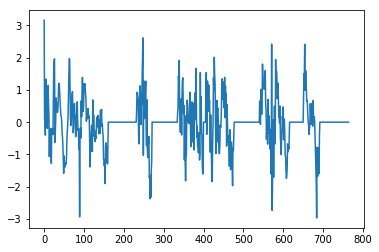

In [73]:
test_1 = main_df[main_df['bookingID'] == 111669149733]
test_1['diffSpeed'] = test_1['Speed'].diff(1).fillna(test_1['Speed'])
#print(test_1.head(10))
plt.plot(test_1['second'],test_1['diffSpeed'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


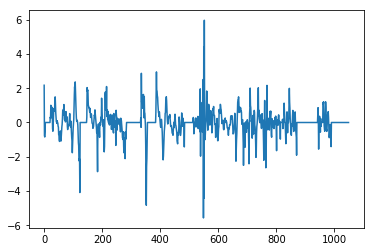

In [74]:
test_2 = main_df[main_df['bookingID'] == 335007449205]
test_2['diffSpeed'] = test_2['Speed'].diff(1).fillna(test_2['Speed'])
#print(test_2.head(10))
plt.plot(test_2['second'],test_2['diffSpeed'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


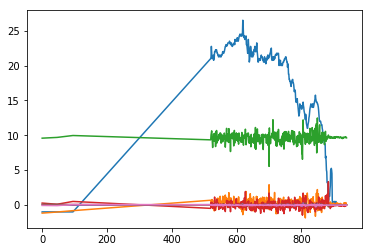

In [12]:
test_2 = main_df[main_df['bookingID'] == 171798691856]
test_2['diffSpeed'] = test_2['Speed'].diff(1).fillna(test_2['Speed'])
#print(test_2.head(10))
plt.plot(test_2['second'],test_2['Speed'])
plt.plot(test_2['second'],test_2['acceleration_x'])
plt.plot(test_2['second'],test_2['acceleration_y'])
plt.plot(test_2['second'],test_2['acceleration_z'])
plt.plot(test_2['second'],test_2['gyro_x'])
plt.plot(test_2['second'],test_2['gyro_y'])
plt.plot(test_2['second'],test_2['gyro_z'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


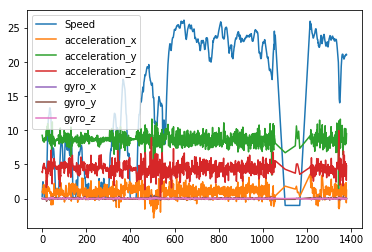

In [14]:
test_2 = main_df[main_df['bookingID'] == 13]
test_2['diffSpeed'] = test_2['Speed'].diff(1).fillna(test_2['Speed'])
#print(test_2.head(10))
plt.plot(test_2['second'],test_2['Speed'], label='Speed')
plt.plot(test_2['second'],test_2['acceleration_x'], label='acceleration_x')
plt.plot(test_2['second'],test_2['acceleration_y'], label='acceleration_y')
plt.plot(test_2['second'],test_2['acceleration_z'], label='acceleration_z')
plt.plot(test_2['second'],test_2['gyro_x'], label='gyro_x')
plt.plot(test_2['second'],test_2['gyro_y'], label='gyro_y')
plt.plot(test_2['second'],test_2['gyro_z'], label='gyro_z')
plt.gca().legend(('Speed','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


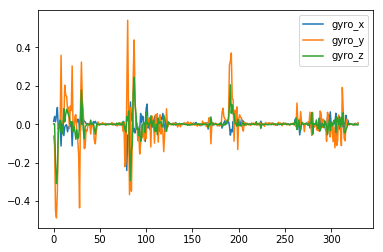

In [19]:
test_2 = main_df[main_df['bookingID'] == 395136991308]
test_2['diffSpeed'] = test_2['Speed'].diff(1).fillna(test_2['Speed'])
#print(test_2.head(10))

plt.plot(test_2['second'],test_2['gyro_x'], label='gyro_x')
plt.plot(test_2['second'],test_2['gyro_y'], label='gyro_y')
plt.plot(test_2['second'],test_2['gyro_z'], label='gyro_z')
plt.gca().legend(('gyro_x','gyro_y','gyro_z'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


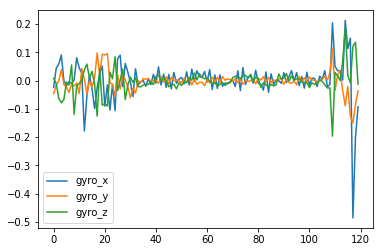

In [23]:
test_2 = main_df[main_df['bookingID'] == 1537598292022]
test_2['diffSpeed'] = test_2['Speed'].diff(1).fillna(test_2['Speed'])
#print(test_2.head(10))

plt.plot(test_2['second'],test_2['gyro_x'], label='gyro_x')
plt.plot(test_2['second'],test_2['gyro_y'], label='gyro_y')
plt.plot(test_2['second'],test_2['gyro_z'], label='gyro_z')
plt.gca().legend(('gyro_x','gyro_y','gyro_z'))

In [24]:
ans = labels_0[labels_0['bookingID'] == 1537598292022]
ans
#test_1 = main_df[main_df['bookingID'] == 13]
#test_1['diffSpeed'] = test_1['Speed'].diff(1).fillna(test_1['Speed'])
#test_1

bookingID  label
bookingID                          
1537598292022  1537598292022      0

In [144]:
test1 = labels_0[labels_0.duplicated(['bookingID'])]
test1 = test1.sort_values(by=['label', 'bookingID'])
test1.size
test1

bookingID  label
5295    154618822837      0
19936   395136991308      0
10778   455266533495      0
18027   481036337234      0
18951   919123001348      0
6210   1279900254294      0
16990  1348619731077      0
6516   1511828488211      0
14432  1632087572573      0
19453  1649267441751      0
12602             13      1
11215   223338299461      1
17623   403726925929      1
17843   515396075694      1
17001   695784702084      1
13634   970662608932      1
14942  1391569403991      1
16340  1408749273124      1

In [147]:
labels_0.groupby('bookingID', group_keys=False).apply(lambda x: x.loc[x.label.idxmax()])

bookingID  label
bookingID                          
0                          0      0
1                          1      1
2                          2      1
4                          4      1
6                          6      0
7                          7      0
8                          8      0
10                        10      0
11                        11      0
13                        13      1
14                        14      0
16                        16      0
17                        17      0
18                        18      1
21                        21      0
25                        25      0
26                        26      0
27                        27      0
28                        28      0
29                        29      0
30                        30      0
32                        32      0
33                        33      0
34                        34      0
35                        35      1
36                        36      0
37                        37      0
38                        38      0
39                        39      0
41                        41      1
...                      ...    ...
1700807049403  1700807049403      0
1700807049404  1700807049404      0
1700807049406  1700807049406      0
1700807049407  1700807049407      0
1709396983812  1709396983812      1
1709396983813  1709396983813      1
1709396983837  1709396983837      1
1709396983839  1709396983839      1
1709396983864  1709396983864      1
1709396983889  1709396983889      1
1709396983894  1709396983894      1
1709396983896  1709396983896      1
1709396983900  1709396983900      1
1709396983901  1709396983901      1
1709396983904  1709396983904      1
1709396983905  1709396983905      1
1709396983906  1709396983906      1
1709396983907  1709396983907      1
1709396983911  1709396983911      1
1709396983917  1709396983917      1
1709396983925  1709396983925      1
1709396983933  1709396983933      1
1709396983941  1709396983941      1
1709396983947  1709396983947      1
1709396983948  1709396983948      1
1709396983957  1709396983957      1
1709396983960  1709396983960      1
1709396983966  1709396983966      1
1709396983971  1709396983971      1
1709396983975  1709396983975      1

[20000 rows x 2 columns]

In [178]:
test_2 = main_df[main_df['bookingID'] == 13]
test_2.loc[:,"acceleration_z"].std()

0.8422238122700565

In [180]:
test_2 = main_df[main_df['bookingID'] == 0]
test_2.loc[:,"acceleration_z"].std()

1.1412657922562408

In [182]:
test_2 = main_df[main_df['bookingID'] == 17]
test_2.loc[:,"acceleration_z"].std()
test_2

bookingID  Accuracy  Bearing  acceleration_x  acceleration_y  \
1071078         17     5.000      4.0        2.622848       10.002974   
898606          17     5.000      6.0        1.547851        8.842984   
127355          17     4.000      5.0        4.569334        7.198167   
265237          17     4.000      5.0        2.519897        9.257181   
528511          17     4.000      5.0        3.143587        9.640253   
562714          17     3.900      4.0        2.475604       10.007763   
830404          17     4.000      5.0        3.913323        9.946711   
1267144         17     4.000      5.0        3.439271        8.999804   
196791          17     4.000      5.0        2.748544        8.444349   
1037444         17     4.000      6.0        2.809596        9.718064   
1005386         17     3.900      4.0        3.576937        8.201338   
54124           17     4.000      4.0        4.546589       10.228029   
1338029         17     4.000      4.0        1.917756        9.367314   
955181          17     3.900      5.0        3.951630       10.655395   
1422956         17     4.000      6.0        3.869030       12.797009   
1161622         17     5.000      4.0        3.652355        8.889671   
927753          17     5.000      0.0        2.895787        8.803479   
716575          17     4.536    356.0        1.669956        9.241618   
972713          17     3.717    355.0        1.243788        9.440337   
129291          17     3.620    344.0       -0.988805        9.539697   
684141          17     5.000    330.0        0.175974       10.503363   
190663          17     5.000    296.0        1.043872       10.324995   
6931            17     5.000    277.0        3.453636       10.939108   
646432          17     6.000    274.0        1.499967        9.275137   
1496153         17     5.000    274.0        3.925294        8.804677   
282916          17     5.000    275.0        2.547430       10.720038   
1366354         17     4.000    275.0        3.867833        9.296685   
267274          17     4.000    274.0        2.170344        9.451111   
416326          17     4.000    276.0        5.829881        9.607931   
750799          17     4.000    275.0        2.448071        7.376535   
...            ...       ...      ...             ...             ...   
80412           17     3.900     91.0        2.665944        7.053318   
813009          17     3.900     91.0        3.902549       10.518925   
219789          17     3.900     90.0        1.616086       10.271125   
210255          17     3.900     89.0        3.586514        9.916783   
1223604         17     3.900     88.0        1.912967        9.276335   
781934          17     3.900     88.0        3.521871        9.030929   
869069          17     4.000     88.0        2.491167        8.781932   
1154092         17     4.000     88.0        4.480749        7.966706   
404478          17     4.000     88.0        2.035071        8.306683   
575964          17     3.900     89.0        5.086482        9.202114   
162063          17     3.900     89.0        3.050213       10.232818   
1428523         17     3.900     89.0        2.159570        9.625888   
831356          17     3.900     89.0        3.824737        9.026140   
468447          17     3.900     89.0        1.368286        8.318654   
333546          17     3.900     90.0        3.342306        9.704897   
382327          17     3.900     90.0        3.333926        9.412804   
695556          17     3.900     90.0        2.571372        9.950302   
1229324         17     3.900     89.0        3.214216        9.403227   
678730          17     3.900     89.0        3.448847        8.681375   
1099788         17     3.900     89.0        5.020641        8.598776   
290533          17     3.900     90.0        2.102109        9.394848   
1603053         17     4.000     90.0        2.400187        6.345831   
551685          17     4.000     90.0        4.487931       10.0891

In [159]:
test_2.head(100)

bookingID  Accuracy  Bearing  acceleration_x  acceleration_y  \
778133          13     3.551     32.0        0.967287        9.280210   
1562631         13     4.010     31.0        0.998413        9.107821   
1016587         13     4.842     35.0        1.187560        8.839663   
1151576         13     5.846     35.0        1.364737        8.717555   
305112          13     5.836     37.0        1.431776        8.444607   
1172014         13     6.787     40.0        0.775745        8.569110   
959034          13     7.598     40.0        2.011191        8.810931   
734568          13     6.548     45.0        0.672791        8.391933   
30299           13     7.205     45.0        1.788523        8.322499   
918616          13     6.308     47.0        1.343188        8.265037   
1029472         13     6.889     47.0        1.987248        8.849239   
682366          13     7.015     47.0        1.652050        8.688824   
762721          13     7.110     47.0        1.580221        8.741497   
201591          13     7.181     47.0        1.446142        8.729526   
566596          13     7.235     47.0        1.161223        8.664881   
1228596         13     7.274     47.0        1.735849        9.024022   
475816          13     7.303     47.0        1.063058        8.494887   
108231          13     5.445     51.0        0.256187        8.765440   
1024132         13     5.295     52.0        0.452518        8.968953   
18918           13     5.266     54.0        2.130905        9.986520   
1414875         13     5.989     60.0        4.034353        9.119793   
495799          13     7.155     80.0        0.593780       10.158908   
452704          13     6.000     98.0       -0.112531       10.609032   
1447506         13     6.000    108.0        1.146858        9.332883   
542478          13    12.000    109.0        1.331217        9.457385   
1012481         13    12.000    110.0        1.585010       10.989721   
1049772         13    12.000    110.0        1.671204        9.814133   
551900          13    12.000    110.0        1.771763        9.340066   
1536765         13     4.000    109.0        1.075029        9.296969   
234335          13     4.000    109.0        1.462902        9.589070   
...            ...       ...      ...             ...             ...   
295798          13     6.994     32.0        0.624906        8.734315   
550532          13     7.094     32.0        0.857150        8.676852   
470282          13     7.170     32.0        1.218686        8.633755   
565267          13     6.268     32.0        0.919401        8.679246   
797611          13     6.852     32.0        0.524346        9.332883   
620760          13     6.165     31.0        0.277736        8.839663   
1066403         13     5.970     31.0        0.770956        8.284191   
93024           13     6.066     33.0        1.412622        8.001666   
811722          13     7.235     32.0        1.154041        8.877971   
1428363         13    12.000     32.0        0.411815        9.428655   
1243044         13    12.000     32.0        0.411815        8.710372   
1473498         13     6.000     33.0        0.986441        8.497281   
1526306         13     8.000     32.0        0.792505       10.348056   
544868          13     6.000     32.0        0.754197        8.274613   
1447715         13     6.000     32.0        0.541106        8.813326   
679153          13    12.000     32.0        0.600963        8.212362   
566229          13     8.000     32.0        2.303292        9.182044   
171630          13    12.000     32.0        1.007990        8.755863   
453070          13     6.000     33.0        1.431776        8.832479   
270358          13     6.000     33.0        1.113338        9.019233   
724048          13    48.000     33.0        0.718282        8.868394   
248924          13    48.000     32.0        0.495615        8.169266   
71703           13    48.000     30.0        1.017567        8.0687